In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, re
from scipy.optimize import curve_fit

In [2]:
def LINEAR_FIT(X,a,b):
    return a*X+b

### Circular orbit, $N=3$

In [3]:
path = "./Data_Saving/Circular_Orbit/N=3_end_t=5period/"
temp = os.listdir(path)
files_KDK = []
files_DKD = []
files_RK4 = []
index_KDK = []
index_DKD = []
index_RK4 = []

for file in temp:
    if 'dt' in file:
        if 'KDK' in file and 'dt' in file:
            files_KDK.append(file)
            index_KDK.append(eval(re.sub('[^0-9,^\.]','',re.sub('.txt','',file.split('_')[-1]))))
        elif 'DKD' in file and 'dt' in file:
            files_DKD.append(file)
            index_DKD.append(eval(re.sub('[^0-9,^\.]','',re.sub('.txt','',file.split('_')[-1]))))
        elif 'RK4' in file and 'dt' in file:
            files_RK4.append(file)
            index_RK4.append(eval(re.sub('[^0-9,^\.]','',re.sub('.txt','',file.split('_')[-1]))))
file_dict_KDK = dict(zip(index_KDK,files_KDK))
file_dict_DKD = dict(zip(index_DKD,files_DKD))
file_dict_RK4 = dict(zip(index_RK4,files_RK4))
dt_range = 0.08*2**np.linspace(0,-6,7)

KDK Scheme:
	dt = 0.08000, error min:-3.39449812e-06; error max:-1.13185584e-12
	dt = 0.04000, error min:-2.13037501e-07; error max:-2.43575274e-14
	dt = 0.02000, error min:-1.33287018e-08; error max:-2.82034527e-15
	dt = 0.01000, error min:-8.33265883e-10; error max:-1.53837015e-15
	dt = 0.00500, error min:-5.20812650e-11; error max:1.70502692e-14
	dt = 0.00250, error min:-3.27095953e-12; error max:5.12790050e-16
	dt = 0.00125, error min:-2.22807277e-13; error max:2.56395025e-16
DKD Scheme:
	dt = 0.08000, error min:-8.49011516e-07; error max:-2.95367069e-13
	dt = 0.04000, error min:-5.32655005e-08; error max:-2.30755522e-15
	dt = 0.02000, error min:-3.33227768e-09; error max:-3.97412289e-15
	dt = 0.01000, error min:-2.08317496e-10; error max:7.69185075e-16
	dt = 0.00500, error min:-1.30326873e-11; error max:2.82034527e-15
	dt = 0.00250, error min:-8.40334694e-13; error max:3.84592537e-16
	dt = 0.00125, error min:-4.96124373e-14; error max:1.17941711e-14
RK4 Scheme:
	dt = 0.08000, erro

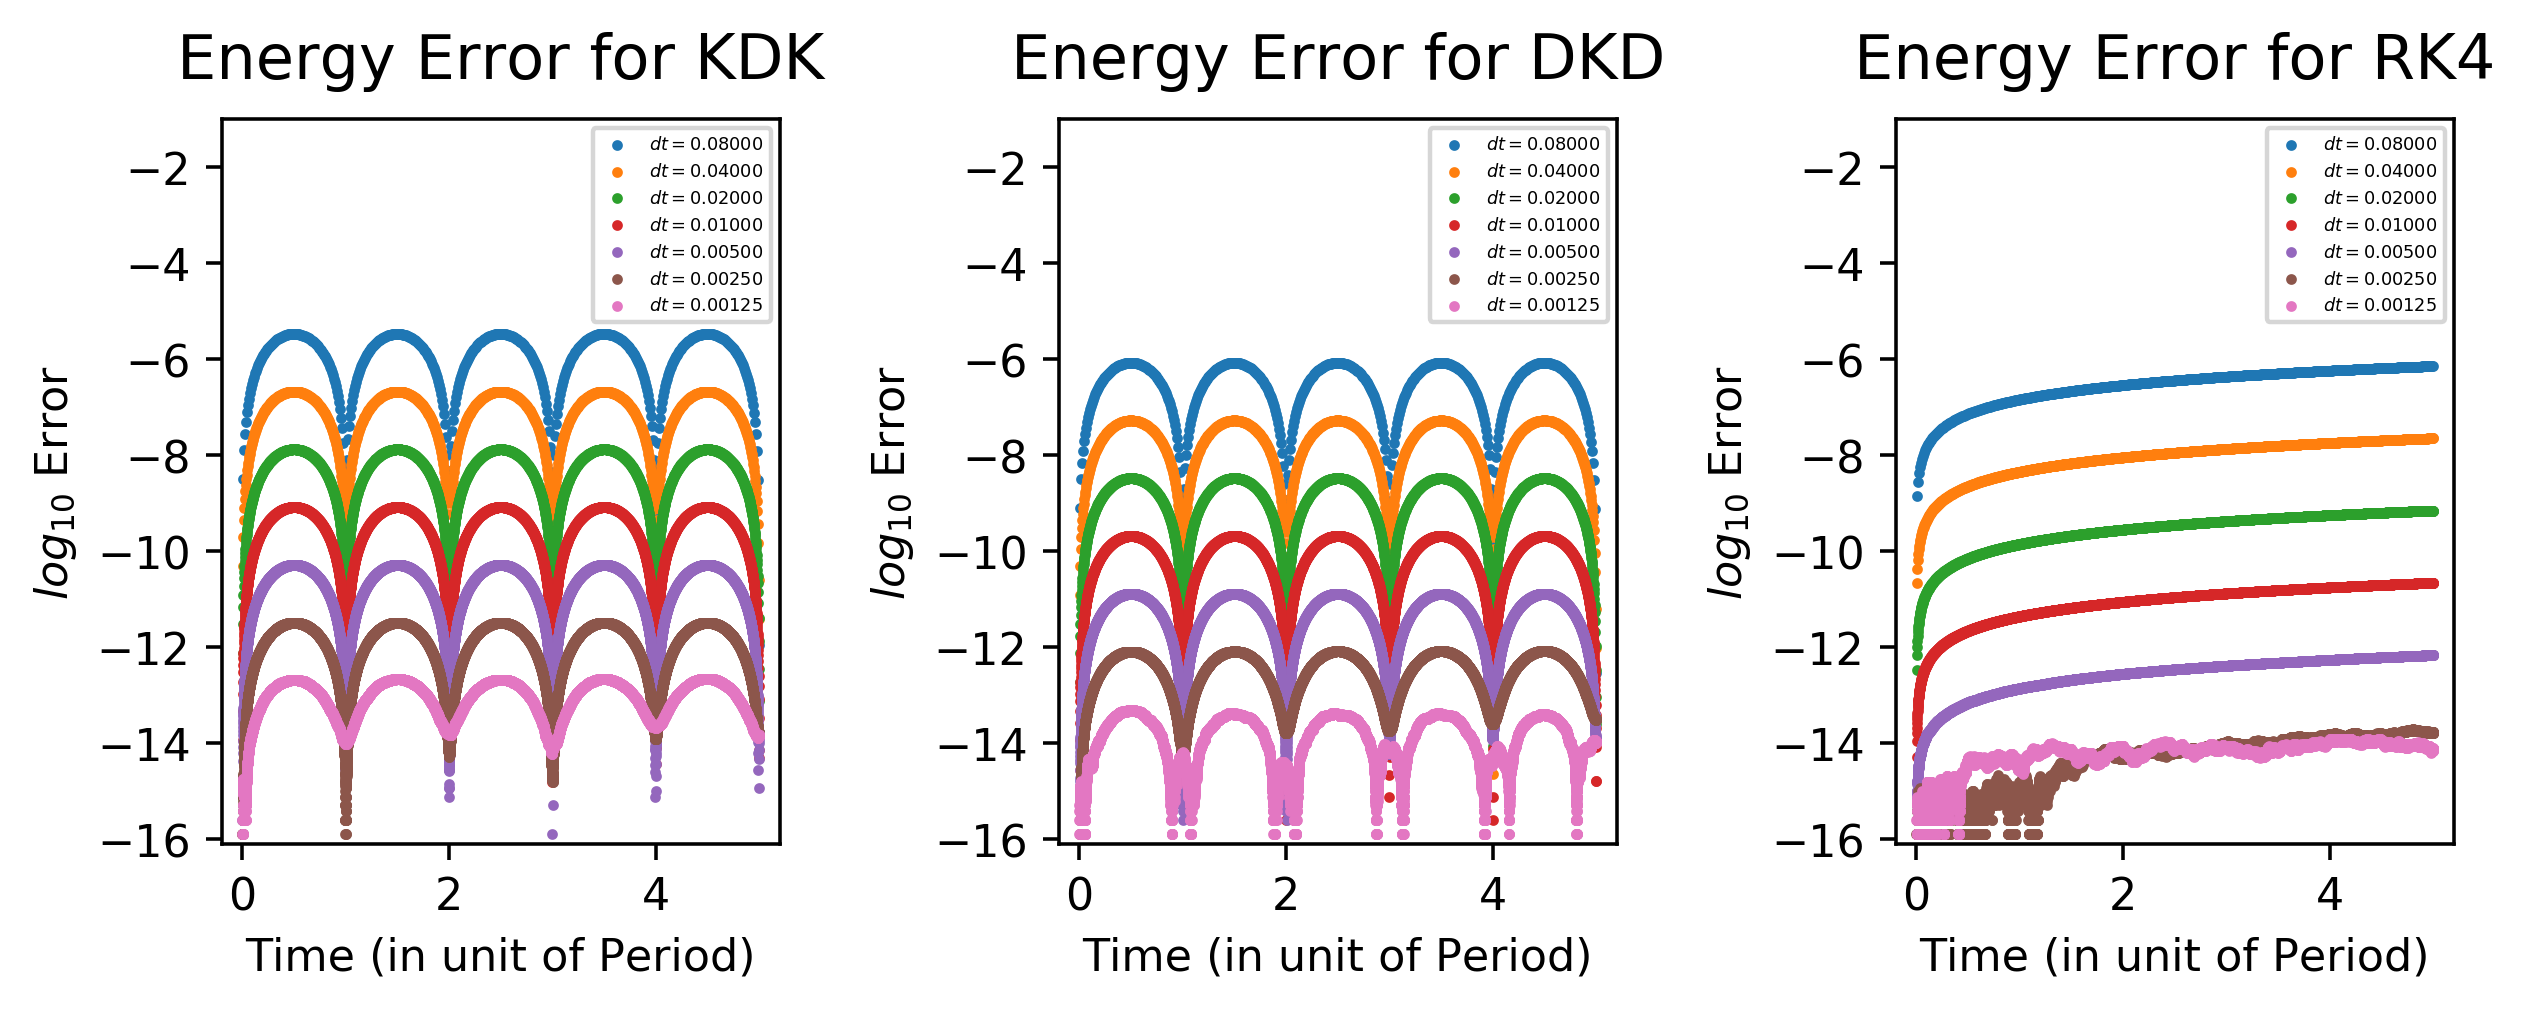

In [4]:
plt.figure(figsize=(3*3,3),dpi=320)
plt.subplots_adjust(wspace=0.5)
ax_1 = plt.subplot(131)
print("KDK Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_KDK[dt])
    t = data[:,0]
    error = data[:,1]
    criteria = abs(error)>=1e-16
    ax_1.scatter(t[criteria],np.log10(abs(error[criteria])), s = 2.0, label='$dt = %.5f$'%dt)
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
ax_1.set_xlim([-0.2,5.2])
ax_1.set_ylim([-16.1,-1.])
ax_1.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_1.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_1.set_title("Energy Error for KDK", fontsize=14., y=1.02)
ax_1.legend(loc='upper right', prop={'size':4.0})

ax_2 = plt.subplot(132)
print("DKD Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_DKD[dt])
    t = data[:,0]
    error = data[:,1]
    criteria = abs(error)>=1e-16
    ax_2.scatter(t[criteria],np.log10(abs(error[criteria])), s = 2.0, label='$dt = %.5f$'%dt)
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
ax_2.set_xlim([-0.2,5.2])
ax_2.set_ylim([-16.1,-1.])
ax_2.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_2.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_2.set_title("Energy Error for DKD", fontsize=14., y=1.02)
ax_2.legend(loc='upper right', prop={'size':4.0})

ax_3 = plt.subplot(133)
print("RK4 Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_RK4[dt])
    t = data[:,0]
    error = data[:,1]
    criteria = abs(error)>=1e-16
    ax_3.scatter(t[criteria],np.log10(abs(error[criteria])), s = 2.0, label='$dt = %.5f$'%dt)
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
ax_3.set_xlim([-0.2,5.2])
ax_3.set_ylim([-16.1,-1.])
ax_3.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_3.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_3.set_title("Energy Error for RK4", fontsize=14., y=1.02)
ax_3.legend(loc='upper right', prop={'size':4.0})
plt.savefig("/home/lab/Guan_Ming/Computational_Astrophysics/Homework/HW5/t-Energy-Error_N=3_Circular_Orbit.png", bbox_inches='tight', dpi=320, pad_inches=0.05)
plt.show()

KDK Scheme:
	dt = 0.08000, error min:3.74324007e-05; error max:3.89804371e-02
	dt = 0.04000, error min:4.67929322e-06; error max:9.75575852e-03
	dt = 0.02000, error min:5.84919251e-07; error max:2.43958303e-03
	dt = 0.01000, error min:7.31151438e-08; error max:6.09935879e-04
	dt = 0.00500, error min:9.13940045e-09; error max:1.52487566e-04
	dt = 0.00250, error min:1.14242530e-09; error max:3.81586501e-05
	dt = 0.00125, error min:1.42802986e-10; error max:1.01899151e-05
DKD Scheme:
	dt = 0.08000, error min:1.87523944e-05; error max:3.86020924e-02
	dt = 0.04000, error min:2.34078039e-06; error max:9.66855154e-03
	dt = 0.02000, error min:2.92495077e-07; error max:2.41824238e-03
	dt = 0.01000, error min:3.65586799e-08; error max:6.04594552e-04
	dt = 0.00500, error min:4.56973478e-09; error max:1.51153677e-04
	dt = 0.00250, error min:5.71213709e-10; error max:3.78077906e-05
	dt = 0.00125, error min:7.14017764e-11; error max:1.16225055e-05
RK4 Scheme:
	dt = 0.08000, error min:6.95892410e-09;

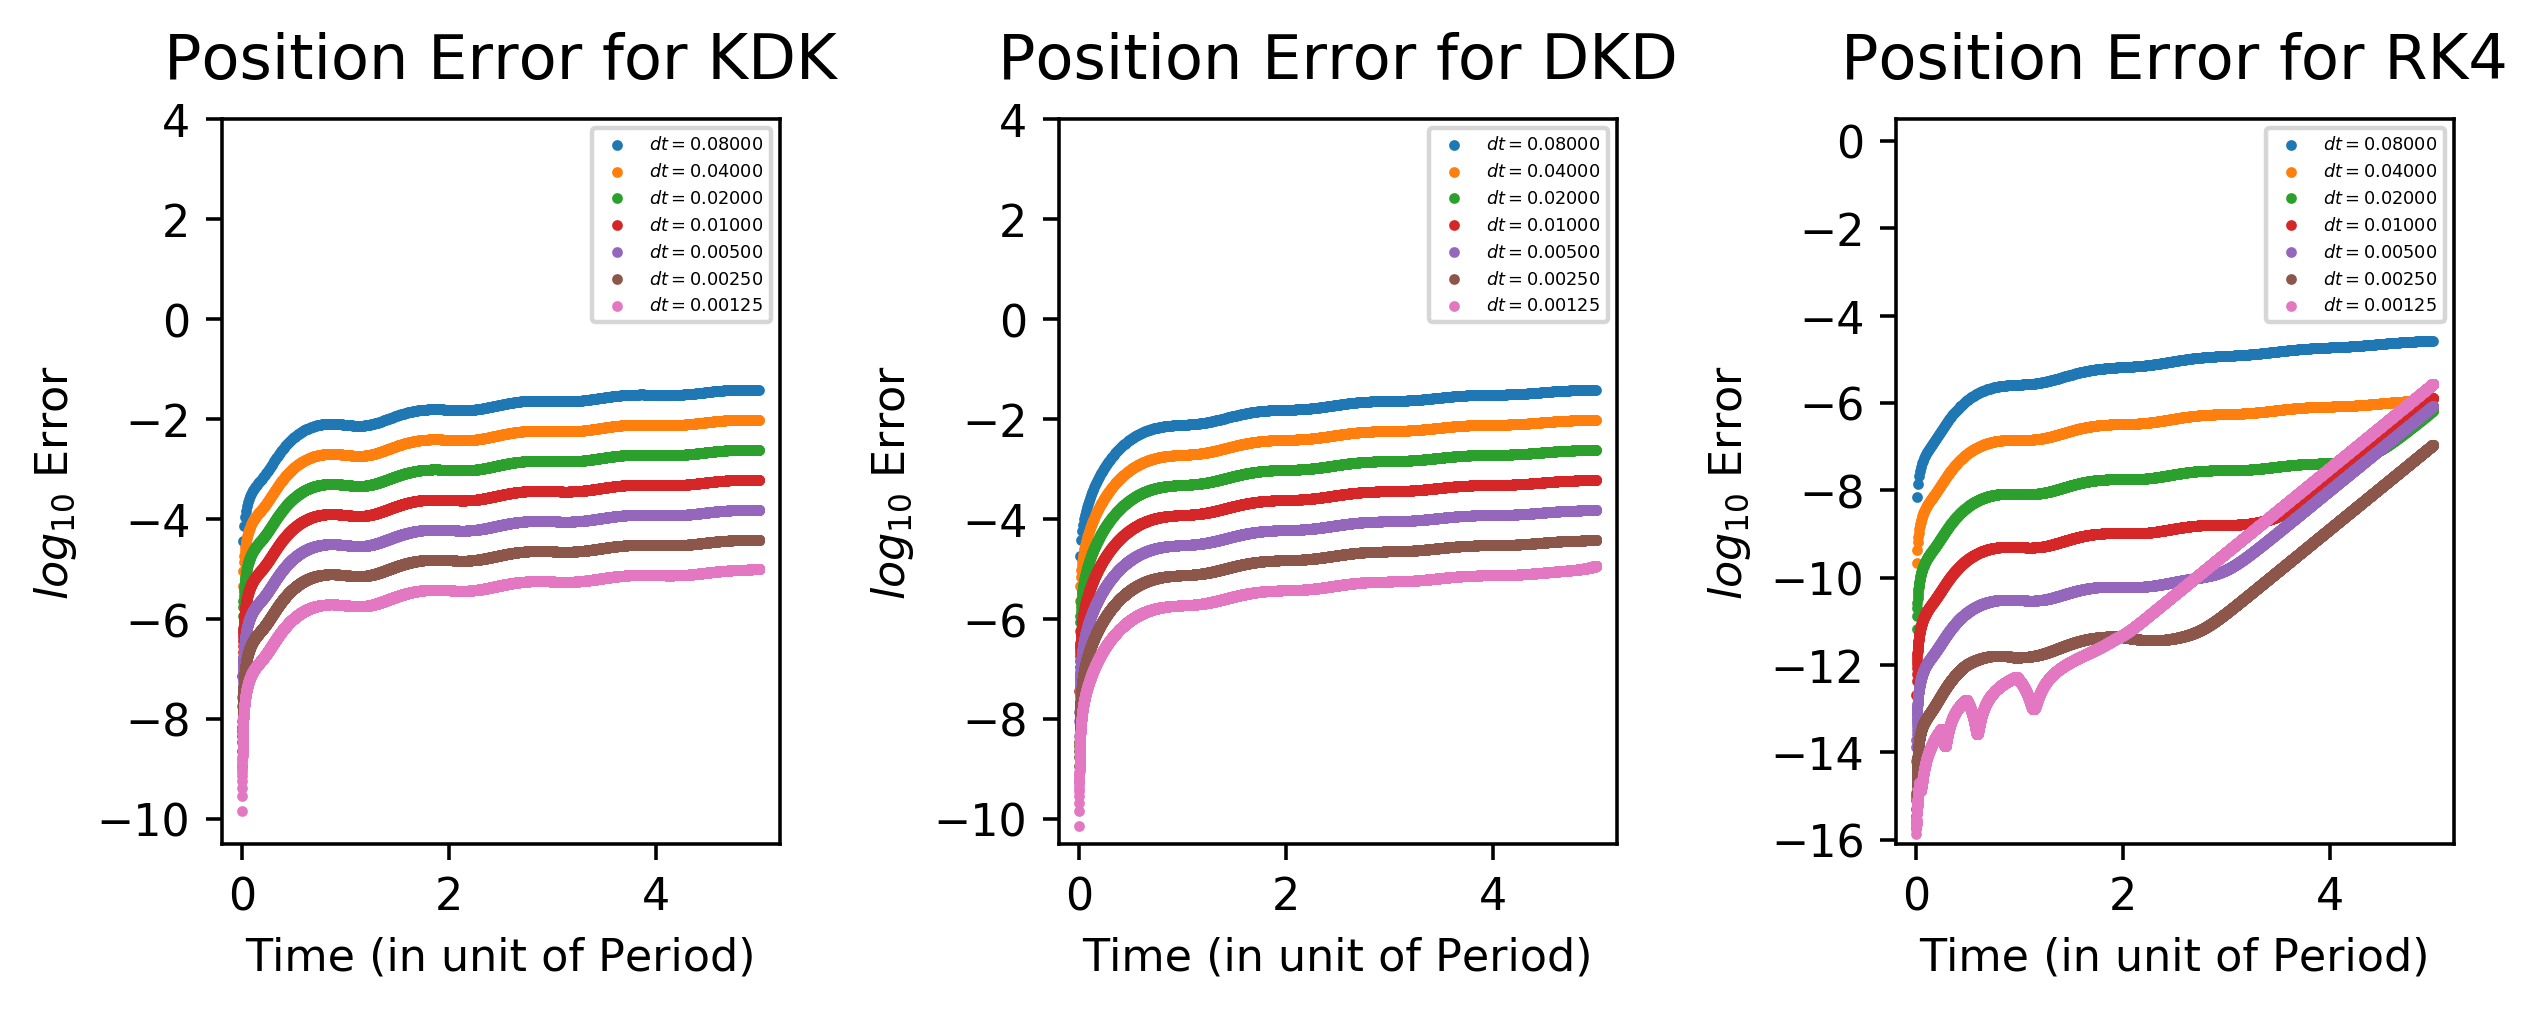

In [5]:
plt.figure(figsize=(3*3,3),dpi=320)
plt.subplots_adjust(wspace=0.5)
ax_1 = plt.subplot(131)
print("KDK Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_KDK[dt])
    t = data[:,0]
    error = data[:,2]
    criteria = abs(error)>=1e-16
    ax_1.scatter(t[criteria],np.log10(abs(error[criteria])), s = 2.0, label='$dt = %.5f$'%dt)
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
ax_1.set_xlim([-0.2,5.2])
ax_1.set_ylim([-10.5,4.])
ax_1.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_1.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_1.set_title("Position Error for KDK", fontsize=14., y=1.02)
ax_1.legend(loc='upper right', prop={'size':4.0})

ax_2 = plt.subplot(132)
print("DKD Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_DKD[dt])
    t = data[:,0]
    error = data[:,2]
    criteria = abs(error)>=1e-16
    ax_2.scatter(t[criteria],np.log10(abs(error[criteria])), s = 2.0, label='$dt = %.5f$'%dt)
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
ax_2.set_xlim([-0.2,5.2])
ax_2.set_ylim([-10.5,4.])
ax_2.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_2.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_2.set_title("Position Error for DKD", fontsize=14., y=1.02)
ax_2.legend(loc='upper right', prop={'size':4.0})

ax_3 = plt.subplot(133)
print("RK4 Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_RK4[dt])
    t = data[:,0]
    error = data[:,2]
    criteria = abs(error)>=1e-16
    ax_3.scatter(t[criteria],np.log10(abs(error[criteria])), s = 2.0, label='$dt = %.5f$'%dt)
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
ax_3.set_xlim([-0.2,5.2])
ax_3.set_yticks(np.linspace(-16.,2.,10))
ax_3.set_ylim([-16.1,0.5])
ax_3.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_3.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_3.set_title("Position Error for RK4", fontsize=14., y=1.02)
ax_3.legend(loc='upper right', prop={'size':4.0})
plt.savefig("/home/lab/Guan_Ming/Computational_Astrophysics/Homework/HW5/t-Position-Error_N=3_Circular_Orbit.png", bbox_inches='tight', dpi=320, pad_inches=0.05)
plt.show()

KDK Scheme:
	dt = 0.08000, error min:1.88880232e-05; error max:3.86322615e-02
	dt = 0.04000, error min:2.34503127e-06; error max:9.67043724e-03
	dt = 0.02000, error min:2.92628016e-07; error max:2.41836022e-03
	dt = 0.01000, error min:3.65628350e-08; error max:6.04600200e-04
	dt = 0.00500, error min:4.56986464e-09; error max:1.51154785e-04
	dt = 0.00250, error min:5.71217694e-10; error max:3.78476741e-05
	dt = 0.00125, error min:7.14019228e-11; error max:9.82546369e-06
DKD Scheme:
	dt = 0.08000, error min:4.67458056e-05; error max:3.86026376e-02
	dt = 0.04000, error min:5.84771877e-06; error max:9.66952758e-03
	dt = 0.02000, error min:7.31105376e-07; error max:2.41853886e-03
	dt = 0.01000, error min:9.13925644e-08; error max:6.04616199e-04
	dt = 0.00500, error min:1.14242078e-08; error max:1.51158919e-04
	dt = 0.00250, error min:1.42803017e-09; error max:3.77984196e-05
	dt = 0.00125, error min:1.78504073e-10; error max:1.05907212e-05
RK4 Scheme:
	dt = 0.08000, error min:6.05494174e-09;

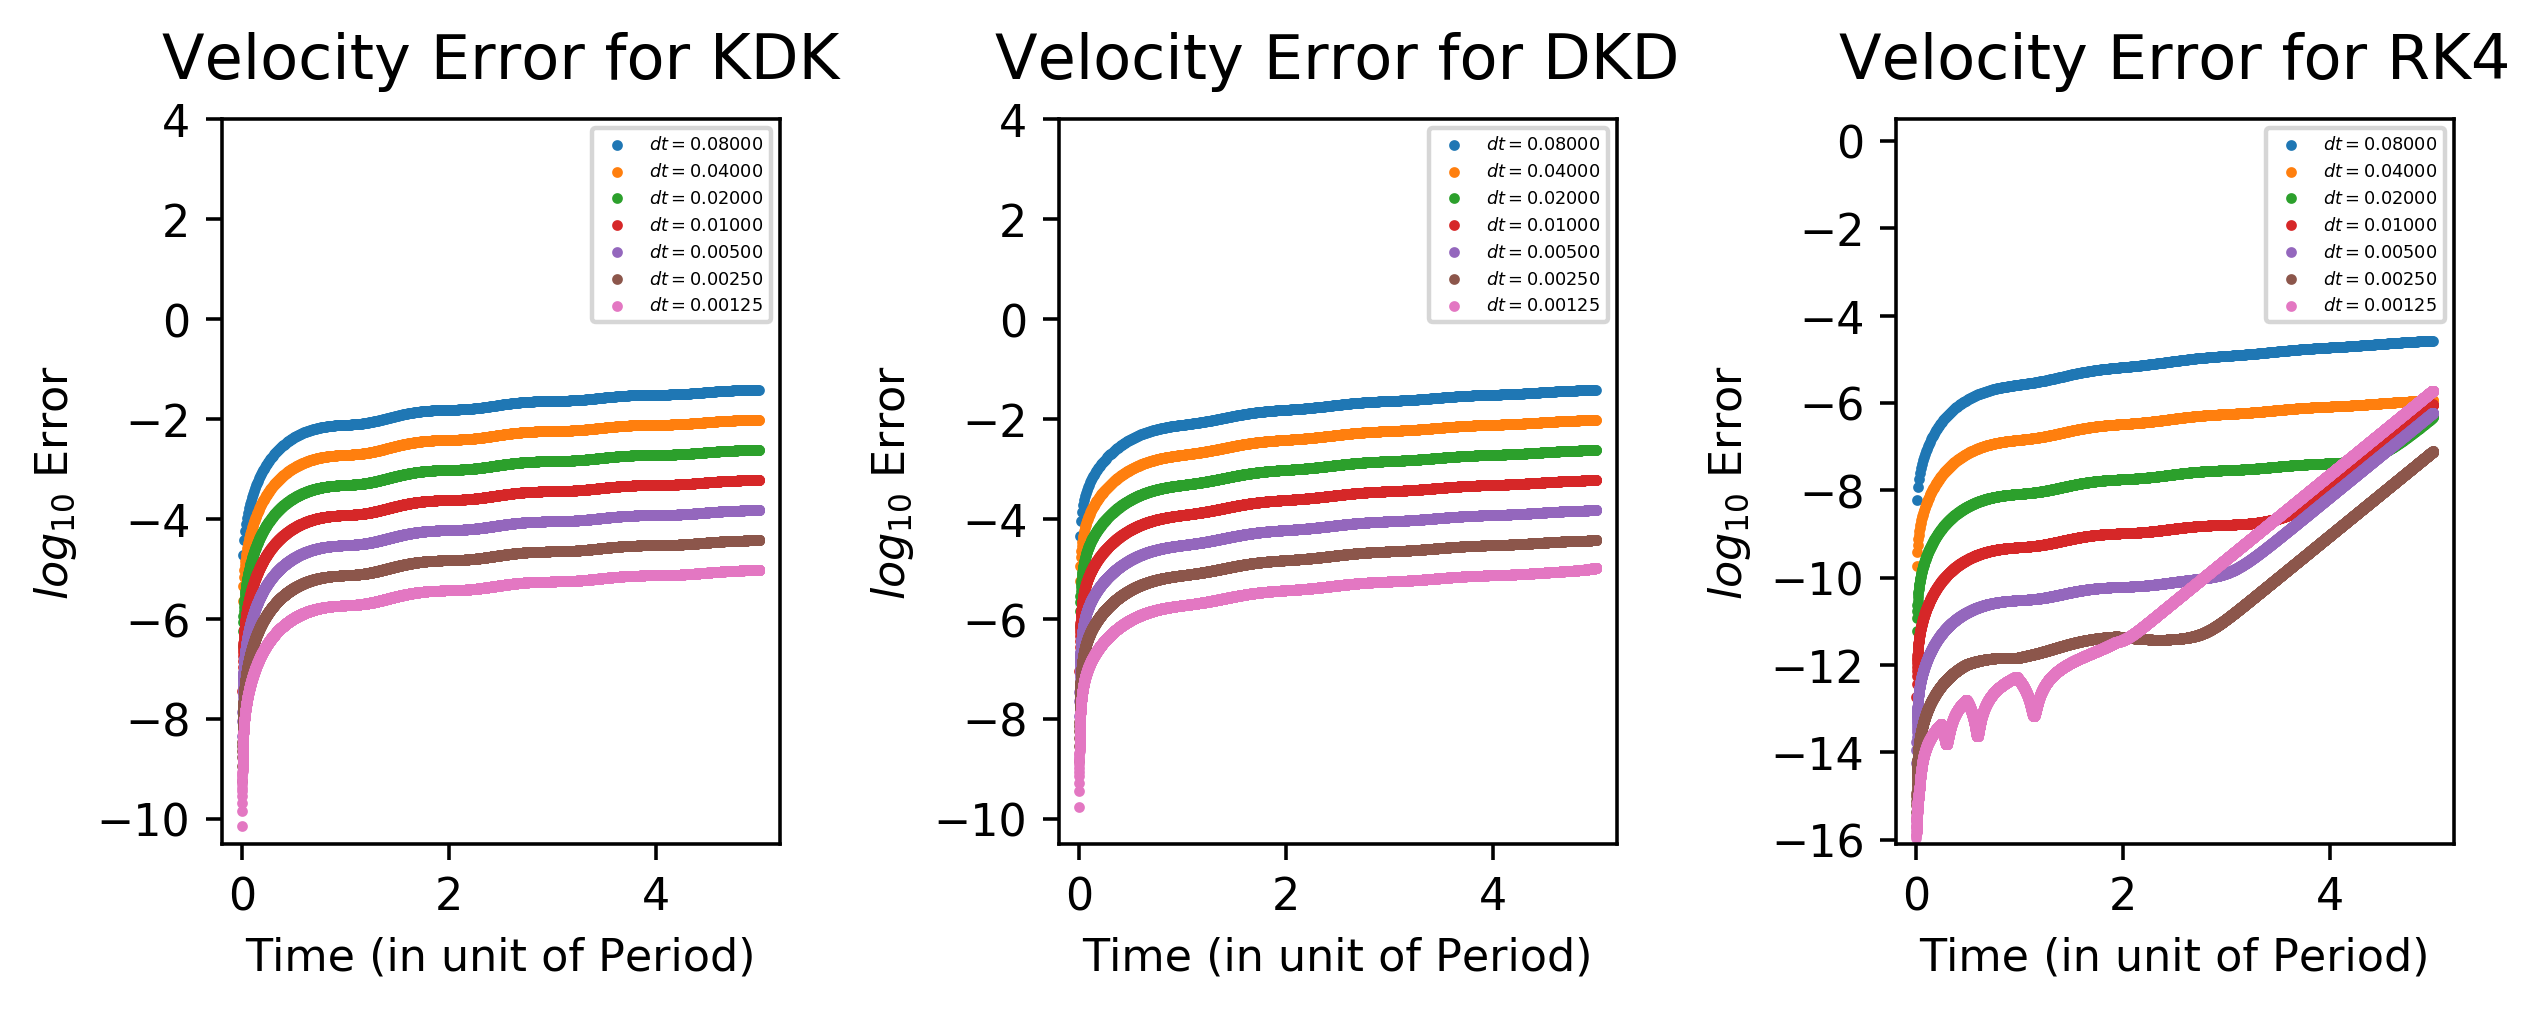

In [6]:
plt.figure(figsize=(3*3,3),dpi=320)
plt.subplots_adjust(wspace=0.5)
ax_1 = plt.subplot(131)
print("KDK Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_KDK[dt])
    t = data[:,0]
    error = data[:,3]
    criteria = abs(error)>=1e-16
    ax_1.scatter(t[criteria],np.log10(abs(error[criteria])), s = 2.0, label='$dt = %.5f$'%dt)
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
ax_1.set_xlim([-0.2,5.2])
ax_1.set_ylim([-10.5,4.])
ax_1.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_1.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_1.set_title("Velocity Error for KDK", fontsize=14., y=1.02)
ax_1.legend(loc='upper right', prop={'size':4.0})

ax_2 = plt.subplot(132)
print("DKD Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_DKD[dt])
    t = data[:,0]
    error = data[:,3]
    criteria = abs(error)>=1e-16
    ax_2.scatter(t[criteria],np.log10(abs(error[criteria])), s = 2.0, label='$dt = %.5f$'%dt)
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
ax_2.set_xlim([-0.2,5.2])
ax_2.set_ylim([-10.5,4.])
ax_2.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_2.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_2.set_title("Velocity Error for DKD", fontsize=14., y=1.02)
ax_2.legend(loc='upper right', prop={'size':4.0})

ax_3 = plt.subplot(133)
print("RK4 Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_RK4[dt])
    t = data[:,0]
    error = data[:,3]
    criteria = abs(error)>=1e-16
    ax_3.scatter(t[criteria],np.log10(abs(error[criteria])), s = 2.0, label='$dt = %.5f$'%dt)
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
ax_3.set_xlim([-0.2,5.2])
ax_3.set_yticks(np.linspace(-16.,2.,10))
ax_3.set_ylim([-16.1,0.5])
ax_3.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_3.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_3.set_title("Velocity Error for RK4", fontsize=14., y=1.02)
ax_3.legend(loc='upper right', prop={'size':4.0})
plt.savefig("/home/lab/Guan_Ming/Computational_Astrophysics/Homework/HW5/t-Velocity-Error_N=3_Circular_Orbit.png", bbox_inches='tight', dpi=320, pad_inches=0.05)
plt.show()

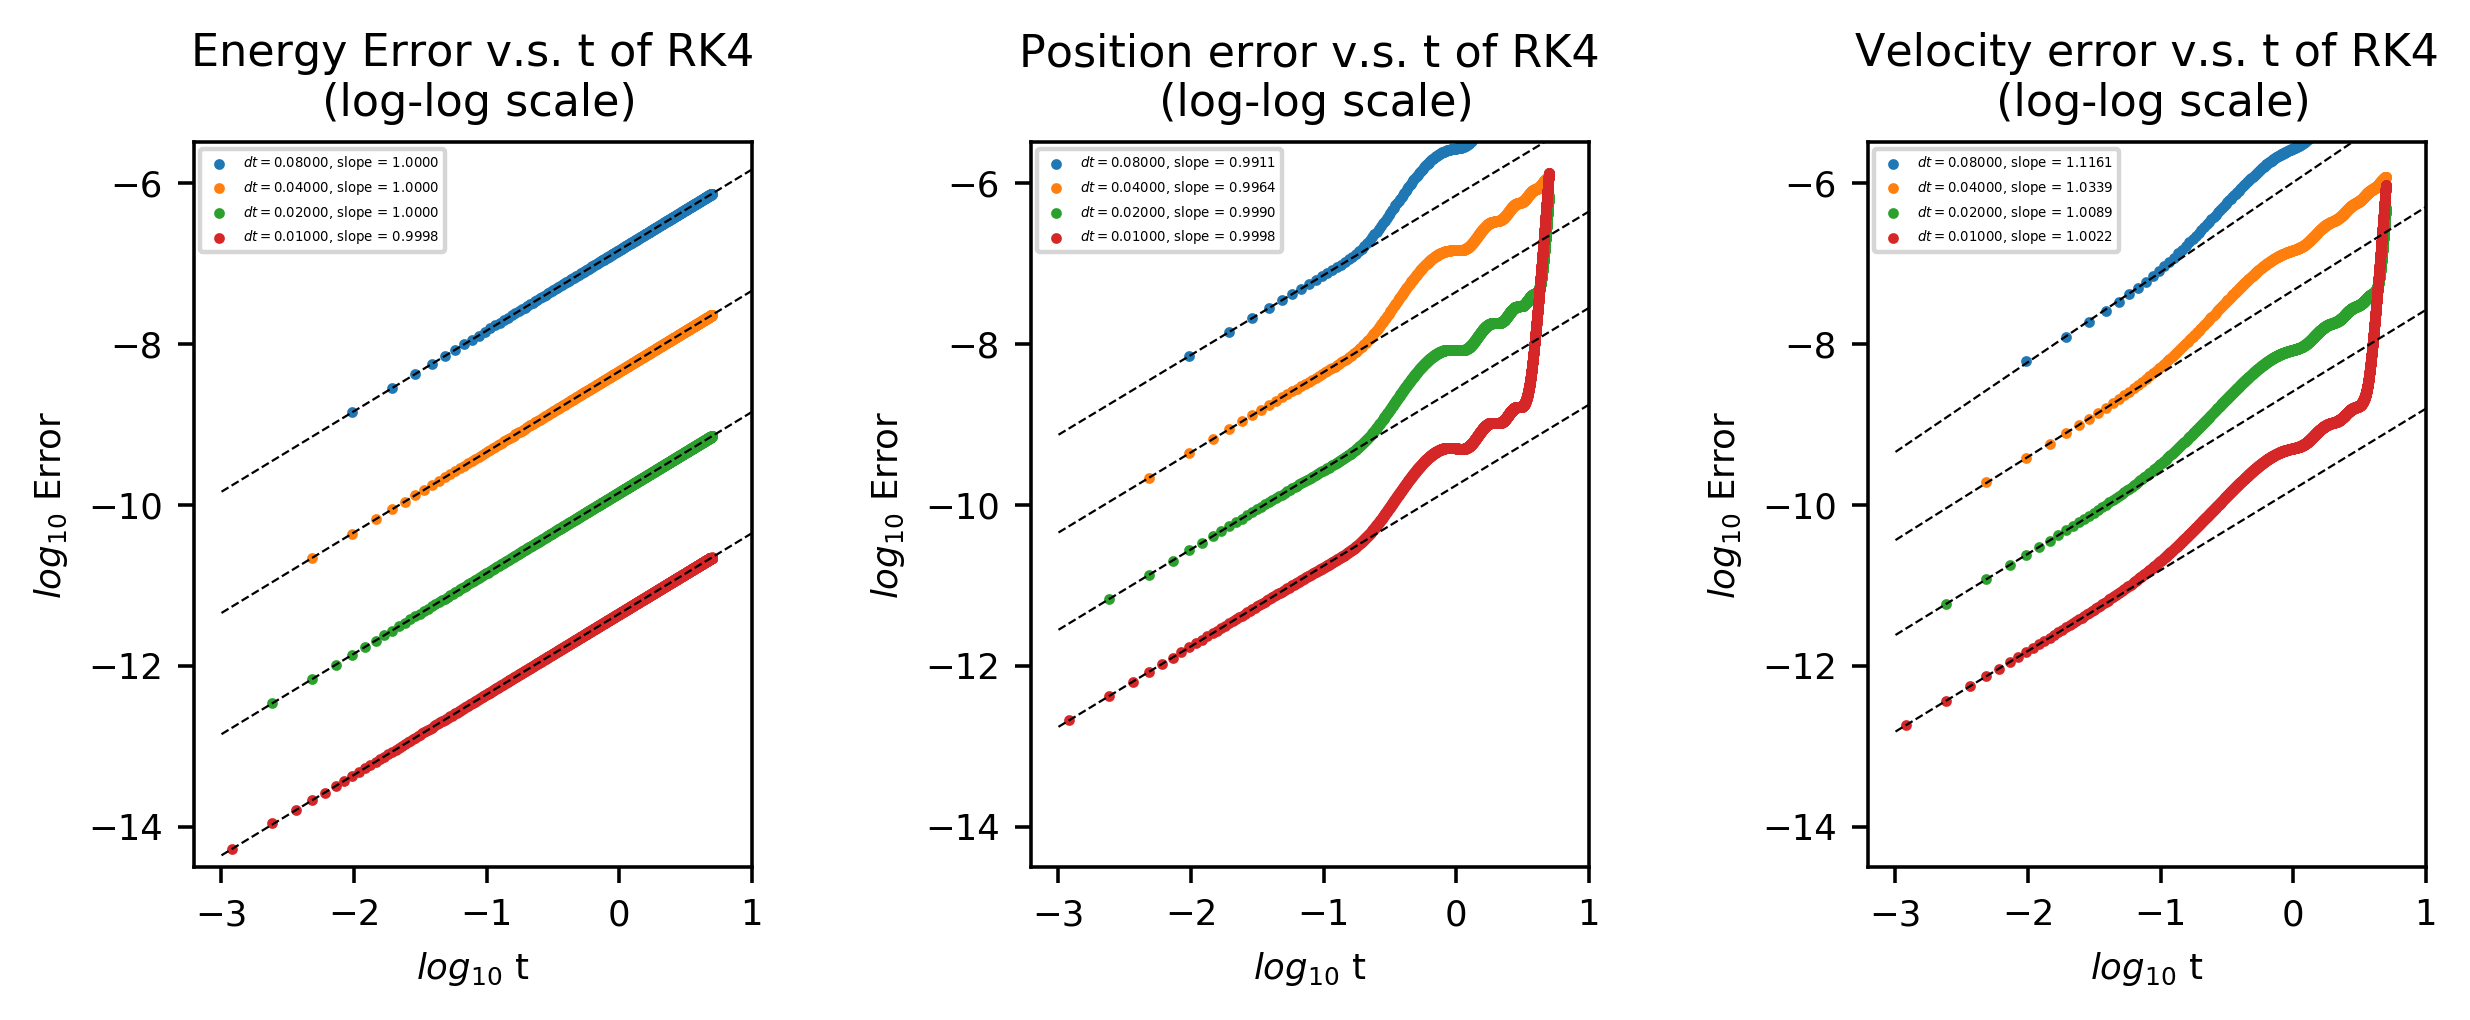

In [7]:
plt.figure(figsize=(3*3,3),dpi=320)
plt.subplots_adjust(wspace=0.5)
ax_1 = plt.subplot(131)
for dt in dt_range[:4]:
    data = np.loadtxt(path+file_dict_RK4[dt])
    t = np.log10(data[:,0])
    error = np.log10(data[:,1])
    popt, pcov = curve_fit(LINEAR_FIT, t, error)
    ax_1.scatter(t, error, label='$dt = %.5f$, slope = %.4f'%(dt, popt[0]), s=2.0)
    x = np.linspace(-3,1,200)
    ax_1.plot(x, popt[0]*x+popt[1], lw=0.5, c='k', ls='--')
ax_1.set_xlim([1.1*t.min(),1.1*t.max()])
ax_1.set_ylim([-14.5,-5.5])
plt.xticks(np.linspace(-3,1,5), fontsize=8.0)
plt.yticks(fontsize=8.0)
ax_1.set_title("Energy Error v.s. t of RK4\n (log-log scale)", fontsize=10.)
ax_1.set_xlabel('$log_{10}$ t', fontsize =8.)
ax_1.set_ylabel('$log_{10}$ Error', fontsize =8.)
ax_1.legend(loc='upper left', prop={'size':3.0})

ax_2 = plt.subplot(132)
for dt in dt_range[:4]:
    data = np.loadtxt(path+file_dict_RK4[dt])
    t = np.log10(data[:,0])
    error = np.log10(data[:,2])
    popt, pcov = curve_fit(LINEAR_FIT, t[:10], error[:10])
    ax_2.scatter(t, error, label='$dt = %.5f$, slope = %.4f'%(dt, popt[0]), s=2.0)
    x = np.linspace(-3,1,200)
    ax_2.plot(x, popt[0]*x+popt[1], lw=0.5, c='k', ls='--')
ax_2.set_xlim([1.1*t.min(),1.1*t.max()])
ax_2.set_ylim([-14.5,-5.5])
plt.xticks(np.linspace(-3,1,5), fontsize=8.0)
plt.yticks(fontsize=8.0)
ax_2.set_title("Position error v.s. t of RK4\n (log-log scale)", fontsize=10.)
ax_2.set_xlabel('$log_{10}$ t', fontsize =8.)
ax_2.set_ylabel('$log_{10}$ Error', fontsize =8.)
ax_2.legend(loc='upper left', prop={'size':3.0})

ax_3 = plt.subplot(133)
for dt in dt_range[:4]:
    data = np.loadtxt(path+file_dict_RK4[dt])
    t = np.log10(data[:,0])
    error = np.log10(data[:,3])
    popt, pcov = curve_fit(LINEAR_FIT, t[:10], error[:10])
    ax_3.scatter(t, error, label='$dt = %.5f$, slope = %.4f'%(dt, popt[0]), s=2.0)
    x = np.linspace(-3,1,200)
    ax_3.plot(x, popt[0]*x+popt[1], lw=0.5, c='k', ls='--')
ax_3.set_xlim([1.1*t.min(),1.1*t.max()])
ax_3.set_ylim([-14.5,-5.5])
plt.xticks(np.linspace(-3,1,5), fontsize=8.0)
plt.yticks(fontsize=8.0)
ax_3.set_title("Velocity error v.s. t of RK4\n (log-log scale)", fontsize=10.)
ax_3.set_xlabel('$log_{10}$ t', fontsize =8.)
ax_3.set_ylabel('$log_{10}$ Error', fontsize =8.)
ax_3.legend(loc='upper left', prop={'size':3.0})
plt.show()

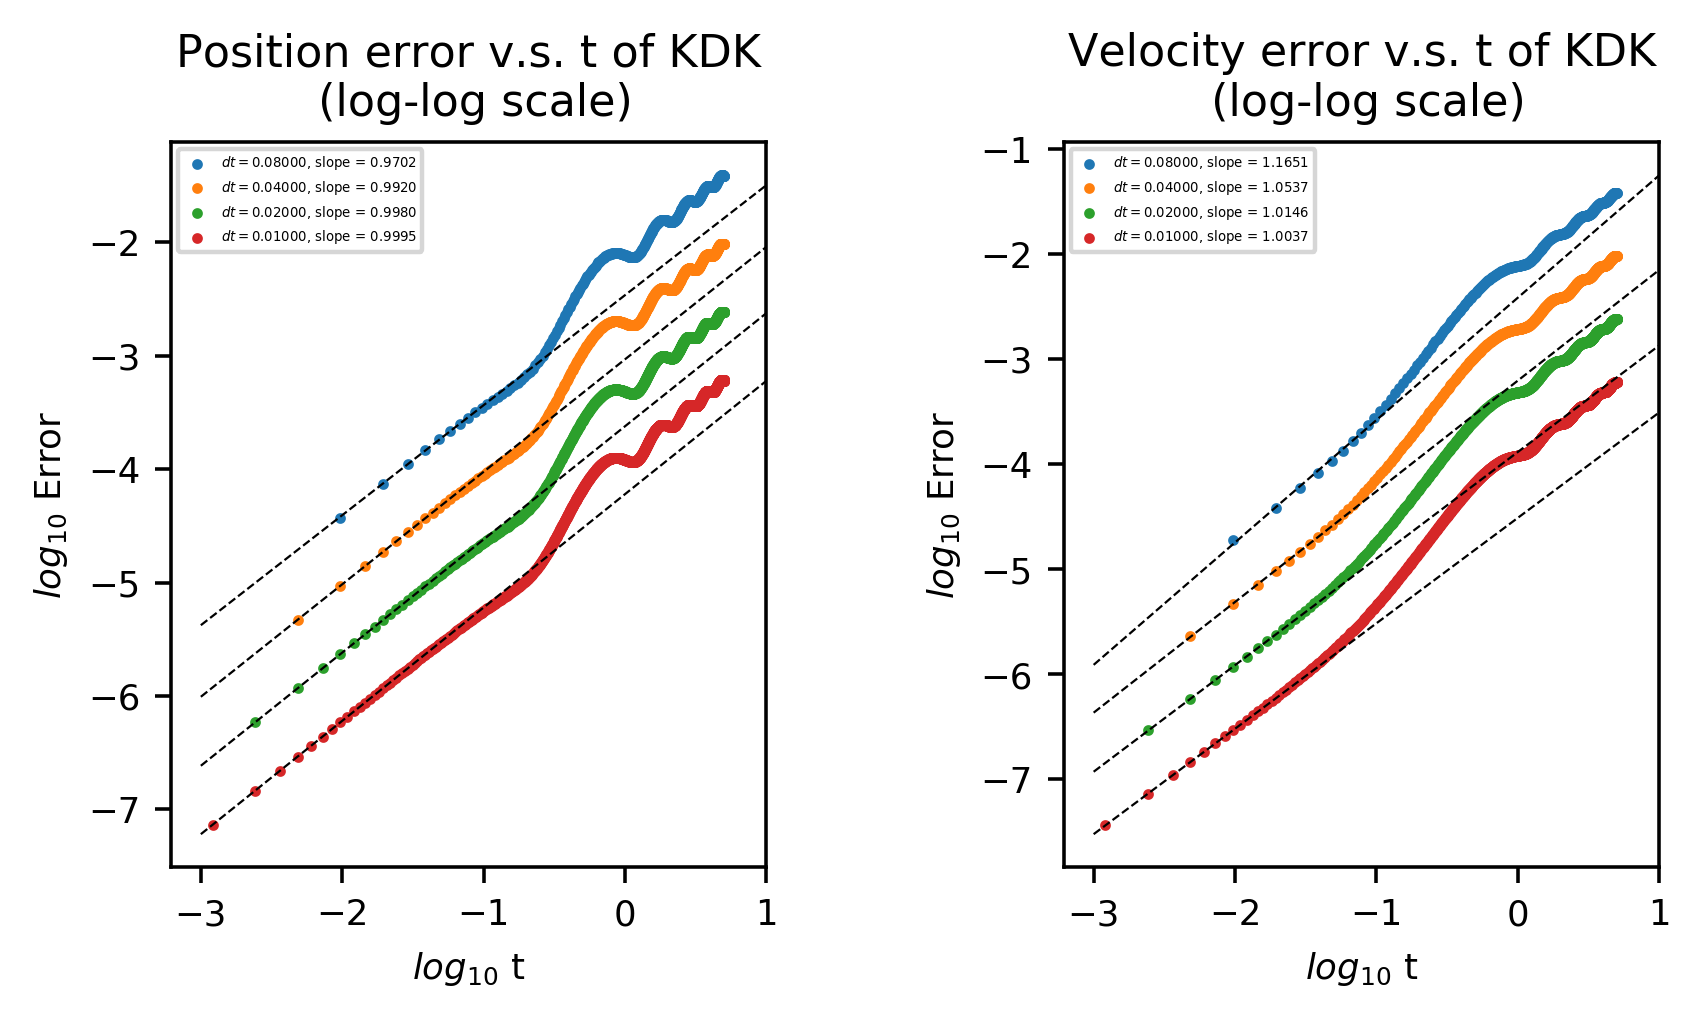

In [8]:
plt.figure(figsize=(3*2,3),dpi=320)
plt.subplots_adjust(wspace=0.5)

ax_2 = plt.subplot(121)
for dt in dt_range[:4]:
    data = np.loadtxt(path+file_dict_KDK[dt])
    t = np.log10(data[:,0])
    error = np.log10(abs(data[:,2]))
    popt, pcov = curve_fit(LINEAR_FIT, t[:10], error[:10])
    ax_2.scatter(t, error, label='$dt = %.5f$, slope = %.4f'%(dt, popt[0]), s=2.0)
    x = np.linspace(-3,1,200)
    ax_2.plot(x, popt[0]*x+popt[1], lw=0.5, c='k', ls='--')
ax_2.set_xlim([1.1*t.min(),1.1*t.max()])
# ax_2.set_ylim([-14.5,-5.5])
plt.xticks(np.linspace(-3,1,5), fontsize=8.0)
plt.yticks(fontsize=8.0)
ax_2.set_title("Position error v.s. t of KDK\n (log-log scale)", fontsize=10.)
ax_2.set_xlabel('$log_{10}$ t', fontsize =8.)
ax_2.set_ylabel('$log_{10}$ Error', fontsize =8.)
ax_2.legend(loc='upper left', prop={'size':3.0})

ax_3 = plt.subplot(122)
for dt in dt_range[:4]:
    data = np.loadtxt(path+file_dict_KDK[dt])
    t = np.log10(data[:,0])
    error = np.log10(abs(data[:,3]))
    popt, pcov = curve_fit(LINEAR_FIT, t[:10], error[:10])
    ax_3.scatter(t, error, label='$dt = %.5f$, slope = %.4f'%(dt, popt[0]), s=2.0)
    x = np.linspace(-3,1,200)
    ax_3.plot(x, popt[0]*x+popt[1], lw=0.5, c='k', ls='--')
ax_3.set_xlim([1.1*t.min(),1.1*t.max()])
# ax_3.set_ylim([-14.5,-5.5])
plt.xticks(np.linspace(-3,1,5), fontsize=8.0)
plt.yticks(fontsize=8.0)
ax_3.set_title("Velocity error v.s. t of KDK\n (log-log scale)", fontsize=10.)
ax_3.set_xlabel('$log_{10}$ t', fontsize =8.)
ax_3.set_ylabel('$log_{10}$ Error', fontsize =8.)
ax_3.legend(loc='upper left', prop={'size':3.0})
plt.savefig("/home/lab/Guan_Ming/Computational_Astrophysics/Homework/HW5/t-Position-and-Velocity-Error_N=3_fit_for_KDK.png")
plt.show()

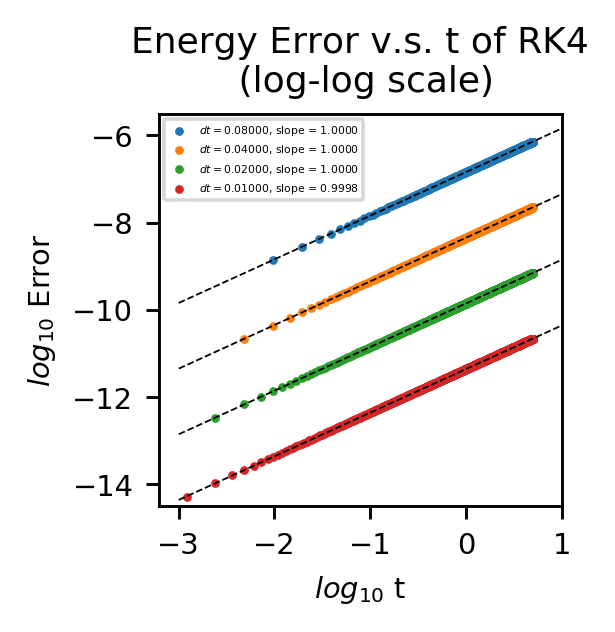

In [9]:
plt.figure(figsize=(2,2),dpi=260)
for dt in dt_range[:4]:
    data = np.loadtxt(path+file_dict_RK4[dt])
    t = np.log10(data[:,0])
    error = np.log10(data[:,1])
    popt, pcov = curve_fit(LINEAR_FIT, t, error)
    plt.scatter(t, error, label='$dt = %.5f$, slope = %.4f'%(dt, popt[0]), s=2.0)
    x = np.linspace(-3,1,200)
    plt.plot(x, popt[0]*x+popt[1], lw=0.5, c='k', ls='--')
plt.xlim([1.1*t.min(),1.1*t.max()])
plt.ylim([-14.5,-5.5])
plt.xticks(np.linspace(-3,1,5), fontsize=8.0)
plt.yticks(fontsize=8.0)
plt.title("Energy Error v.s. t of RK4\n (log-log scale)", fontsize=10.)
plt.xlabel('$log_{10}$ t', fontsize =8.)
plt.ylabel('$log_{10}$ Error', fontsize =8.)
plt.legend(loc='upper left', prop={'size':3.0})
plt.savefig("/home/lab/Guan_Ming/Computational_Astrophysics/Homework/HW5/t-Energy-Error_N=3_fit_for_RK4.png", bbox_inches='tight', dpi=320, pad_inches=0.05)

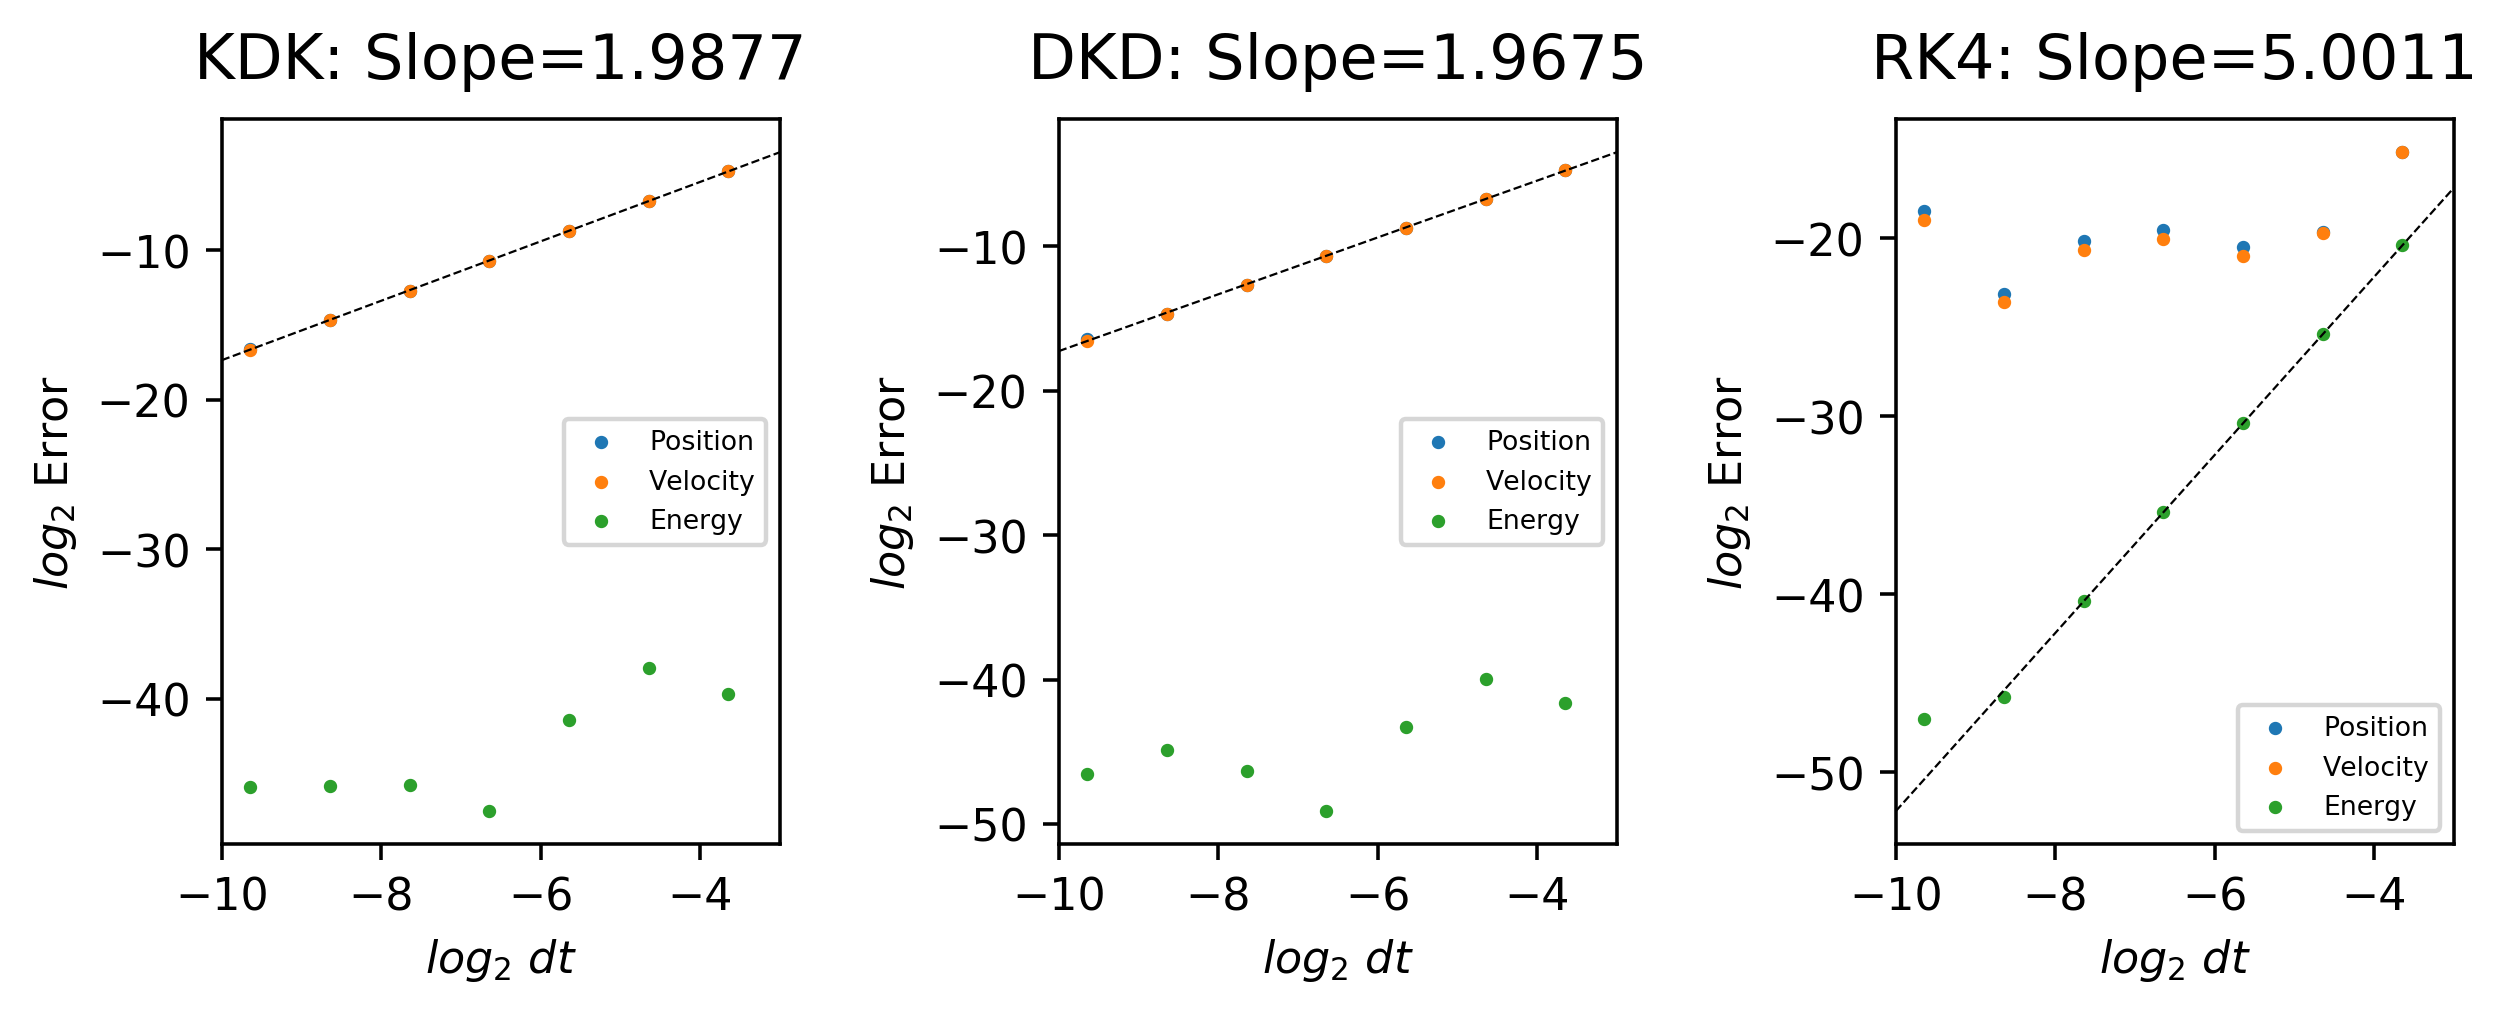

In [10]:
plt.figure(figsize=(3*3,3),dpi=320)
plt.subplots_adjust(wspace=0.5)
x = np.linspace(-10,-3,200)

path = "./Data_Saving/Circular_Orbit/N=3_end_t=5period/"
data = np.loadtxt(path+'mode=KDK_pos_and_vel_error.txt')
ax_1 = plt.subplot(131)
ax_1.scatter(np.log2(data[:,0]), np.log2(abs(data[:,1])),label='Position', s=4.0)
ax_1.scatter(np.log2(data[:,0]), np.log2(abs(data[:,2])),label='Velocity', s=4.0)
ax_1.scatter(np.log2(data[:,0]), np.log2(abs(data[:,3])),label='Energy', s=4.0)
popt, pcov = curve_fit(LINEAR_FIT, np.log2(data[:,0]), np.log2(abs(data[:,1])))
ax_1.plot(x, popt[0]*x+popt[1], lw=0.5, ls='--', c='k')
ax_1.set_xlim([-10,-3.])
# ax_1.set_ylim([-10.5,4.])
ax_1.set_xlabel('$log_{2}$ $dt$', fontsize =10.)
ax_1.set_ylabel('$log_{2}$ Error', fontsize =10.)
ax_1.set_title("KDK: Slope=%.4f"%popt[0], fontsize=14., y=1.02)
ax_1.legend(loc='right', prop={'size':6.0})

data = np.loadtxt(path+'mode=DKD_pos_and_vel_error.txt')
ax_2 = plt.subplot(132)
ax_2.scatter(np.log2(data[:,0]), np.log2(abs(data[:,1])),label='Position', s=4.0)
ax_2.scatter(np.log2(data[:,0]), np.log2(abs(data[:,2])),label='Velocity', s=4.0)
ax_2.scatter(np.log2(data[:,0]), np.log2(abs(data[:,3])),label='Energy', s=4.0)
popt, pcov = curve_fit(LINEAR_FIT, np.log2(data[:,0]), np.log2(abs(data[:,1])))
ax_2.plot(x, popt[0]*x+popt[1], lw=0.5, ls='--', c='k')
ax_2.set_xlim([-10,-3.])
# ax_1.set_ylim([-10.5,4.])
ax_2.set_xlabel('$log_{2}$ $dt$', fontsize =10.)
ax_2.set_ylabel('$log_{2}$ Error', fontsize =10.)
ax_2.set_title("DKD: Slope=%.4f"%popt[0], fontsize=14., y=1.02)
ax_2.legend(loc='right', prop={'size':6.0})

data = np.loadtxt(path+'mode=RK4_pos_and_vel_error.txt')
ax_3 = plt.subplot(133)
ax_3.scatter(np.log2(data[:,0]), np.log2(abs(data[:,1])),label='Position', s=4.0)
ax_3.scatter(np.log2(data[:,0]), np.log2(abs(data[:,2])),label='Velocity', s=4.0)
ax_3.scatter(np.log2(data[:,0]), np.log2(abs(data[:,3])),label='Energy', s=4.0)
popt, pcov = curve_fit(LINEAR_FIT, np.log2(data[:-2,0]), np.log2(abs(data[:-2,3])))
ax_3.plot(x, popt[0]*x+popt[1], lw=0.5, ls='--', c='k')
ax_3.set_xlim([-10,-3.])
ax_3.set_xlabel('$log_{2}$ $dt$', fontsize =10.)
ax_3.set_ylabel('$log_{2}$ Error', fontsize =10.)
ax_3.set_title("RK4: Slope=%.4f"%popt[0], fontsize=14., y=1.02)
ax_3.legend(loc='lower right', prop={'size':6.0})
plt.savefig("/home/lab/Guan_Ming/Computational_Astrophysics/Homework/HW5/dt-all_Errors_N=3_fit.png", bbox_inches='tight', dpi=320, pad_inches=0.05)
plt.show()

### Circular orbit, $N=4$

In [11]:
path = "./Data_Saving/Circular_Orbit/N=4_end_t=5period/"
temp = os.listdir(path)
files_KDK = []
files_DKD = []
files_RK4 = []
index_KDK = []
index_DKD = []
index_RK4 = []

for file in temp:
    if 'dt' in file:
        if 'KDK' in file and 'dt' in file:
            files_KDK.append(file)
            index_KDK.append(eval(re.sub('[^0-9,^\.]','',re.sub('.txt','',file.split('_')[-1]))))
        elif 'DKD' in file and 'dt' in file:
            files_DKD.append(file)
            index_DKD.append(eval(re.sub('[^0-9,^\.]','',re.sub('.txt','',file.split('_')[-1]))))
        elif 'RK4' in file and 'dt' in file:
            files_RK4.append(file)
            index_RK4.append(eval(re.sub('[^0-9,^\.]','',re.sub('.txt','',file.split('_')[-1]))))
file_dict_KDK = dict(zip(index_KDK,files_KDK))
file_dict_DKD = dict(zip(index_DKD,files_DKD))
file_dict_RK4 = dict(zip(index_RK4,files_RK4))
dt_range = 0.08*2**np.linspace(0,-6,7)

KDK Scheme:
	dt = 0.08000, error min:-9.29480993e-06; error max:-1.73842457e-11
	dt = 0.04000, error min:-5.84930479e-07; error max:-1.91848799e-12
	dt = 0.02000, error min:-3.66211026e-08; error max:-6.25228263e-14
	dt = 0.01000, error min:-2.28980084e-09; error max:4.29191943e-15
	dt = 0.00500, error min:-1.43126233e-10; error max:6.72787370e-15
	dt = 0.00250, error min:-8.95572788e-12; error max:-1.15997822e-16
	dt = 0.00125, error min:-5.80569101e-13; error max:7.30786281e-15
DKD Scheme:
	dt = 0.08000, error min:-2.32544454e-06; error max:-4.45443238e-12
	dt = 0.04000, error min:-1.46260462e-07; error max:-2.70158928e-13
	dt = 0.02000, error min:-9.15571439e-09; error max:8.34024343e-14
	dt = 0.01000, error min:-5.72459578e-10; error max:1.20637735e-14
	dt = 0.00500, error min:-3.57902001e-11; error max:-2.31995645e-16
	dt = 0.00250, error min:-2.24154192e-12; error max:1.73996734e-15
	dt = 0.00125, error min:-1.57177049e-13; error max:4.63991290e-16
RK4 Scheme:
	dt = 0.08000, erro

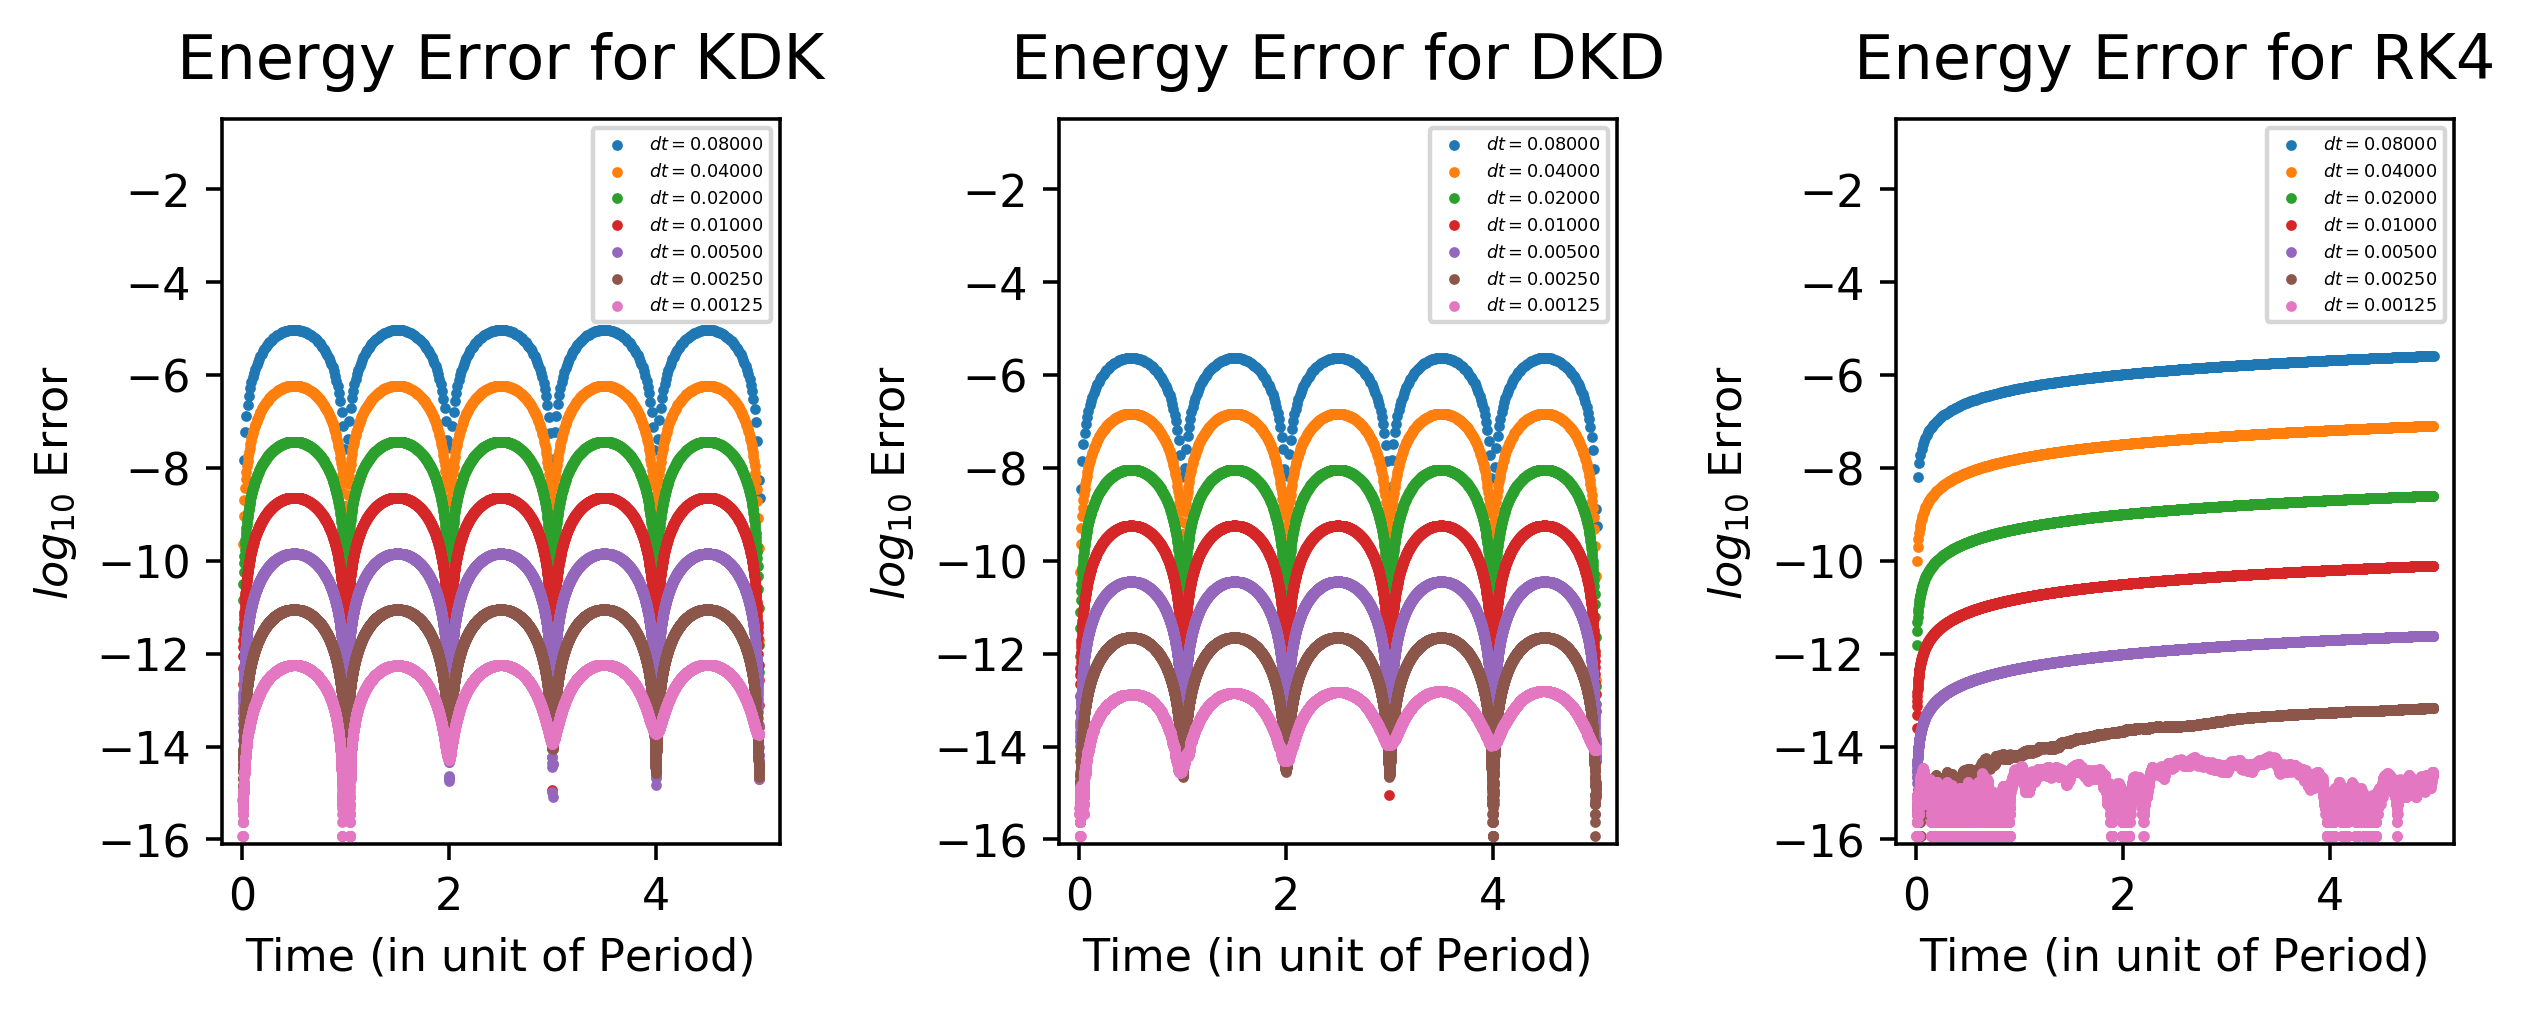

In [12]:
plt.figure(figsize=(3*3,3),dpi=320)
plt.subplots_adjust(wspace=0.5)
ax_1 = plt.subplot(131)
print("KDK Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_KDK[dt])
    t = data[:,0]
    error = data[:,1]
    criteria = abs(error)>=1e-16
    ax_1.scatter(t[criteria],np.log10(abs(error[criteria])), s = 2.0, label='$dt = %.5f$'%dt)
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
ax_1.set_xlim([-0.2,5.2])
ax_1.set_ylim([-16.1,-0.5])
ax_1.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_1.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_1.set_title("Energy Error for KDK", fontsize=14., y=1.02)
ax_1.legend(loc='upper right', prop={'size':4.0})

ax_2 = plt.subplot(132)
print("DKD Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_DKD[dt])
    t = data[:,0]
    error = data[:,1]
    criteria = abs(error)>=1e-16
    ax_2.scatter(t[criteria],np.log10(abs(error[criteria])), s = 2.0, label='$dt = %.5f$'%dt)
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
ax_2.set_xlim([-0.2,5.2])
ax_2.set_ylim([-16.1,-0.5])
ax_2.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_2.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_2.set_title("Energy Error for DKD", fontsize=14., y=1.02)
ax_2.legend(loc='upper right', prop={'size':4.0})

ax_3 = plt.subplot(133)
print("RK4 Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_RK4[dt])
    t = data[:,0]
    error = data[:,1]
    criteria = abs(error)>=1e-16
    ax_3.scatter(t[criteria],np.log10(abs(error[criteria])), s = 2.0, label='$dt = %.5f$'%dt)
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
ax_3.set_xlim([-0.2,5.2])
ax_3.set_ylim([-16.1,-0.5])
ax_3.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_3.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_3.set_title("Energy Error for RK4", fontsize=14., y=1.02)
ax_3.legend(loc='upper right', prop={'size':4.0})
plt.savefig("/home/lab/Guan_Ming/Computational_Astrophysics/Homework/HW5/t-Energy-Error_N=4_Circular_Orbit.png", bbox_inches='tight', dpi=320, pad_inches=0.05)
plt.show()

KDK Scheme:
	dt = 0.08000, error min:7.98931272e-05; error max:6.45540665e-02
	dt = 0.04000, error min:9.98750118e-06; error max:1.61689108e-02
	dt = 0.02000, error min:1.24846453e-06; error max:4.04403698e-03
	dt = 0.01000, error min:1.56058907e-07; error max:1.01133549e-03
	dt = 0.00500, error min:1.95073897e-08; error max:2.52786016e-04
	dt = 0.00250, error min:2.43842462e-09; error max:6.57583530e-05
	dt = 0.00125, error min:3.04803167e-10; error max:1.63163700e-05
DKD Scheme:
	dt = 0.08000, error min:4.00743627e-05; error max:6.39033032e-02
	dt = 0.04000, error min:4.99776020e-06; error max:1.60212407e-02
	dt = 0.02000, error min:6.24357691e-07; error max:4.00848180e-03
	dt = 0.01000, error min:7.80333739e-08; error max:1.00243928e-03
	dt = 0.00500, error min:9.75381724e-09; error max:2.51015657e-04
	dt = 0.00250, error min:1.21921599e-09; error max:8.05014103e-05
	dt = 0.00125, error min:1.52401589e-10; error max:3.13958981e-05
RK4 Scheme:
	dt = 0.08000, error min:2.47219325e-08;

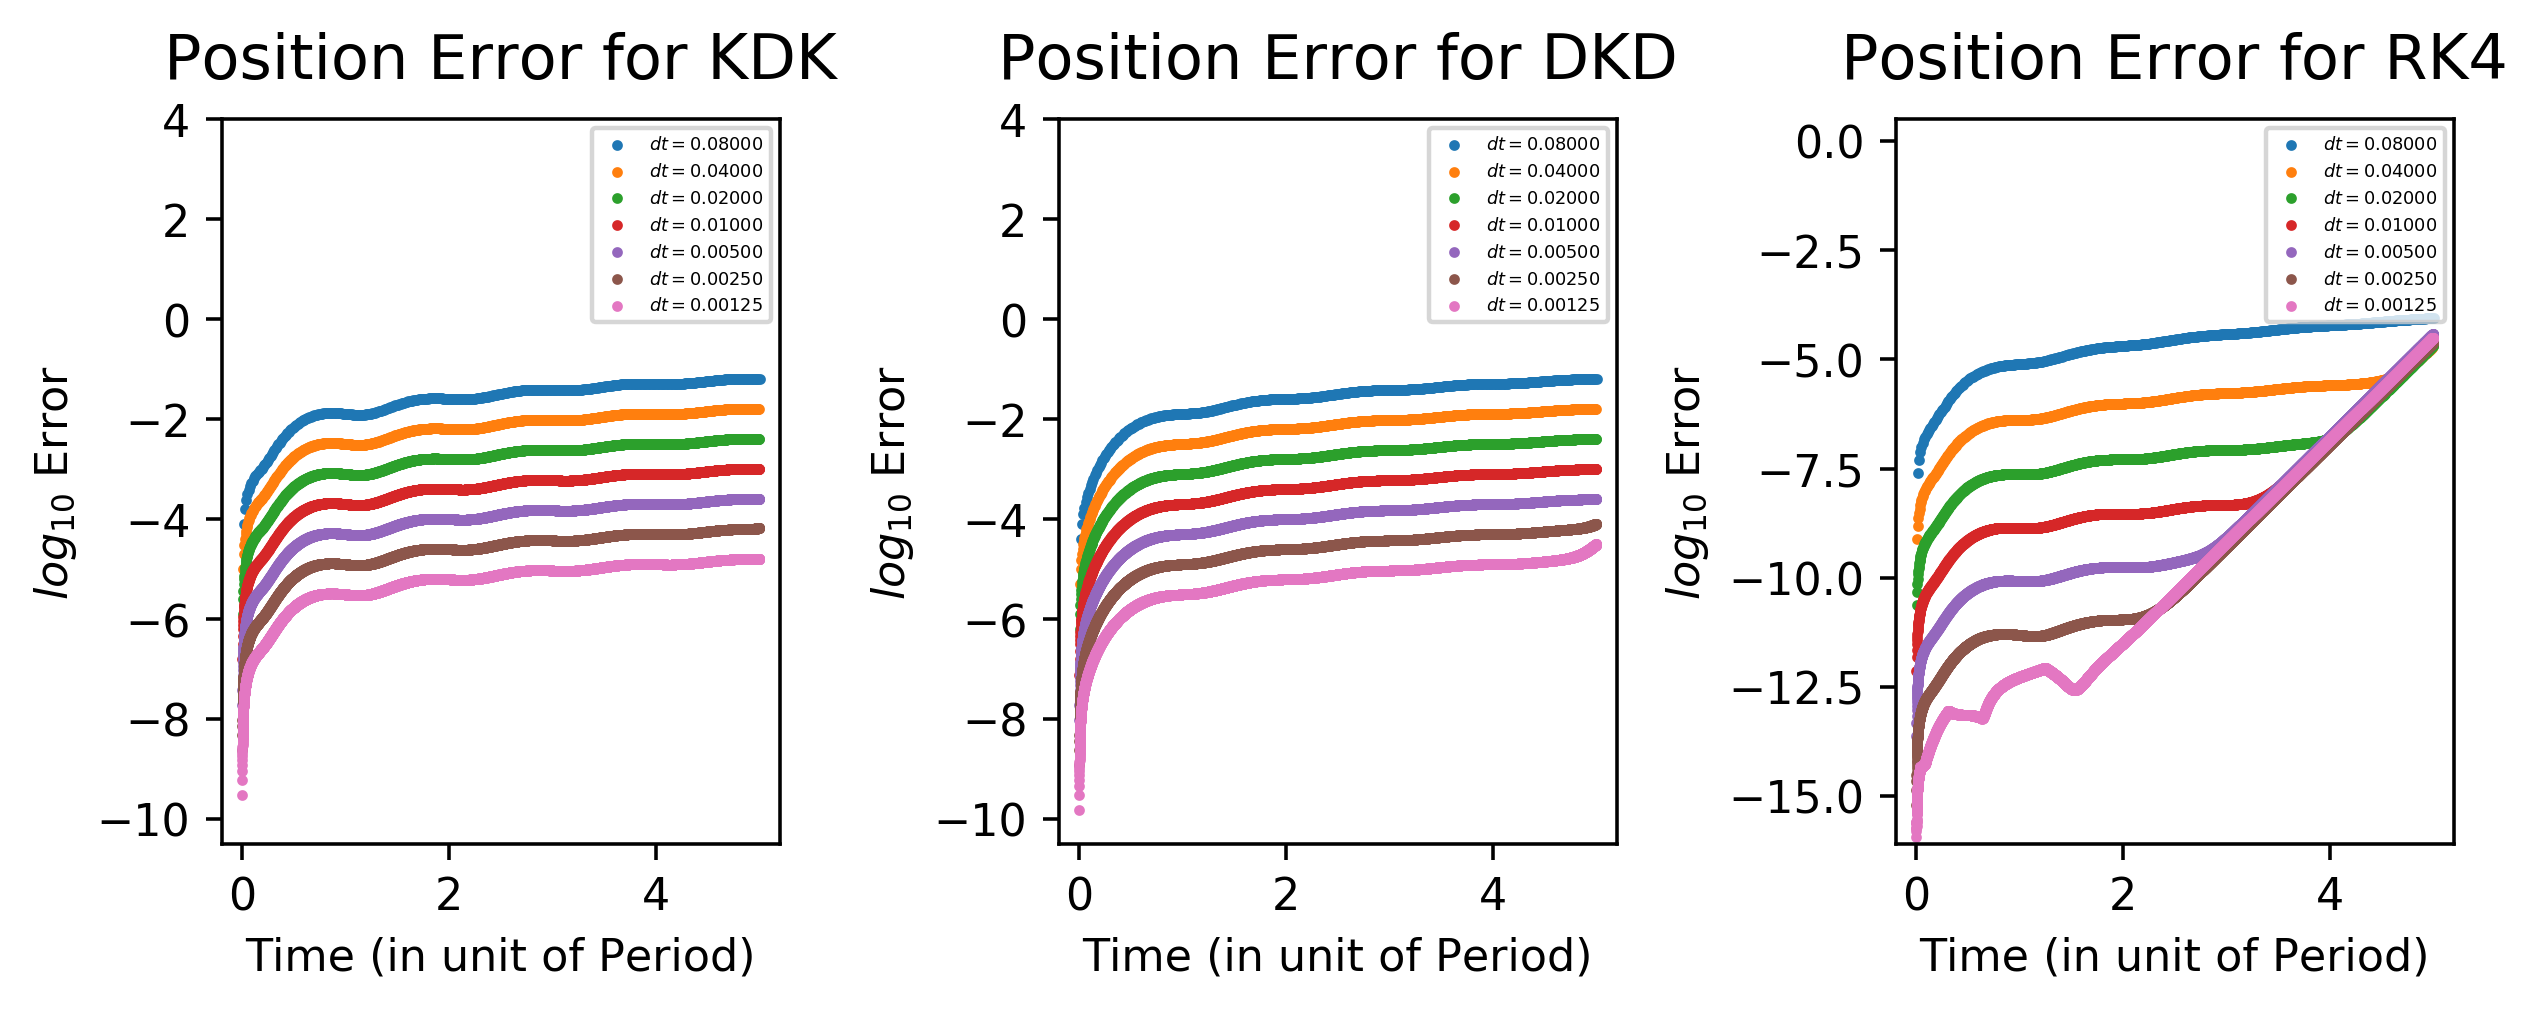

In [13]:
plt.figure(figsize=(3*3,3),dpi=320)
plt.subplots_adjust(wspace=0.5)
ax_1 = plt.subplot(131)
print("KDK Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_KDK[dt])
    t = data[:,0]
    error = data[:,2]
    criteria = abs(error)>=1e-16
    ax_1.scatter(t[criteria],np.log10(abs(error[criteria])), s = 2.0, label='$dt = %.5f$'%dt)
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
ax_1.set_xlim([-0.2,5.2])
ax_1.set_ylim([-10.5,4.])
ax_1.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_1.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_1.set_title("Position Error for KDK", fontsize=14., y=1.02)
ax_1.legend(loc='upper right', prop={'size':4.0})

ax_2 = plt.subplot(132)
print("DKD Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_DKD[dt])
    t = data[:,0]
    error = data[:,2]
    criteria = abs(error)>=1e-16
    ax_2.scatter(t[criteria],np.log10(abs(error[criteria])), s = 2.0, label='$dt = %.5f$'%dt)
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
ax_2.set_xlim([-0.2,5.2])
ax_2.set_ylim([-10.5,4.])
ax_2.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_2.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_2.set_title("Position Error for DKD", fontsize=14., y=1.02)
ax_2.legend(loc='upper right', prop={'size':4.0})

ax_3 = plt.subplot(133)
print("RK4 Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_RK4[dt])
    t = data[:,0]
    error = data[:,2]
    criteria = abs(error)>=1e-16
    ax_3.scatter(t[criteria],np.log10(abs(error[criteria])), s = 2.0, label='$dt = %.5f$'%dt)
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
ax_3.set_xlim([-0.2,5.2])
ax_3.set_ylim([-16.1,0.5])
ax_3.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_3.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_3.set_title("Position Error for RK4", fontsize=14., y=1.02)
ax_3.legend(loc='upper right', prop={'size':4.0})
plt.savefig("/home/lab/Guan_Ming/Computational_Astrophysics/Homework/HW5/t-Position-Error_N=4_Circular_Orbit.png", bbox_inches='tight', dpi=320, pad_inches=0.05)
plt.show()

KDK Scheme:
	dt = 0.08000, error min:4.05530433e-05; error max:6.39862888e-02
	dt = 0.04000, error min:5.01279164e-06; error max:1.60265115e-02
	dt = 0.02000, error min:6.24828000e-07; error max:4.00879573e-03
	dt = 0.01000, error min:7.80480756e-08; error max:1.00301384e-03
	dt = 0.00500, error min:9.75427660e-09; error max:2.50577153e-04
	dt = 0.00250, error min:1.21923030e-09; error max:6.49590077e-05
	dt = 0.00125, error min:1.52402012e-10; error max:1.61477325e-05
DKD Scheme:
	dt = 0.08000, error min:9.97083628e-05; error max:6.39266941e-02
	dt = 0.04000, error min:1.24794315e-05; error max:1.60219355e-02
	dt = 0.02000, error min:1.56042609e-06; error max:4.00876698e-03
	dt = 0.01000, error min:1.95068803e-07; error max:1.00248561e-03
	dt = 0.00500, error min:2.43840858e-08; error max:2.50907680e-04
	dt = 0.00250, error min:3.04802579e-09; error max:7.62402395e-05
	dt = 0.00125, error min:3.81003614e-10; error max:2.81475433e-05
RK4 Scheme:
	dt = 0.08000, error min:2.14321166e-08;

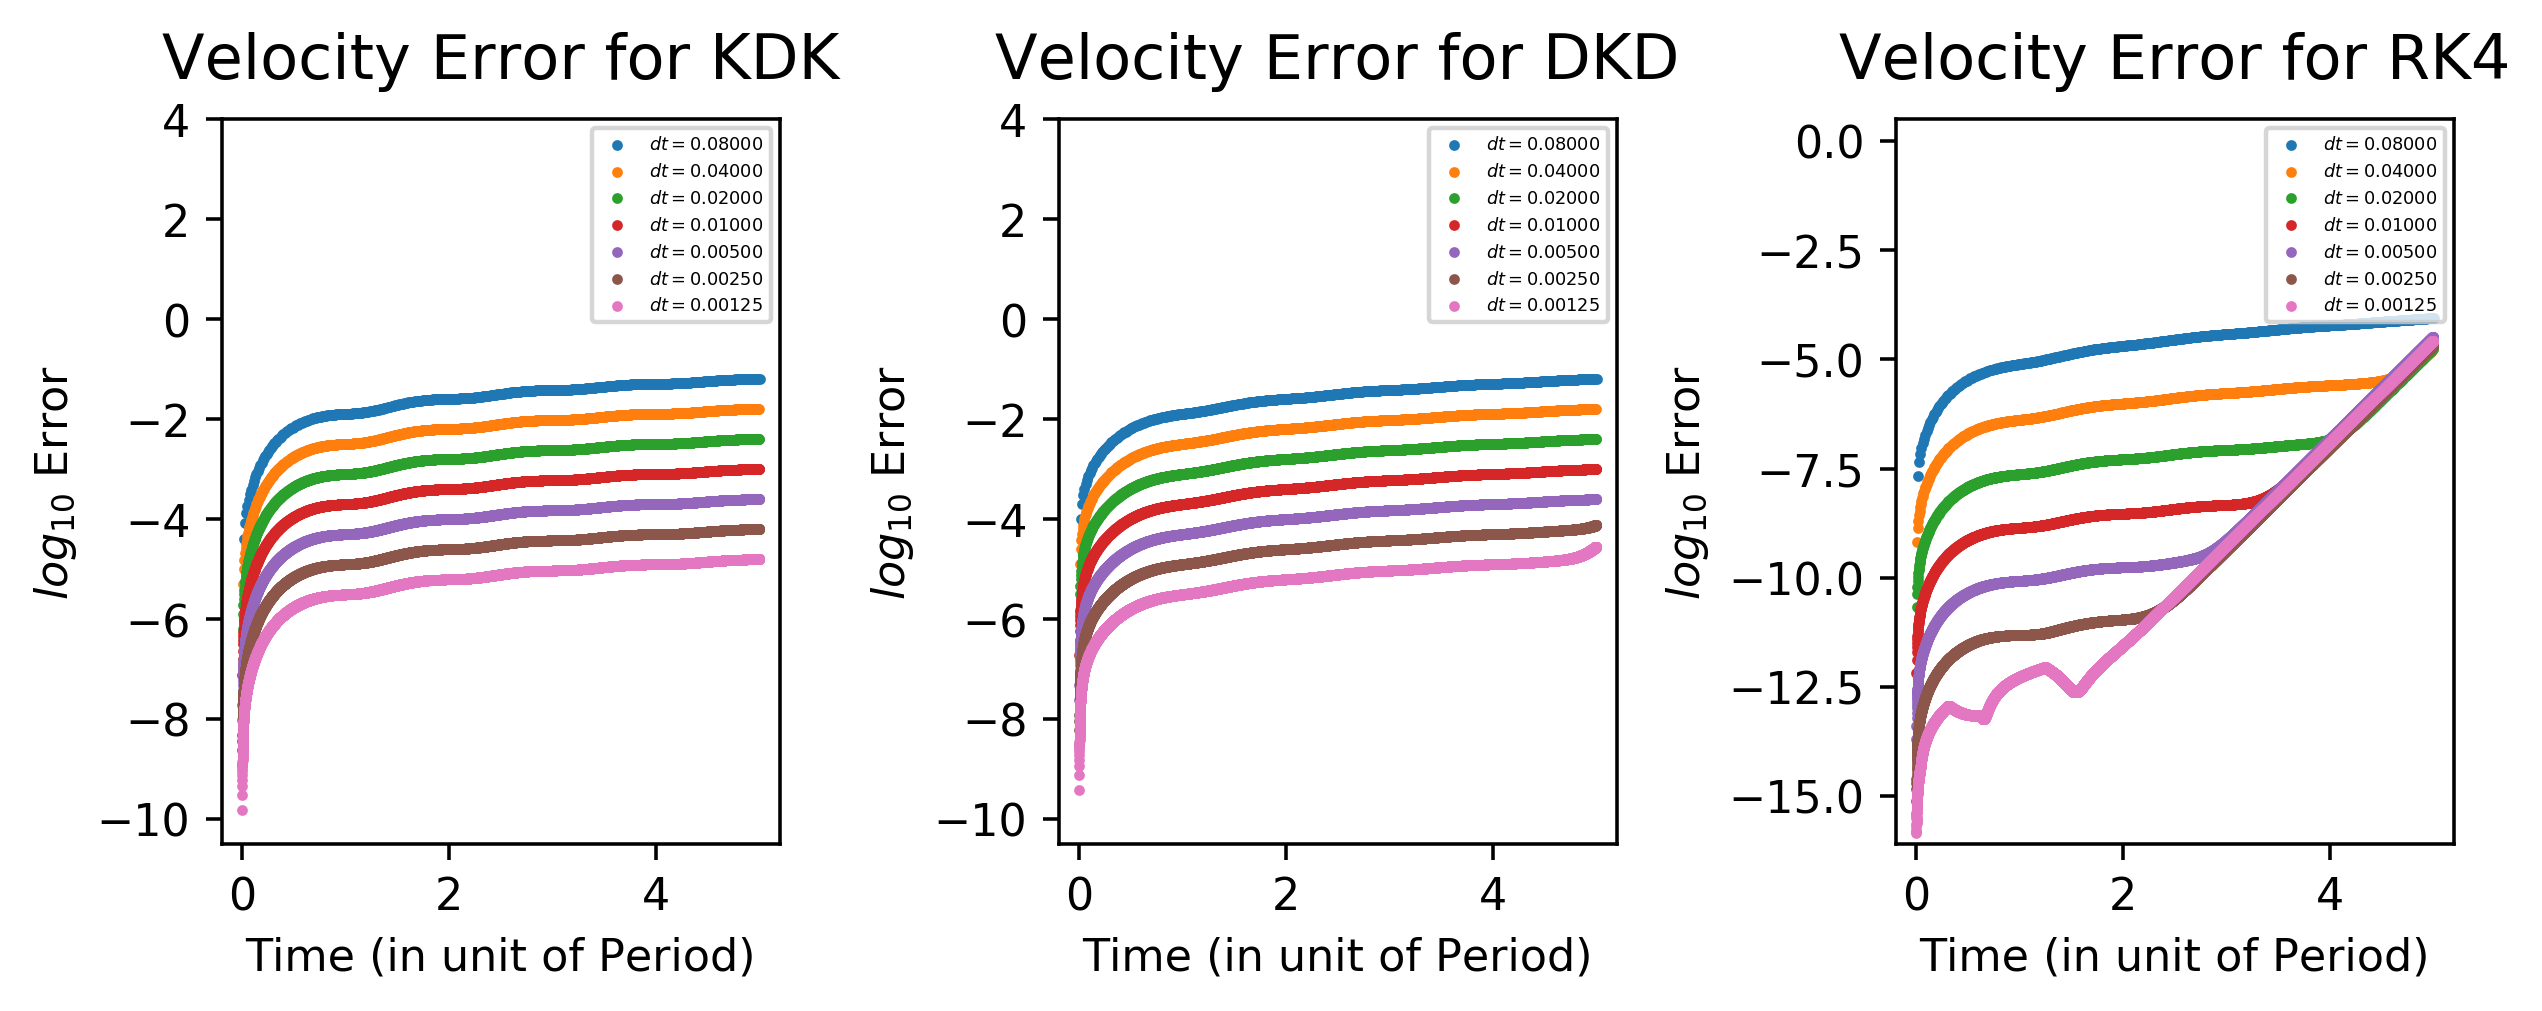

In [14]:
plt.figure(figsize=(3*3,3),dpi=320)
plt.subplots_adjust(wspace=0.5)
ax_1 = plt.subplot(131)
print("KDK Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_KDK[dt])
    t = data[:,0]
    error = data[:,3]
    criteria = abs(error)>=1e-16
    ax_1.scatter(t[criteria],np.log10(abs(error[criteria])), s = 2.0, label='$dt = %.5f$'%dt)
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
ax_1.set_xlim([-0.2,5.2])
ax_1.set_ylim([-10.5,4.])
ax_1.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_1.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_1.set_title("Velocity Error for KDK", fontsize=14., y=1.02)
ax_1.legend(loc='upper right', prop={'size':4.0})

ax_2 = plt.subplot(132)
print("DKD Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_DKD[dt])
    t = data[:,0]
    error = data[:,3]
    criteria = abs(error)>=1e-16
    ax_2.scatter(t[criteria],np.log10(abs(error[criteria])), s = 2.0, label='$dt = %.5f$'%dt)
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
ax_2.set_xlim([-0.2,5.2])
ax_2.set_ylim([-10.5,4.])
ax_2.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_2.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_2.set_title("Velocity Error for DKD", fontsize=14., y=1.02)
ax_2.legend(loc='upper right', prop={'size':4.0})

ax_3 = plt.subplot(133)
print("RK4 Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_RK4[dt])
    t = data[:,0]
    error = data[:,3]
    criteria = abs(error)>=1e-16
    ax_3.scatter(t[criteria],np.log10(abs(error[criteria])), s = 2.0, label='$dt = %.5f$'%dt)
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
ax_3.set_xlim([-0.2,5.2])
ax_3.set_ylim([-16.1,0.5])
ax_3.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_3.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_3.set_title("Velocity Error for RK4", fontsize=14., y=1.02)
ax_3.legend(loc='upper right', prop={'size':4.0})
plt.savefig("/home/lab/Guan_Ming/Computational_Astrophysics/Homework/HW5/t-Velocity-Error_N=4_Circular_Orbit.png", bbox_inches='tight', dpi=320, pad_inches=0.05)
plt.show()

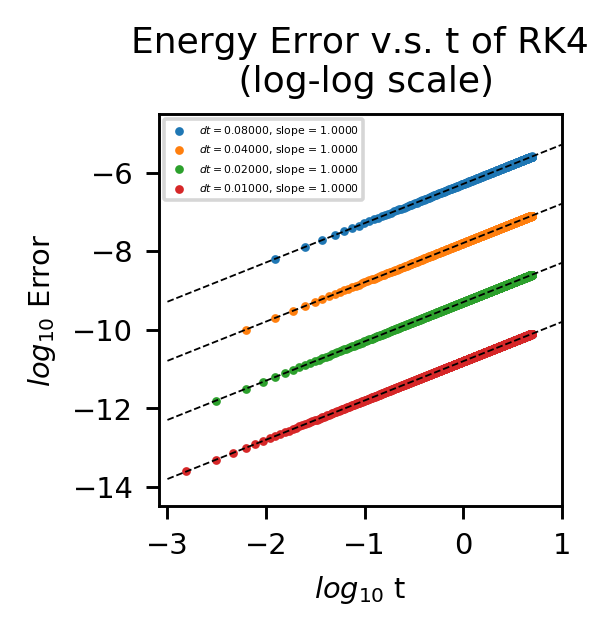

In [15]:
plt.figure(figsize=(2,2), dpi=260)
for dt in dt_range[:4]:
    data = np.loadtxt(path+file_dict_RK4[dt])
    t = np.log10(data[:,0])
    error = np.log10(data[:,1])
    popt, pcov = curve_fit(LINEAR_FIT, t, error)
    plt.scatter(t, error, label='$dt = %.5f$, slope = %.4f'%(dt, popt[0]), s=2.0)
    x = np.linspace(-3,1,200)
    plt.plot(x, popt[0]*x+popt[1], lw=0.5, c='k', ls='--')
plt.xlim([1.1*t.min(),1.1*t.max()])
plt.ylim([-14.5,-4.5])
plt.xticks(np.linspace(-3,1,5),fontsize=8.0)
plt.yticks(fontsize=8.0)
plt.title("Energy Error v.s. t of RK4\n (log-log scale)", fontsize=10.)
plt.xlabel('$log_{10}$ t', fontsize =8.)
plt.ylabel('$log_{10}$ Error', fontsize =8.)
plt.legend(loc='upper left', prop={'size':3.0})
plt.savefig("/home/lab/Guan_Ming/Computational_Astrophysics/Homework/HW5/t-Energy-Error_N=4_fit_for_RK4.png", bbox_inches='tight', dpi=320, pad_inches=0.05)
plt.show()

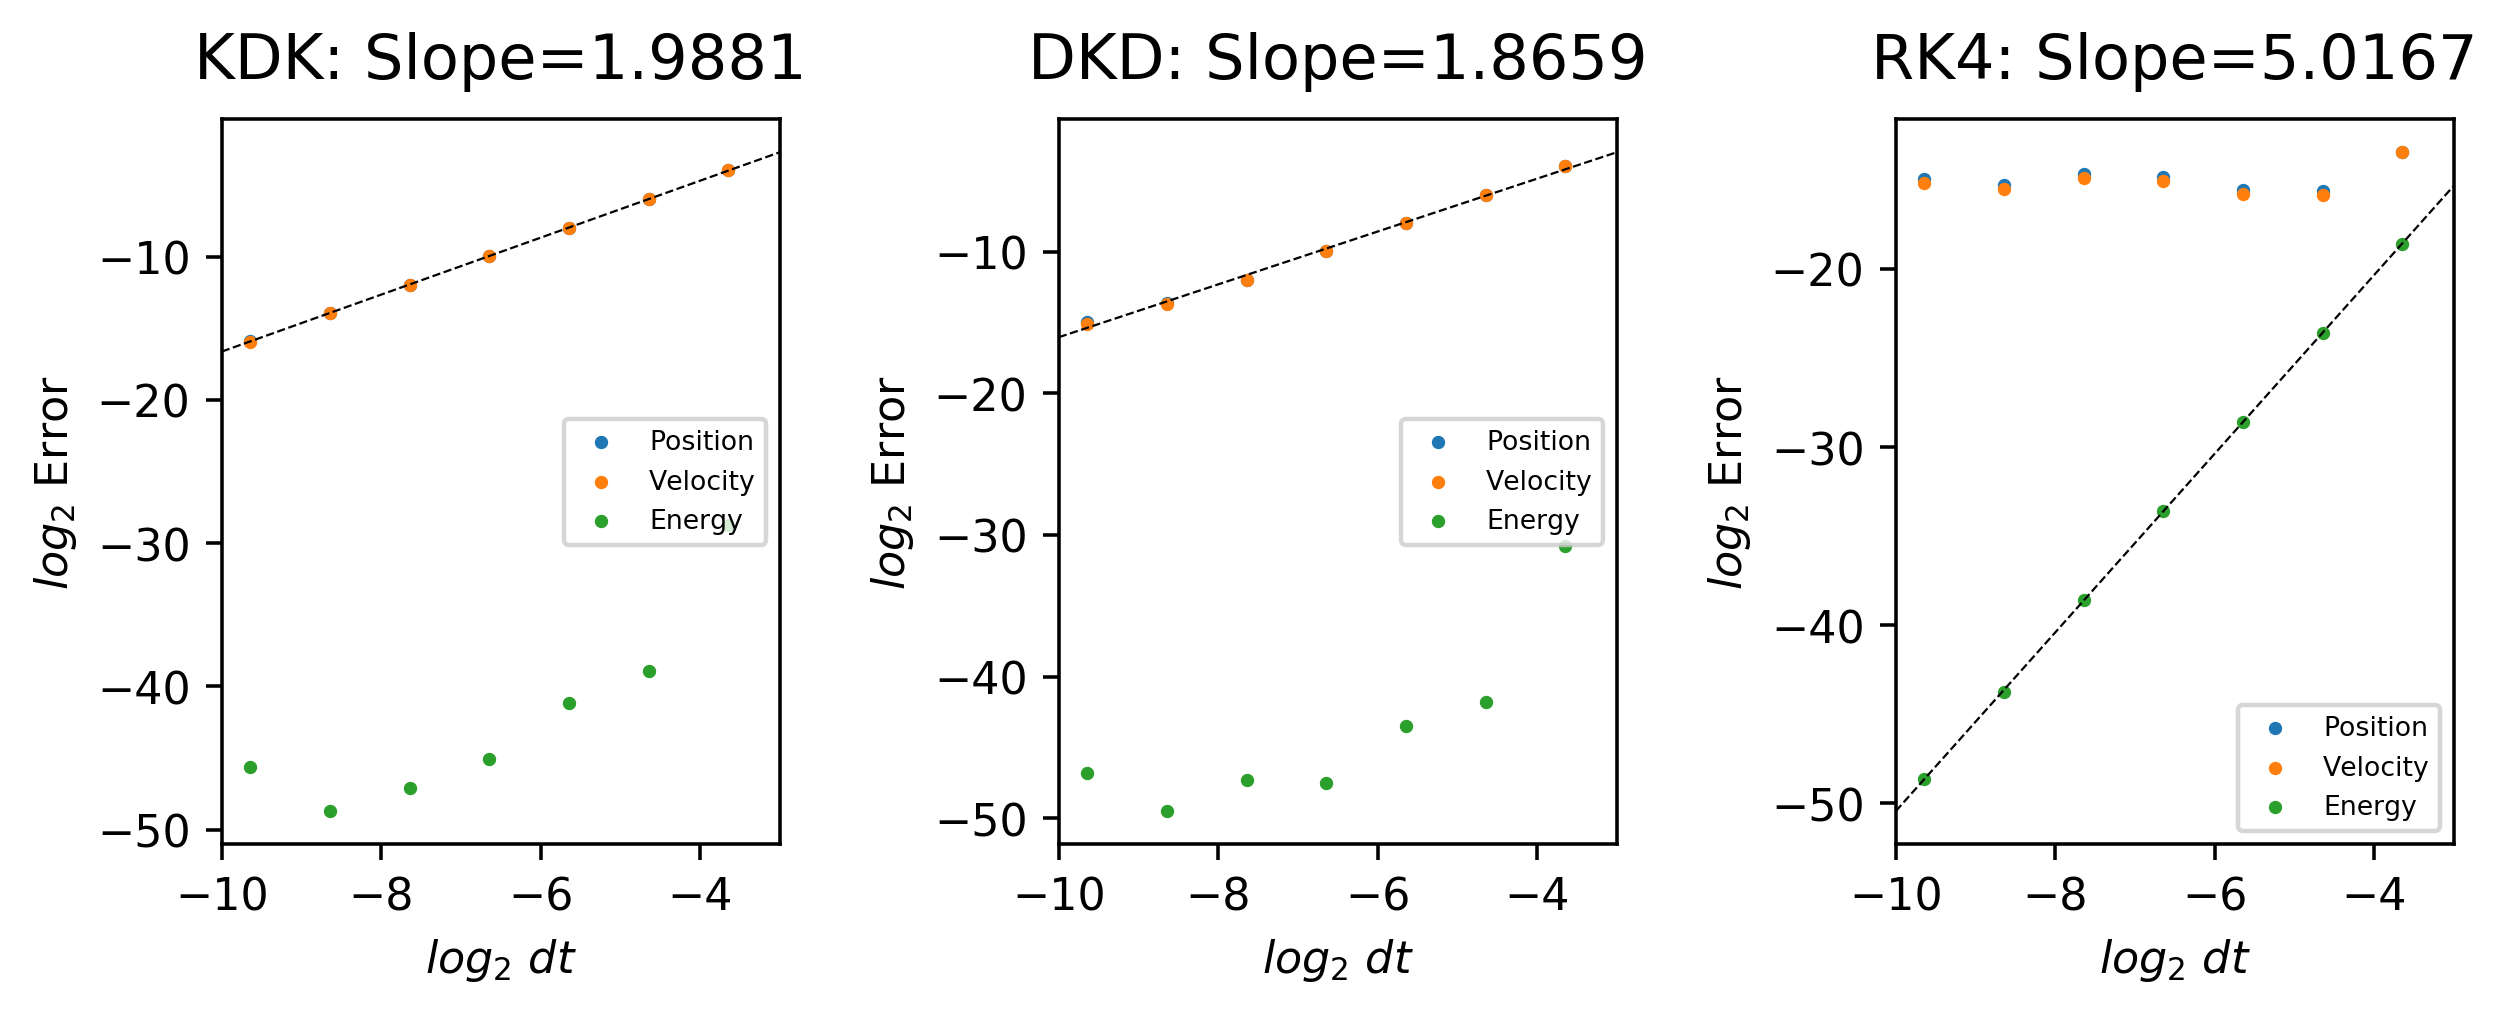

In [16]:
plt.figure(figsize=(3*3,3),dpi=320)
plt.subplots_adjust(wspace=0.5)
x = np.linspace(-10,-3,200)

path = "./Data_Saving/Circular_Orbit/N=4_end_t=5period/"
data = np.loadtxt(path+'mode=KDK_pos_and_vel_error.txt')
ax_1 = plt.subplot(131)
ax_1.scatter(np.log2(data[:,0]), np.log2(abs(data[:,1])),label='Position', s=4.0)
ax_1.scatter(np.log2(data[:,0]), np.log2(abs(data[:,2])),label='Velocity', s=4.0)
ax_1.scatter(np.log2(data[:,0]), np.log2(abs(data[:,3])),label='Energy', s=4.0)
popt, pcov = curve_fit(LINEAR_FIT, np.log2(data[:,0]), np.log2(abs(data[:,1])))
ax_1.plot(x, popt[0]*x+popt[1], lw=0.5, ls='--', c='k')
ax_1.set_xlim([-10,-3.])
# ax_1.set_ylim([-10.5,4.])
ax_1.set_xlabel('$log_{2}$ $dt$', fontsize =10.)
ax_1.set_ylabel('$log_{2}$ Error', fontsize =10.)
ax_1.set_title("KDK: Slope=%.4f"%popt[0], fontsize=14., y=1.02)
ax_1.legend(loc='right', prop={'size':6.0})

data = np.loadtxt(path+'mode=DKD_pos_and_vel_error.txt')
ax_2 = plt.subplot(132)
ax_2.scatter(np.log2(data[:,0]), np.log2(abs(data[:,1])),label='Position', s=4.0)
ax_2.scatter(np.log2(data[:,0]), np.log2(abs(data[:,2])),label='Velocity', s=4.0)
ax_2.scatter(np.log2(data[:,0]), np.log2(abs(data[:,3])),label='Energy', s=4.0)
popt, pcov = curve_fit(LINEAR_FIT, np.log2(data[:,0]), np.log2(abs(data[:,1])))
ax_2.plot(x, popt[0]*x+popt[1], lw=0.5, ls='--', c='k')
ax_2.set_xlim([-10,-3.])
# ax_1.set_ylim([-10.5,4.])
ax_2.set_xlabel('$log_{2}$ $dt$', fontsize =10.)
ax_2.set_ylabel('$log_{2}$ Error', fontsize =10.)
ax_2.set_title("DKD: Slope=%.4f"%popt[0], fontsize=14., y=1.02)
ax_2.legend(loc='right', prop={'size':6.0})

data = np.loadtxt(path+'mode=RK4_pos_and_vel_error.txt')
ax_3 = plt.subplot(133)
ax_3.scatter(np.log2(data[:,0]), np.log2(abs(data[:,1])),label='Position', s=4.0)
ax_3.scatter(np.log2(data[:,0]), np.log2(abs(data[:,2])),label='Velocity', s=4.0)
ax_3.scatter(np.log2(data[:,0]), np.log2(abs(data[:,3])),label='Energy', s=4.0)
popt, pcov = curve_fit(LINEAR_FIT, np.log2(data[:,0]), np.log2(abs(data[:,3])))
ax_3.plot(x, popt[0]*x+popt[1], lw=0.5, ls='--', c='k')
ax_3.set_xlim([-10,-3.])
ax_3.set_xlabel('$log_{2}$ $dt$', fontsize =10.)
ax_3.set_ylabel('$log_{2}$ Error', fontsize =10.)
ax_3.set_title("RK4: Slope=%.4f"%popt[0], fontsize=14., y=1.02)
ax_3.legend(loc='lower right', prop={'size':6.0})
plt.savefig("/home/lab/Guan_Ming/Computational_Astrophysics/Homework/HW5/dt-all_Errors_N=4_fit.png", bbox_inches='tight', dpi=320, pad_inches=0.05)
plt.show()

### Kepler Orbit, $A<1.0$

In [356]:
path = "./Data_Saving/Kepler_Orbit/A=0.8000_end_t=80period/"
temp = os.listdir(path)
files_KDK = []
files_DKD = []
files_RK4 = []
index_KDK = []
index_DKD = []
index_RK4 = []

for file in temp:
    if 'dt' in file:
        if 'KDK' in file and 'dt' in file:
            files_KDK.append(file)
            index_KDK.append(eval(re.sub('[^0-9,^\.]','',re.sub('.txt','',file.split('_')[-1]))))
        elif 'DKD' in file and 'dt' in file:
            files_DKD.append(file)
            index_DKD.append(eval(re.sub('[^0-9,^\.]','',re.sub('.txt','',file.split('_')[-1]))))
        elif 'RK4' in file and 'dt' in file:
            files_RK4.append(file)
            index_RK4.append(eval(re.sub('[^0-9,^\.]','',re.sub('.txt','',file.split('_')[-1]))))
file_dict_KDK = dict(zip(index_KDK,files_KDK))
file_dict_DKD = dict(zip(index_DKD,files_DKD))
file_dict_RK4 = dict(zip(index_RK4,files_RK4))
dt_range = 0.08*2**np.linspace(0,-6,7)

KDK Scheme:
	dt = 0.08000, error min:-3.71492716e-02; error max:-3.59895336e-09
	dt = 0.04000, error min:-9.20684088e-03; error max:-6.31268421e-07
	dt = 0.02000, error min:-2.29676694e-03; error max:-1.01671093e-07
	dt = 0.01000, error min:-5.73884106e-04; error max:-1.78576198e-08
	dt = 0.00500, error min:-1.43451838e-04; error max:-3.29406502e-10
	dt = 0.00250, error min:-3.58617591e-05; error max:-2.10942375e-13
	dt = 0.00125, error min:-8.96536485e-06; error max:-6.76125822e-13
DKD Scheme:
	dt = 0.08000, error min:-2.57260507e-03; error max:3.97204655e-03
	dt = 0.04000, error min:-6.60132184e-04; error max:9.78017308e-04
	dt = 0.02000, error min:-1.66087233e-04; error max:2.43588802e-04
	dt = 0.01000, error min:-4.15875918e-05; error max:6.08399339e-05
	dt = 0.00500, error min:-1.04010079e-05; error max:1.52063807e-05
	dt = 0.00250, error min:-2.60050887e-06; error max:3.80136977e-06
	dt = 0.00125, error min:-6.50143284e-07; error max:9.50328553e-07
RK4 Scheme:
	dt = 0.08000, erro

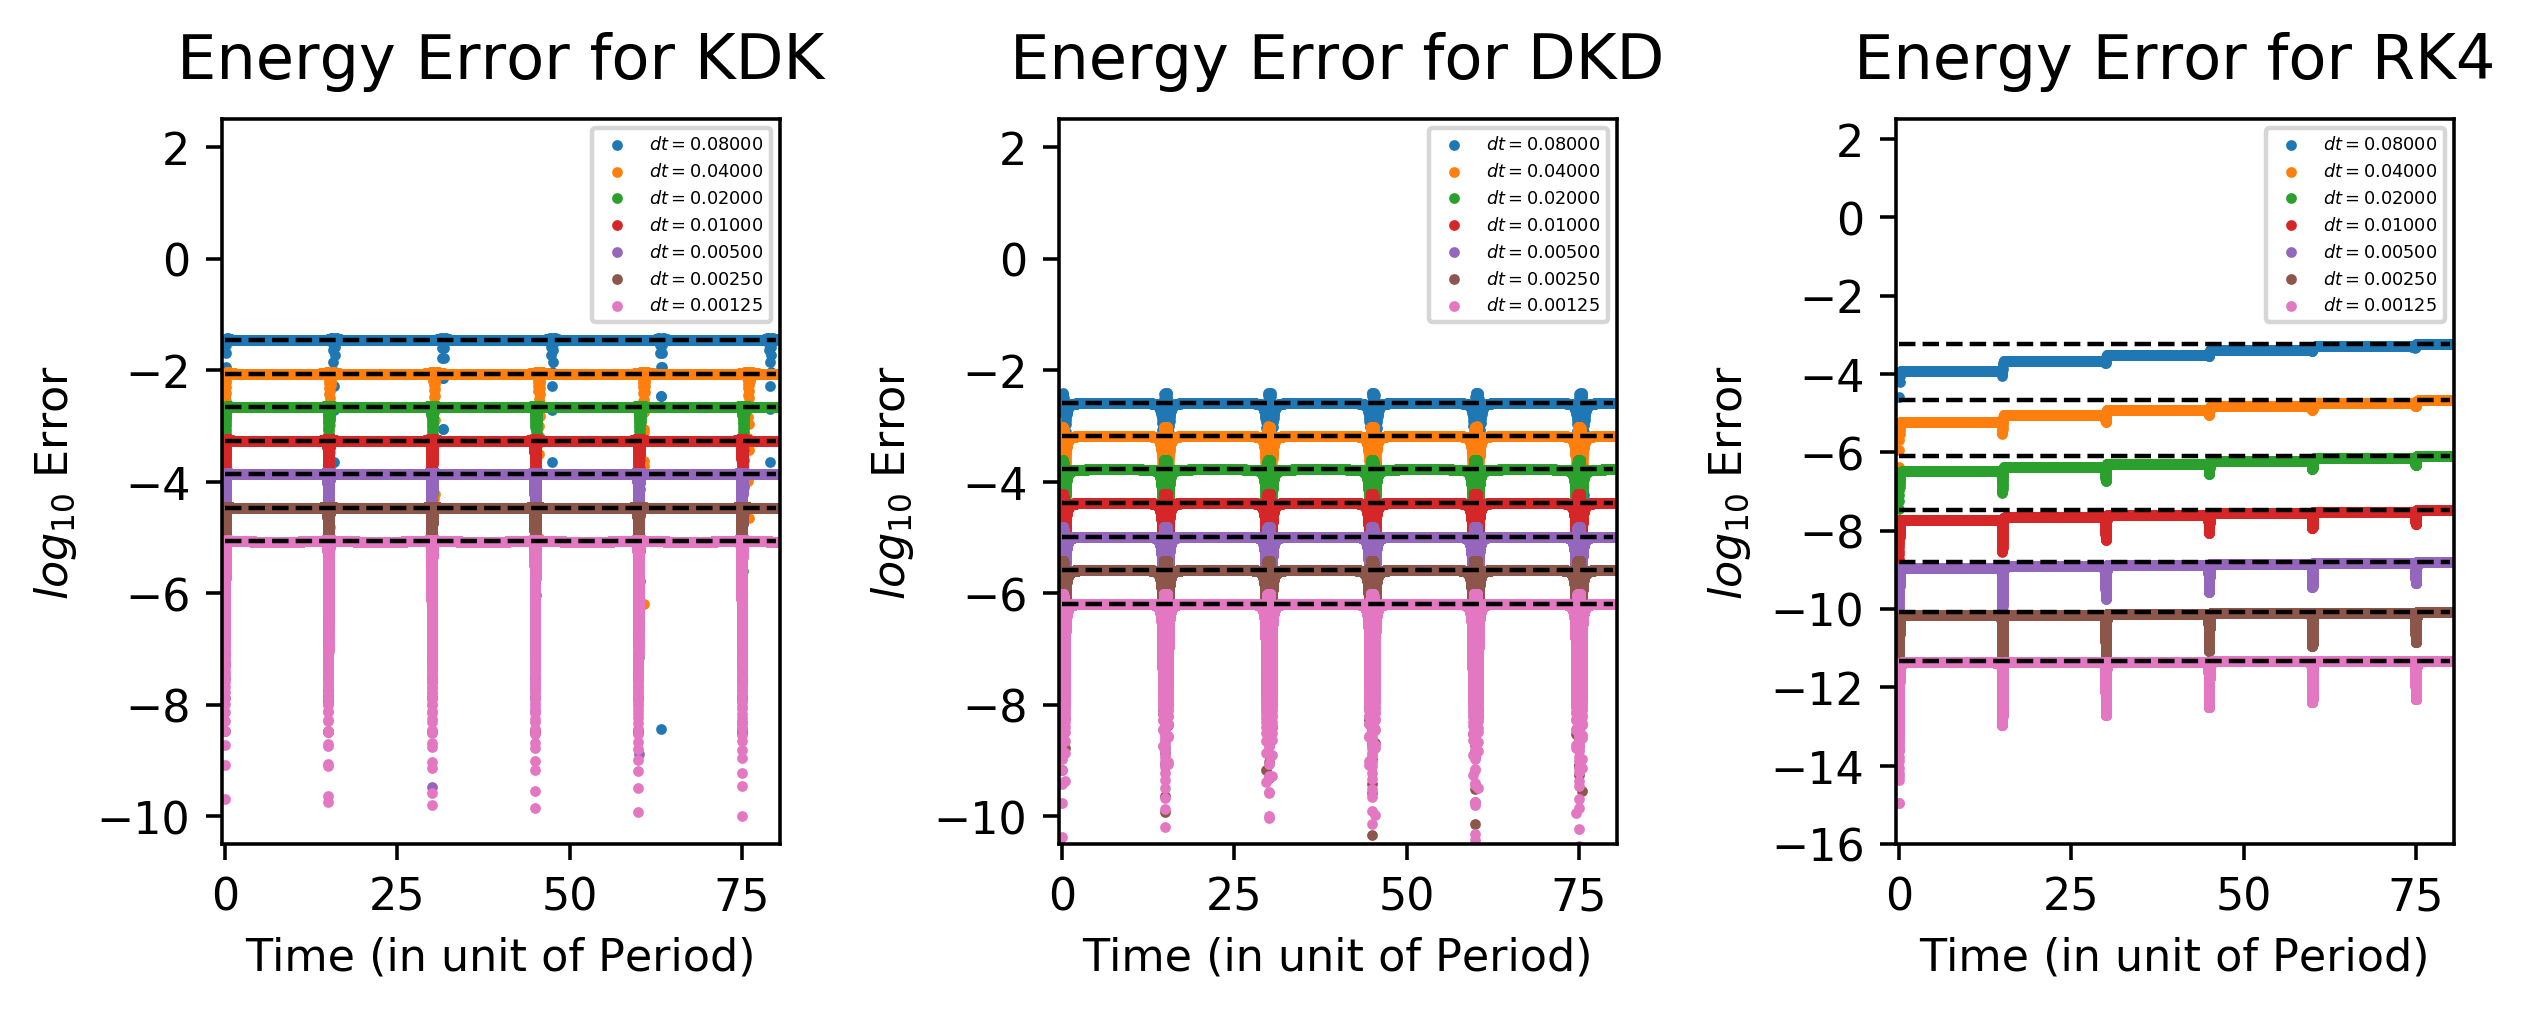

In [357]:
plt.figure(figsize=(3*3,3),dpi=320)
plt.subplots_adjust(wspace=0.5)
ax_1 = plt.subplot(131)
print("KDK Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_KDK[dt])
    t = data[:,0]
    error = data[:,1]
    criteria = abs(error)>=1e-16
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
    t = t[criteria]
    error = np.log10(abs(error[criteria]))
    ax_1.scatter(t, error, s = 2.0, label='$dt = %.5f$'%dt)
    ax_1.plot([t.min(),t.max()],[np.median(error),np.median(error)], lw = 1.0, ls="--", c='k')
ax_1.set_xlim([-0.5,80.5])
ax_1.set_ylim([-10.5,2.5])
ax_1.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_1.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_1.set_title("Energy Error for KDK", fontsize=14., y=1.02)
ax_1.legend(loc='upper right', prop={'size':4.0})

ax_2 = plt.subplot(132)
print("DKD Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_DKD[dt])
    t = data[:,0]
    error = data[:,1]
    criteria = abs(error)>=1e-16
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
    t = t[criteria]
    error = np.log10(abs(error[criteria]))
    ax_2.scatter(t, error, s = 2.0, label='$dt = %.5f$'%dt)
    ax_2.plot([t.min(),t.max()],[np.median(error),np.median(error)], lw = 1.0, ls="--", c='k')
ax_2.set_xlim([-0.5,80.5])
ax_2.set_ylim([-10.5,2.5])
ax_2.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_2.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_2.set_title("Energy Error for DKD", fontsize=14., y=1.02)
ax_2.legend(loc='upper right', prop={'size':4.0})

ax_3 = plt.subplot(133)
print("RK4 Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_RK4[dt])
    t = data[:,0]
    error = data[:,1]
    criteria = abs(error)>=1e-16
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
    t = t[criteria]
    error = np.log10(abs(error[criteria]))
    ax_3.scatter(t, error, s = 2.0, label='$dt = %.5f$'%dt)
    ax_3.plot([t.min(),t.max()],[error.max(),error.max()], lw = 1.0, ls="--", c='k')
ax_3.set_xlim([-0.5,80.5])
ax_3.set_ylim([-16.,2.5])
ax_3.set_yticks(np.linspace(-16,2,10))
ax_3.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_3.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_3.set_title("Energy Error for RK4", fontsize=14., y=1.02)
ax_3.legend(loc='upper right', prop={'size':4.0})
plt.savefig("/home/lab/Guan_Ming/Computational_Astrophysics/Homework/HW5/t-Energy-Error_Kepler_Orbit_A=0.8.png", bbox_inches='tight', dpi=320, pad_inches=0.05)
plt.show()

KDK Scheme:
	dt = 0.08000, error min:1.25562172e-03; error max:8.78810425e+00
	dt = 0.04000, error min:1.59225284e-04; error max:4.02084533e+00
	dt = 0.02000, error min:1.99759323e-05; error max:1.41754814e+00
	dt = 0.01000, error min:2.49878254e-06; error max:3.81264572e-01
	dt = 0.00500, error min:3.07905418e-07; error max:9.58086527e-02
	dt = 0.00250, error min:3.48408790e-08; error max:2.39568866e-02
	dt = 0.00125, error min:2.17206414e-09; error max:5.98912367e-03
DKD Scheme:
	dt = 0.08000, error min:6.38292305e-04; error max:1.66176820e+00
	dt = 0.04000, error min:7.99519293e-05; error max:4.69501442e-01
	dt = 0.02000, error min:9.99829623e-06; error max:1.19151665e-01
	dt = 0.01000, error min:1.25041151e-06; error max:2.98534654e-02
	dt = 0.00500, error min:1.60819119e-07; error max:7.46652019e-03
	dt = 0.00250, error min:2.37520299e-08; error max:1.86681270e-03
	dt = 0.00125, error min:5.15212523e-09; error max:4.66716036e-04
RK4 Scheme:
	dt = 0.08000, error min:4.40597303e-06;

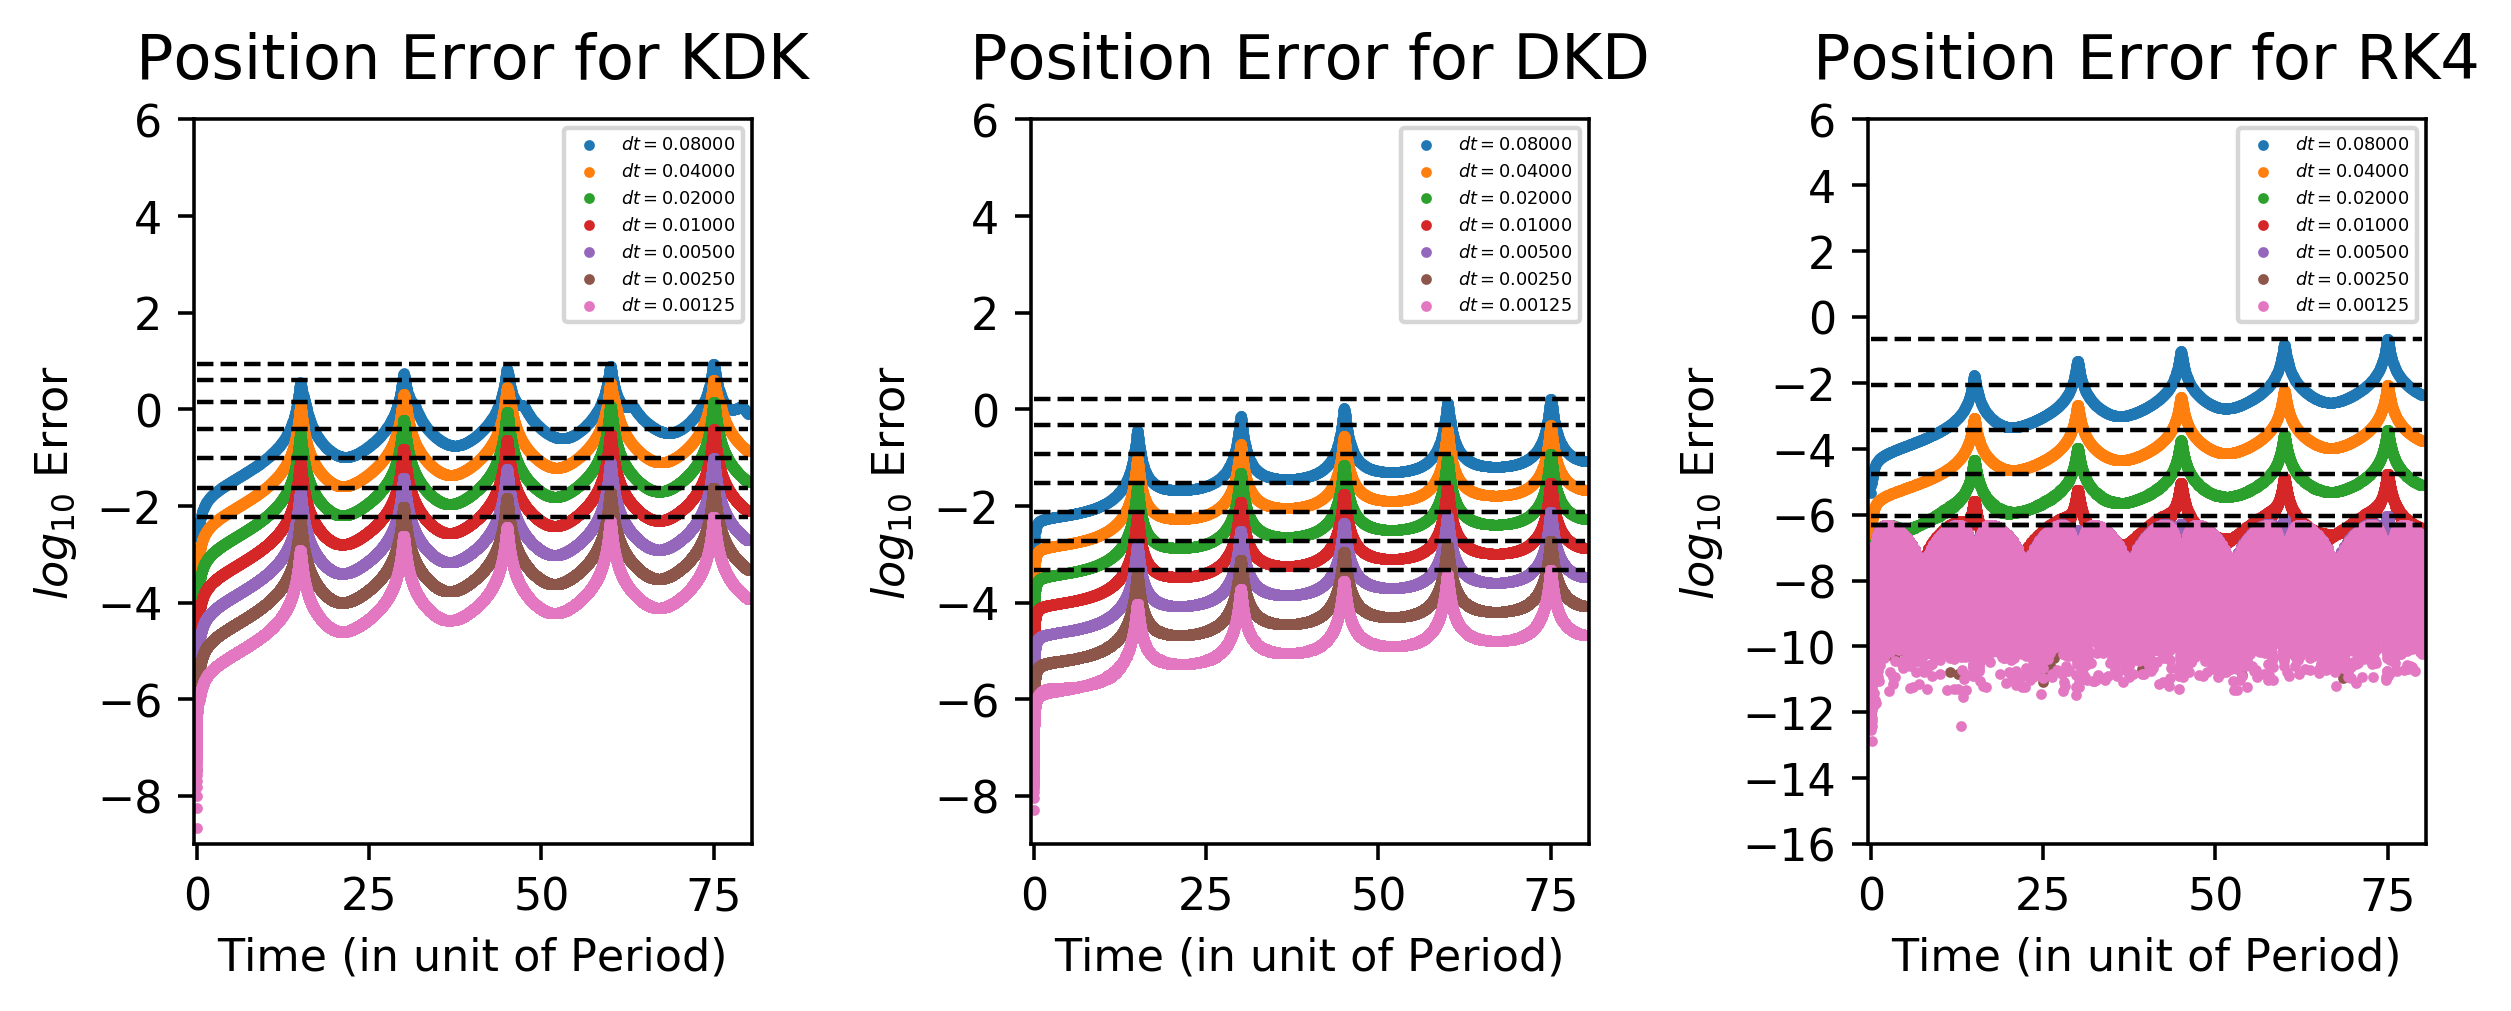

In [358]:
plt.figure(figsize=(3*3,3),dpi=320)
plt.subplots_adjust(wspace=0.5)
ax_1 = plt.subplot(131)
print("KDK Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_KDK[dt])
    t = data[:,0]
    error = data[:,2]
    criteria = abs(error)>=1e-16
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
    t = t[criteria]
    error = np.log10(abs(error[criteria]))
    ax_1.scatter(t, error, s = 2.0, label='$dt = %.5f$'%dt)
    ax_1.plot([t.min(),t.max()],[np.max(error),np.max(error)], lw = 1.0, ls="--", c='k')
ax_1.set_xlim([-0.5,80.5])
ax_1.set_ylim([-9,6.])
ax_1.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_1.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_1.set_title("Position Error for KDK", fontsize=14., y=1.02)
ax_1.legend(loc='upper right', prop={'size':4.0})

ax_2 = plt.subplot(132)
print("DKD Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_DKD[dt])
    t = data[:,0]
    error = data[:,2]
    criteria = abs(error)>=1e-16
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
    t = t[criteria]
    error = np.log10(abs(error[criteria]))
    ax_2.scatter(t, error, s = 2.0, label='$dt = %.5f$'%dt)
    ax_2.plot([t.min(),t.max()],[np.max(error),np.max(error)], lw = 1.0, ls="--", c='k')
ax_2.set_xlim([-0.5,80.5])
ax_2.set_ylim([-9,6.])
ax_2.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_2.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_2.set_title("Position Error for DKD", fontsize=14., y=1.02)
ax_2.legend(loc='upper right', prop={'size':4.0})

ax_3 = plt.subplot(133)
print("RK4 Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_RK4[dt])
    t = data[:,0]
    error = data[:,2]
    criteria = abs(error)>=1e-16
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
    t = t[criteria]
    error = np.log10(abs(error[criteria]))
    ax_3.scatter(t, error, s = 2.0, label='$dt = %.5f$'%dt)
    ax_3.plot([t.min(),t.max()],[error.max(),error.max()], lw = 1.0, ls="--", c='k')
ax_3.set_xlim([-0.5,80.5])
ax_3.set_ylim([-16.,6.])
ax_3.set_yticks(np.linspace(-16,6.,12))
ax_3.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_3.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_3.set_title("Position Error for RK4", fontsize=14., y=1.02)
ax_3.legend(loc='upper right', prop={'size':4.0})
plt.savefig("/home/lab/Guan_Ming/Computational_Astrophysics/Homework/HW5/t-Position-Error_Kepler_Orbit_A=0.8.png", bbox_inches='tight', dpi=320, pad_inches=0.05)
plt.show()

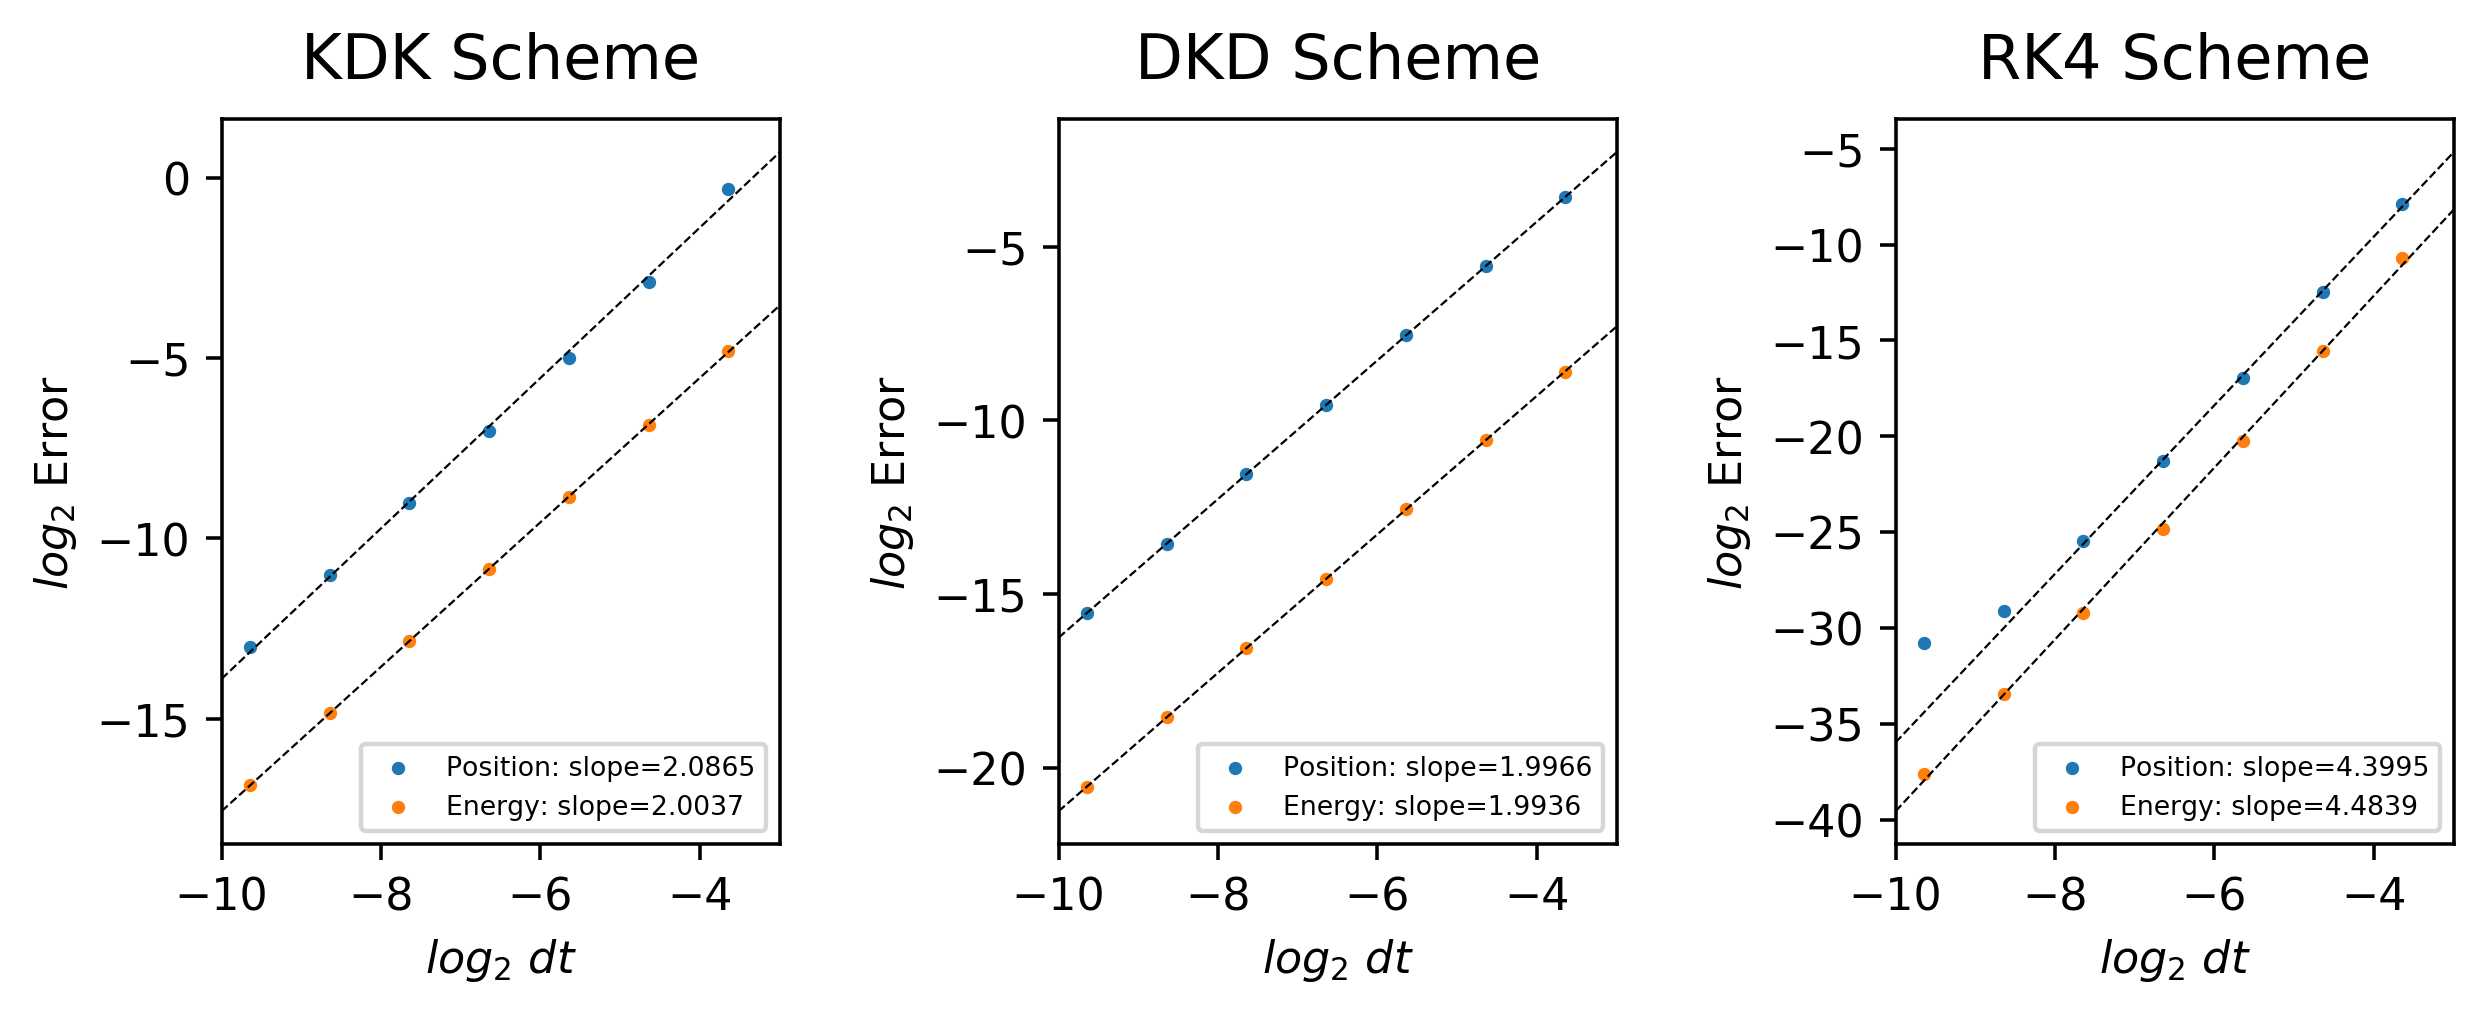

In [359]:
plt.figure(figsize=(3*3,3),dpi=320)
plt.subplots_adjust(wspace=0.5)
x = np.linspace(-10,-3,200)

path = "./Data_Saving/Kepler_Orbit/A=0.8000_end_t=80period/"
data = np.loadtxt(path+'mode=KDK_pos_error.txt')
ax_1 = plt.subplot(131)
popt, pcov = curve_fit(LINEAR_FIT, np.log2(data[:,0]), np.log2(abs(data[:,1])))
ax_1.scatter(np.log2(data[:,0]), np.log2(abs(data[:,1])),label='Position: slope=%.4f'%popt[0], s=4.0)
ax_1.plot(x, popt[0]*x+popt[1], lw=0.5, ls='--', c='k')
popt, pcov = curve_fit(LINEAR_FIT, np.log2(data[:,0]), np.log2(abs(data[:,2])))
ax_1.scatter(np.log2(data[:,0]), np.log2(abs(data[:,2])),label='Energy: slope=%.4f'%popt[0], s=4.0)
ax_1.plot(x, popt[0]*x+popt[1], lw=0.5, ls='--', c='k')
ax_1.set_xlim([-10,-3.])
# ax_1.set_ylim([-10.5,4.])
ax_1.set_xlabel('$log_{2}$ $dt$', fontsize =10.)
ax_1.set_ylabel('$log_{2}$ Error', fontsize =10.)
ax_1.set_title("KDK Scheme", fontsize=14., y=1.02)
ax_1.legend(loc='lower right', prop={'size':6.0})

data = np.loadtxt(path+'mode=DKD_pos_error.txt')
ax_2 = plt.subplot(132)
popt, pcov = curve_fit(LINEAR_FIT, np.log2(data[:,0]), np.log2(abs(data[:,1])))
ax_2.scatter(np.log2(data[:,0]), np.log2(abs(data[:,1])),label='Position: slope=%.4f'%popt[0], s=4.0)
ax_2.plot(x, popt[0]*x+popt[1], lw=0.5, ls='--', c='k')
popt, pcov = curve_fit(LINEAR_FIT, np.log2(data[:,0]), np.log2(abs(data[:,2])))
ax_2.scatter(np.log2(data[:,0]), np.log2(abs(data[:,2])),label='Energy: slope=%.4f'%popt[0], s=4.0)
ax_2.plot(x, popt[0]*x+popt[1], lw=0.5, ls='--', c='k')
ax_2.set_xlim([-10,-3.])
# ax_1.set_ylim([-10.5,4.])
ax_2.set_xlabel('$log_{2}$ $dt$', fontsize =10.)
ax_2.set_ylabel('$log_{2}$ Error', fontsize =10.)
ax_2.set_title("DKD Scheme", fontsize=14., y=1.02)
ax_2.legend(loc='lower right', prop={'size':6.0})

data = np.loadtxt(path+'mode=RK4_pos_error.txt')
ax_3 = plt.subplot(133)
popt, pcov = curve_fit(LINEAR_FIT, np.log2(data[:-2,0]), np.log2(abs(data[:-2,1])))
ax_3.scatter(np.log2(data[:,0]), np.log2(abs(data[:,1])),label='Position: slope=%.4f'%popt[0], s=4.0)
ax_3.plot(x, popt[0]*x+popt[1], lw=0.5, ls='--', c='k')
popt, pcov = curve_fit(LINEAR_FIT, np.log2(data[:,0]), np.log2(abs(data[:,2])))
ax_3.scatter(np.log2(data[:,0]), np.log2(abs(data[:,2])),label='Energy: slope=%.4f'%popt[0], s=4.0)
ax_3.plot(x, popt[0]*x+popt[1], lw=0.5, ls='--', c='k')
ax_3.set_xlim([-10,-3.])
ax_3.set_xlabel('$log_{2}$ $dt$', fontsize =10.)
ax_3.set_ylabel('$log_{2}$ Error', fontsize =10.)
ax_3.set_title("RK4 Scheme", fontsize=14., y=1.02)
ax_3.legend(loc='lower right', prop={'size':6.0})
plt.savefig("/home/lab/Guan_Ming/Computational_Astrophysics/Homework/HW5/dt-all_Errors_Kepler_Orbit_A=0.8_fit.png", bbox_inches='tight', dpi=320, pad_inches=0.05)
plt.show()

### Kepler Orbit, $A=1.0$

In [280]:
path = "./Data_Saving/Kepler_Orbit/A=1.0000_end_t=80period/"
temp = os.listdir(path)
files_KDK = []
files_DKD = []
files_RK4 = []
index_KDK = []
index_DKD = []
index_RK4 = []

for file in temp:
    if 'dt' in file:
        if 'KDK' in file and 'dt' in file:
            files_KDK.append(file)
            index_KDK.append(eval(re.sub('[^0-9,^\.]','',re.sub('.txt','',file.split('_')[-1]))))
        elif 'DKD' in file and 'dt' in file:
            files_DKD.append(file)
            index_DKD.append(eval(re.sub('[^0-9,^\.]','',re.sub('.txt','',file.split('_')[-1]))))
        elif 'RK4' in file and 'dt' in file:
            files_RK4.append(file)
            index_RK4.append(eval(re.sub('[^0-9,^\.]','',re.sub('.txt','',file.split('_')[-1]))))
file_dict_KDK = dict(zip(index_KDK,files_KDK))
file_dict_DKD = dict(zip(index_DKD,files_DKD))
file_dict_RK4 = dict(zip(index_RK4,files_RK4))
dt_range = 0.08*2**np.linspace(0,-6,7)

KDK Scheme:
	dt = 0.08000, error min:1.98400495e-03; error max:1.74520406e-02
	dt = 0.04000, error min:1.26982112e-04; error max:4.32369640e-03
	dt = 0.02000, error min:7.98402397e-06; error max:1.07851003e-03
	dt = 0.01000, error min:4.99750093e-07; error max:2.69490227e-04
	dt = 0.00500, error min:3.12460946e-08; error max:6.73630965e-05
	dt = 0.00250, error min:1.95306438e-09; error max:1.68401830e-05
	dt = 0.00125, error min:1.22069022e-10; error max:4.21001228e-06
DKD Scheme:
	dt = 0.08000, error min:-2.64994761e-03; error max:-4.33234504e-05
	dt = 0.04000, error min:-6.55945211e-04; error max:-2.67659525e-06
	dt = 0.02000, error min:-1.63990472e-04; error max:-1.66861262e-07
	dt = 0.01000, error min:-4.09672905e-05; error max:-1.04300225e-08
	dt = 0.00500, error min:-1.02400171e-05; error max:-6.53827423e-10
	dt = 0.00250, error min:-2.56003915e-06; error max:-4.13624412e-11
	dt = 0.00125, error min:-6.40002422e-07; error max:-2.72658979e-12
RK4 Scheme:
	dt = 0.08000, error min:-

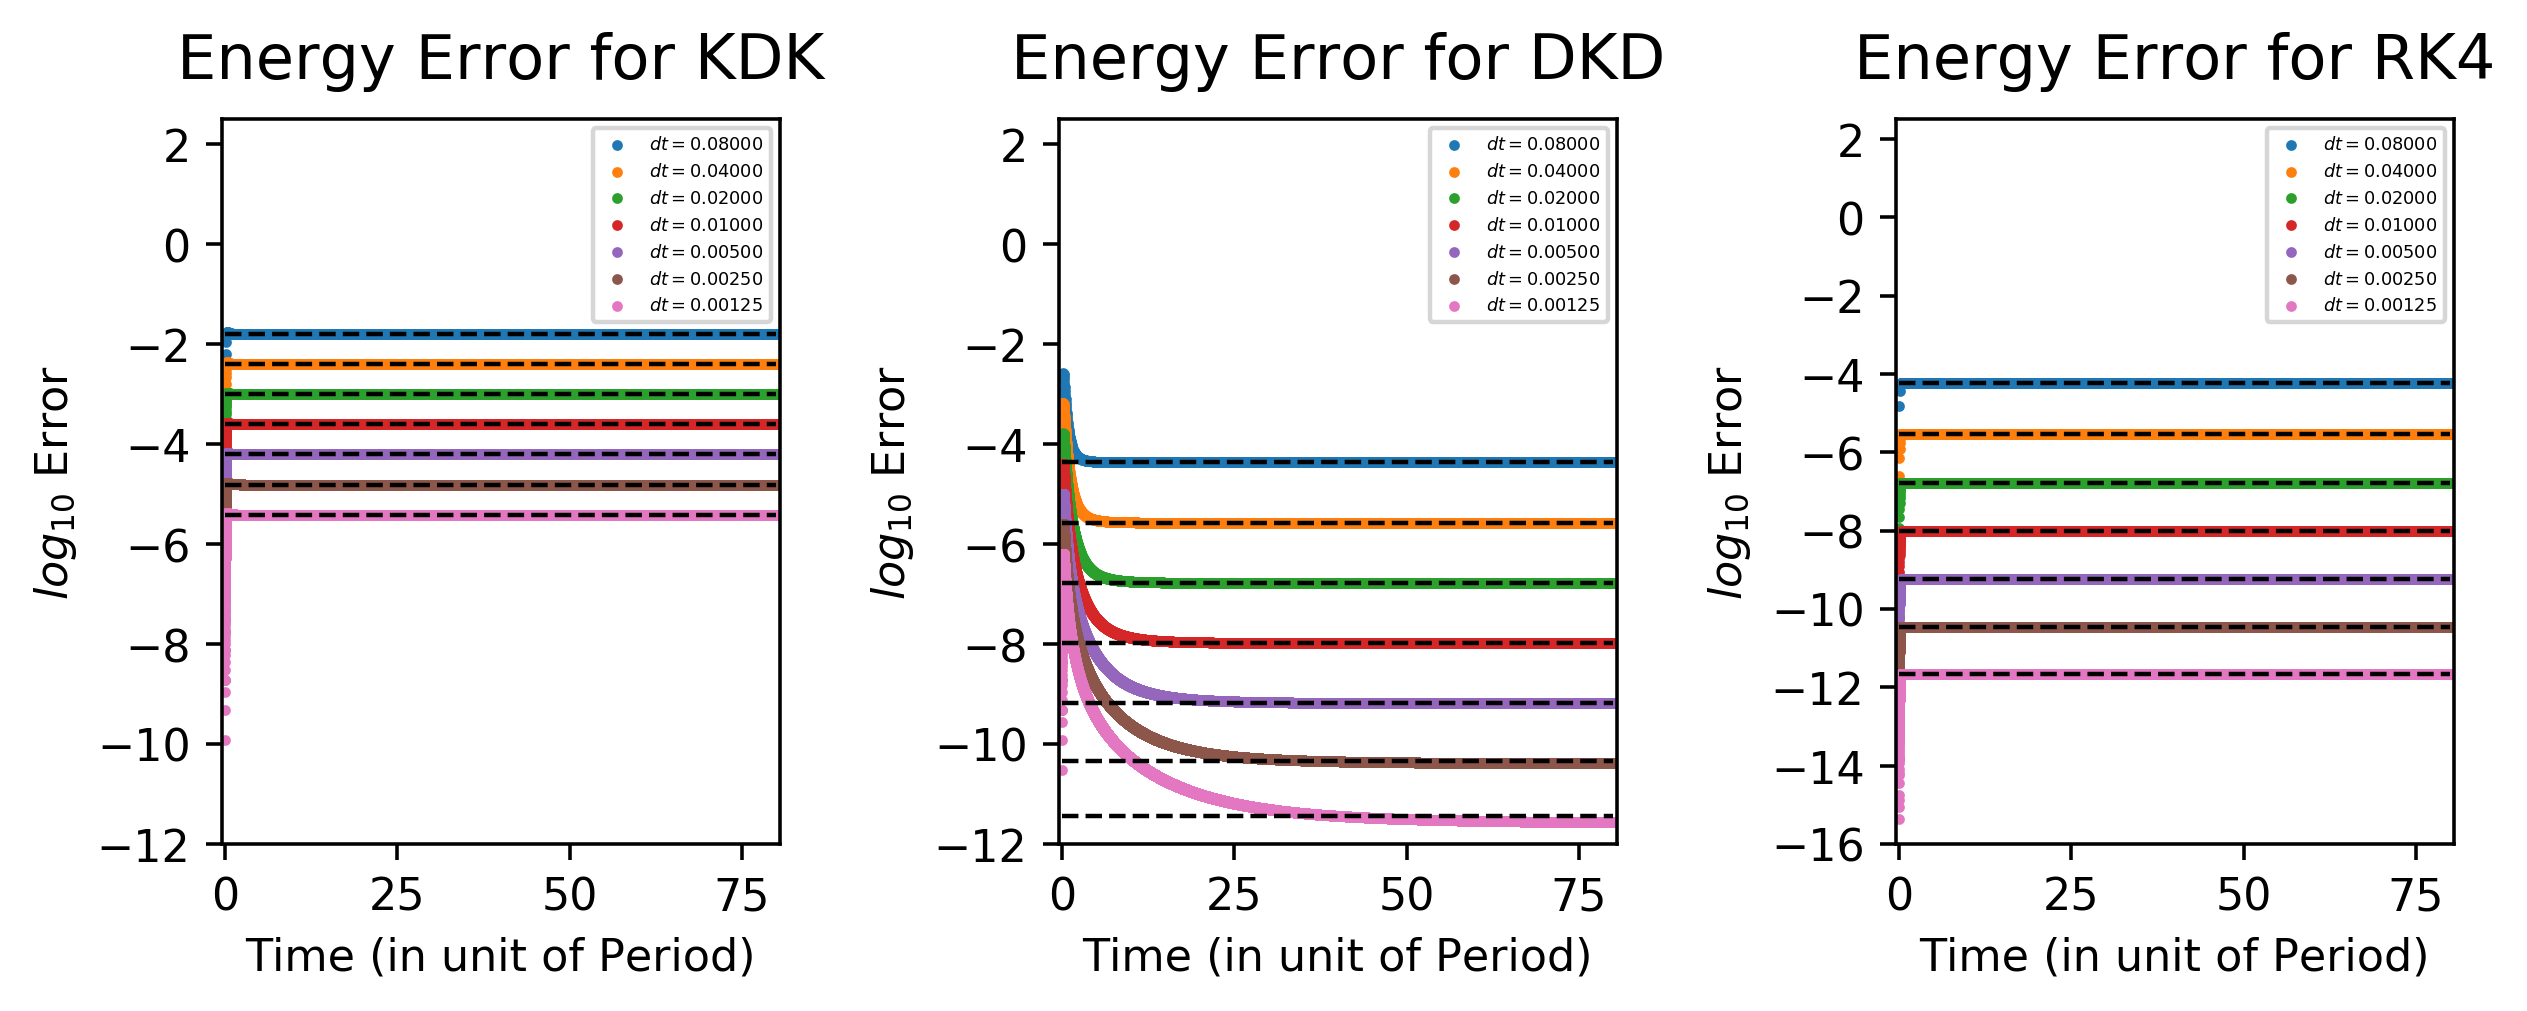

In [281]:
plt.figure(figsize=(3*3,3),dpi=320)
plt.subplots_adjust(wspace=0.5)
ax_1 = plt.subplot(131)
print("KDK Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_KDK[dt])
    t = data[:,0]
    error = data[:,1]
    criteria = abs(error)>=1e-16
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
    t = t[criteria]
    error = np.log10(abs(error[criteria]))
    ax_1.scatter(t, error, s = 2.0, label='$dt = %.5f$'%dt)
    ax_1.plot([t.min(),t.max()],[np.median(error),np.median(error)], lw = 1.0, ls="--", c='k')
ax_1.set_xlim([-0.5,80.5])
ax_1.set_ylim([-12.,2.5])
ax_1.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_1.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_1.set_title("Energy Error for KDK", fontsize=14., y=1.02)
ax_1.legend(loc='upper right', prop={'size':4.0})

ax_2 = plt.subplot(132)
print("DKD Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_DKD[dt])
    t = data[:,0]
    error = data[:,1]
    criteria = abs(error)>=1e-16
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
    t = t[criteria]
    error = np.log10(abs(error[criteria]))
    ax_2.scatter(t, error, s = 2.0, label='$dt = %.5f$'%dt)
    ax_2.plot([t.min(),t.max()],[np.median(error),np.median(error)], lw = 1.0, ls="--", c='k')
ax_2.set_xlim([-0.5,80.5])
ax_2.set_ylim([-12.,2.5])
ax_2.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_2.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_2.set_title("Energy Error for DKD", fontsize=14., y=1.02)
ax_2.legend(loc='upper right', prop={'size':4.0})

ax_3 = plt.subplot(133)
print("RK4 Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_RK4[dt])
    t = data[:,0]
    error = data[:,1]
    criteria = abs(error)>=1e-16
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
    t = t[criteria]
    error = np.log10(abs(error[criteria]))
    ax_3.scatter(t, error, s = 2.0, label='$dt = %.5f$'%dt)
    ax_3.plot([t.min(),t.max()],[error.max(),error.max()], lw = 1.0, ls="--", c='k')
ax_3.set_xlim([-0.5,80.5])
ax_3.set_ylim([-16.,2.5])
ax_3.set_yticks(np.linspace(-16,2,10))
ax_3.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_3.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_3.set_title("Energy Error for RK4", fontsize=14., y=1.02)
ax_3.legend(loc='upper right', prop={'size':4.0})
plt.savefig("/home/lab/Guan_Ming/Computational_Astrophysics/Homework/HW5/t-Energy-Error_Kepler_Orbit_A=1.png", bbox_inches='tight', dpi=320, pad_inches=0.05)
plt.show()

KDK Scheme:
	dt = 0.08000, error min:1.31776418e-03; error max:7.33704790e-02
	dt = 0.04000, error min:1.67650133e-04; error max:1.85286615e-02
	dt = 0.02000, error min:2.10502886e-05; error max:4.64361808e-03
	dt = 0.01000, error min:2.63424455e-06; error max:1.16065453e-03
	dt = 0.00500, error min:3.29373085e-07; error max:2.89165691e-04
	dt = 0.00250, error min:4.11749679e-08; error max:7.12824097e-05
	dt = 0.00125, error min:5.14291793e-09; error max:1.77740585e-05
DKD Scheme:
	dt = 0.08000, error min:6.70361192e-04; error max:3.86411522e-03
	dt = 0.04000, error min:8.41991870e-05; error max:9.76906269e-04
	dt = 0.02000, error min:1.05369557e-05; error max:2.45225910e-04
	dt = 0.01000, error min:1.31749113e-06; error max:6.15403697e-05
	dt = 0.00500, error min:1.64698060e-07; error max:1.56122341e-05
	dt = 0.00250, error min:2.05871820e-08; error max:4.34745590e-06
	dt = 0.00125, error min:2.57745257e-09; error max:2.00905766e-06
RK4 Scheme:
	dt = 0.08000, error min:5.23466242e-06;

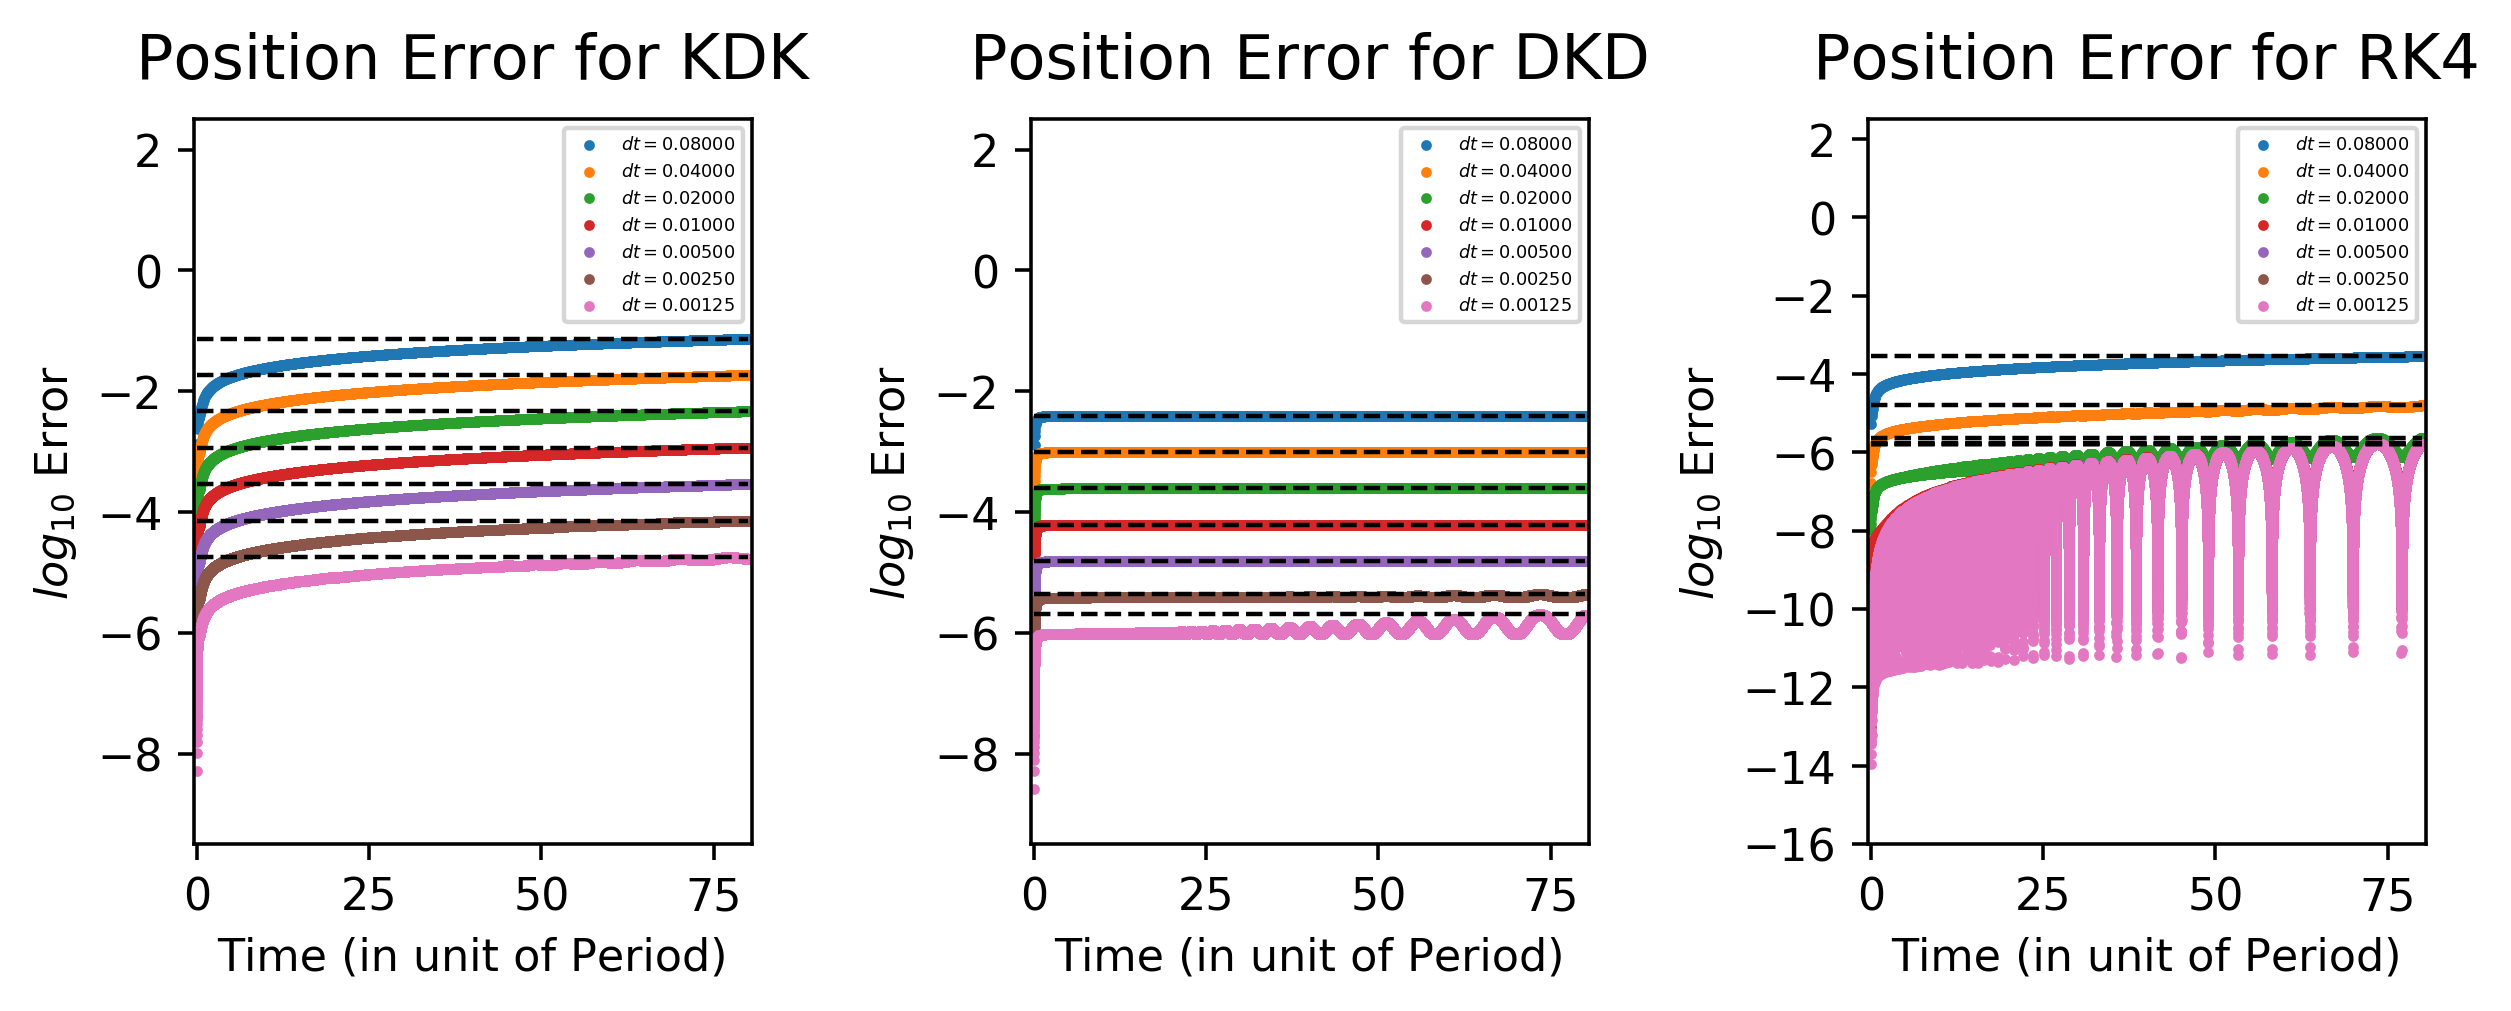

In [286]:
plt.figure(figsize=(3*3,3),dpi=320)
plt.subplots_adjust(wspace=0.5)
ax_1 = plt.subplot(131)
print("KDK Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_KDK[dt])
    t = data[:,0]
    error = data[:,2]
    criteria = abs(error)>=1e-16
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
    t = t[criteria]
    error = np.log10(abs(error[criteria]))
    ax_1.scatter(t, error, s = 2.0, label='$dt = %.5f$'%dt)
    ax_1.plot([t.min(),t.max()],[np.max(error),np.max(error)], lw = 1.0, ls="--", c='k')
ax_1.set_xlim([-0.5,80.5])
ax_1.set_ylim([-9.5,2.5])
ax_1.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_1.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_1.set_title("Position Error for KDK", fontsize=14., y=1.02)
ax_1.legend(loc='upper right', prop={'size':4.0})

ax_2 = plt.subplot(132)
print("DKD Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_DKD[dt])
    t = data[:,0]
    error = data[:,2]
    criteria = abs(error)>=1e-16
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
    t = t[criteria]
    error = np.log10(abs(error[criteria]))
    ax_2.scatter(t, error, s = 2.0, label='$dt = %.5f$'%dt)
    ax_2.plot([t.min(),t.max()],[np.max(error),np.max(error)], lw = 1.0, ls="--", c='k')
ax_2.set_xlim([-0.5,80.5])
ax_2.set_ylim([-9.5,2.5])
ax_2.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_2.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_2.set_title("Position Error for DKD", fontsize=14., y=1.02)
ax_2.legend(loc='upper right', prop={'size':4.0})

ax_3 = plt.subplot(133)
print("RK4 Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_RK4[dt])
    t = data[:,0]
    error = data[:,2]
    criteria = abs(error)>=1e-16
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
    t = t[criteria]
    error = np.log10(abs(error[criteria]))
    ax_3.scatter(t, error, s = 2.0, label='$dt = %.5f$'%dt)
    ax_3.plot([t.min(),t.max()],[error.max(),error.max()], lw = 1.0, ls="--", c='k')
ax_3.set_xlim([-0.5,80.5])
ax_3.set_yticks(np.linspace(-16,4.,11))
ax_3.set_ylim([-16.,2.5])
ax_3.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_3.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_3.set_title("Position Error for RK4", fontsize=14., y=1.02)
ax_3.legend(loc='upper right', prop={'size':4.0})
plt.savefig("/home/lab/Guan_Ming/Computational_Astrophysics/Homework/HW5/t-Position-Error_Kepler_Orbit_A=1.png", bbox_inches='tight', dpi=320, pad_inches=0.05)
plt.show()

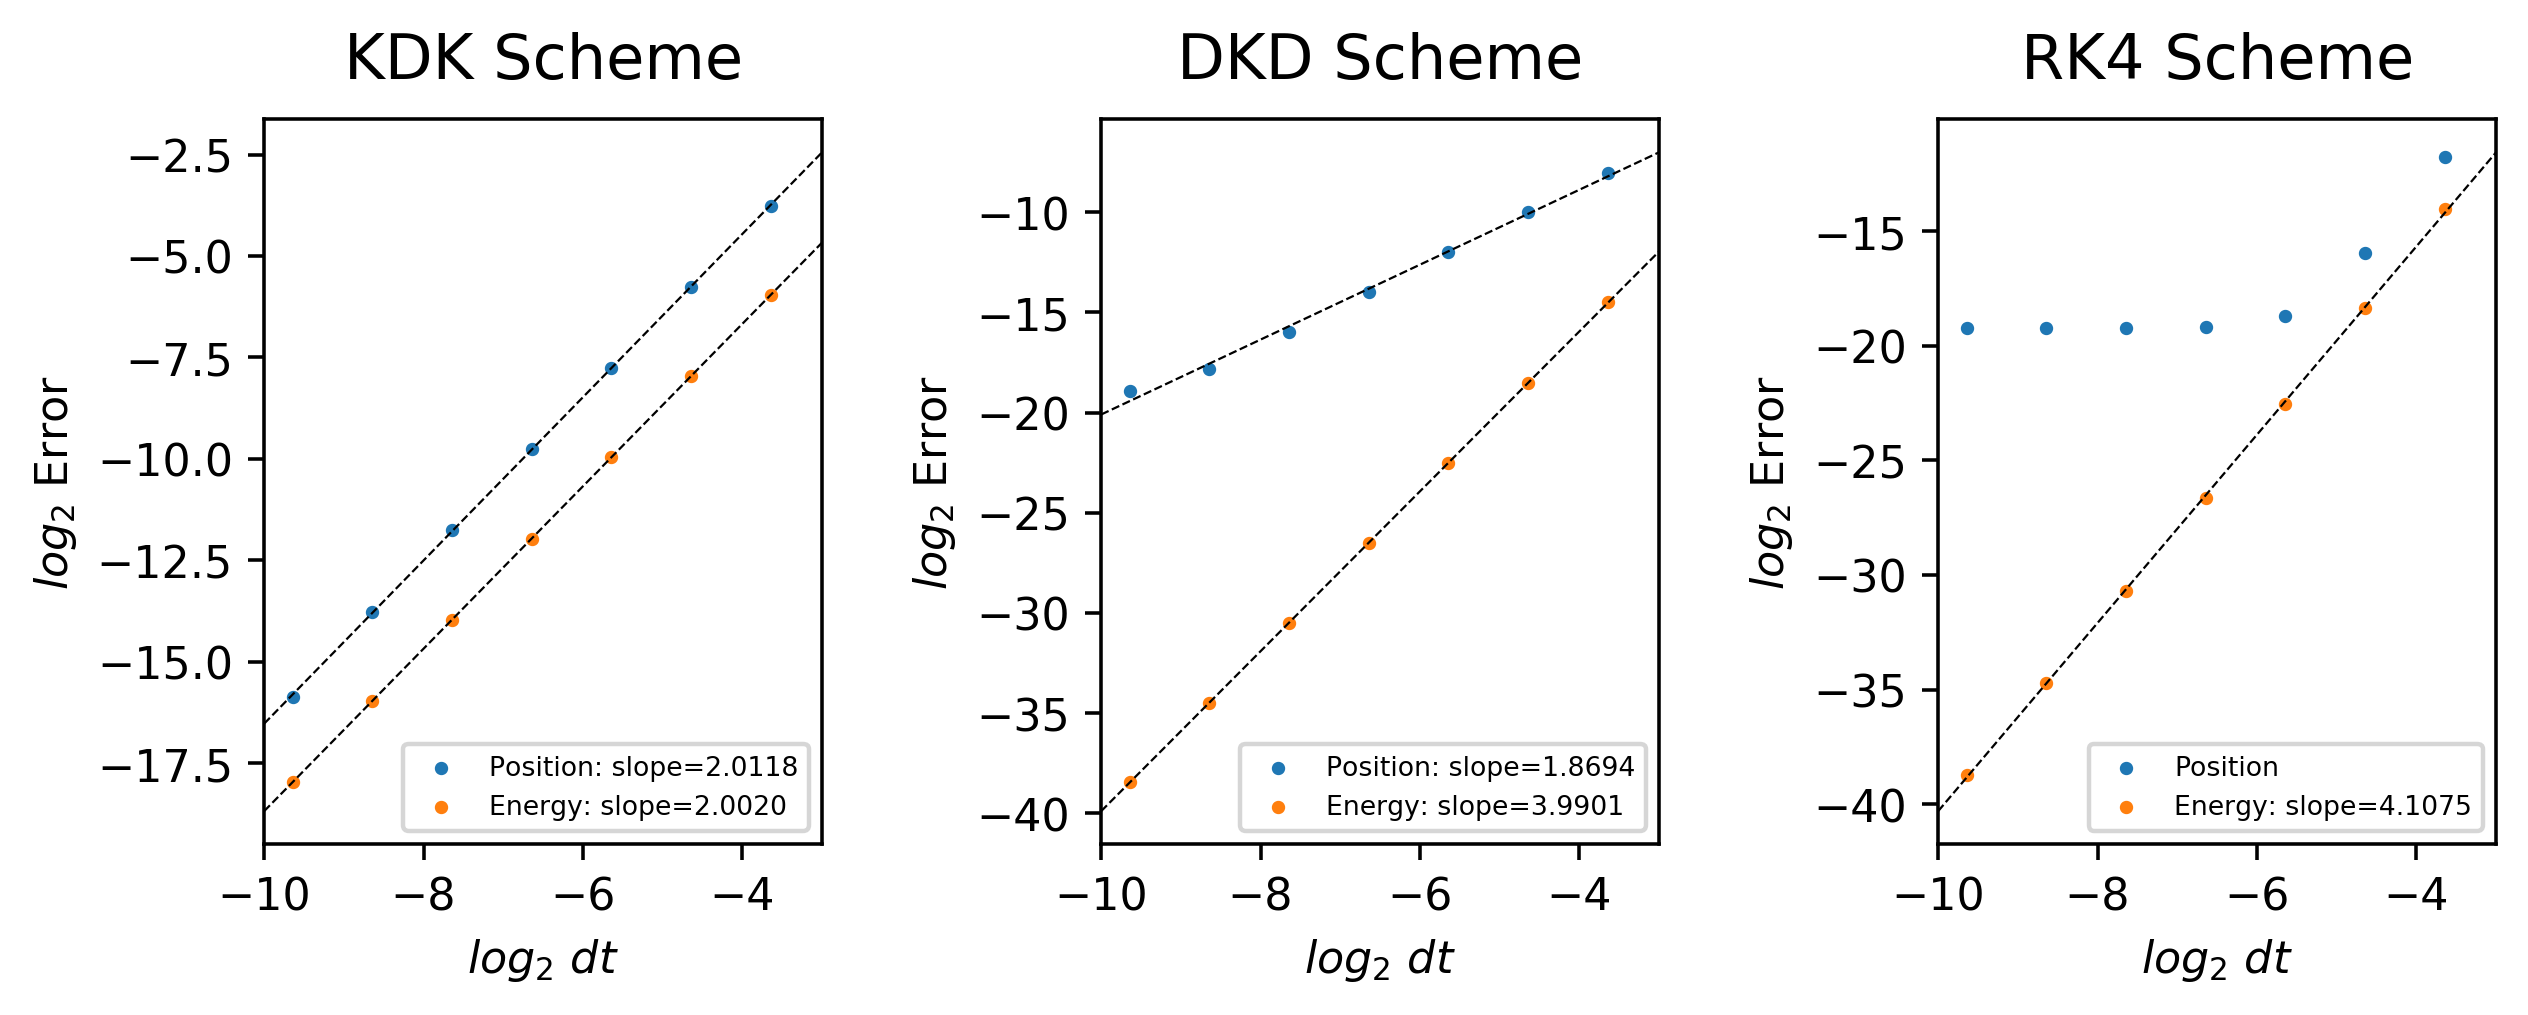

In [349]:
plt.figure(figsize=(3*3,3),dpi=320)
plt.subplots_adjust(wspace=0.5)
x = np.linspace(-10,-3,200)

path = "./Data_Saving/Kepler_Orbit/A=1.0000_end_t=80period/"
data = np.loadtxt(path+'mode=KDK_pos_error.txt')
ax_1 = plt.subplot(131)
popt, pcov = curve_fit(LINEAR_FIT, np.log2(data[:,0]), np.log2(abs(data[:,1])))
ax_1.scatter(np.log2(data[:,0]), np.log2(abs(data[:,1])),label='Position: slope=%.4f'%popt[0], s=4.0)
ax_1.plot(x, popt[0]*x+popt[1], lw=0.5, ls='--', c='k')
popt, pcov = curve_fit(LINEAR_FIT, np.log2(data[:,0]), np.log2(abs(data[:,2])))
ax_1.scatter(np.log2(data[:,0]), np.log2(abs(data[:,2])),label='Energy: slope=%.4f'%popt[0], s=4.0)
ax_1.plot(x, popt[0]*x+popt[1], lw=0.5, ls='--', c='k')
ax_1.set_xlim([-10,-3.])
# ax_1.set_ylim([-10.5,4.])
ax_1.set_xlabel('$log_{2}$ $dt$', fontsize =10.)
ax_1.set_ylabel('$log_{2}$ Error', fontsize =10.)
ax_1.set_title("KDK Scheme", fontsize=14., y=1.02)
ax_1.legend(loc='lower right', prop={'size':6.0})

data = np.loadtxt(path+'mode=DKD_pos_error.txt')
ax_2 = plt.subplot(132)
popt, pcov = curve_fit(LINEAR_FIT, np.log2(data[:,0]), np.log2(abs(data[:,1])))
ax_2.scatter(np.log2(data[:,0]), np.log2(abs(data[:,1])),label='Position: slope=%.4f'%popt[0], s=4.0)
ax_2.plot(x, popt[0]*x+popt[1], lw=0.5, ls='--', c='k')
popt, pcov = curve_fit(LINEAR_FIT, np.log2(data[:,0]), np.log2(abs(data[:,2])))
ax_2.scatter(np.log2(data[:,0]), np.log2(abs(data[:,2])),label='Energy: slope=%.4f'%popt[0], s=4.0)
ax_2.plot(x, popt[0]*x+popt[1], lw=0.5, ls='--', c='k')
ax_2.set_xlim([-10,-3.])
# ax_1.set_ylim([-10.5,4.])
ax_2.set_xlabel('$log_{2}$ $dt$', fontsize =10.)
ax_2.set_ylabel('$log_{2}$ Error', fontsize =10.)
ax_2.set_title("DKD Scheme", fontsize=14., y=1.02)
ax_2.legend(loc='lower right', prop={'size':6.0})

data = np.loadtxt(path+'mode=RK4_pos_error.txt')
ax_3 = plt.subplot(133)
ax_3.scatter(np.log2(data[:,0]), np.log2(abs(data[:,1])),label='Position', s=4.0)
popt, pcov = curve_fit(LINEAR_FIT, np.log2(data[:,0]), np.log2(abs(data[:,2])))
ax_3.scatter(np.log2(data[:,0]), np.log2(abs(data[:,2])),label='Energy: slope=%.4f'%popt[0], s=4.0)
ax_3.plot(x, popt[0]*x+popt[1], lw=0.5, ls='--', c='k')
ax_3.set_xlim([-10,-3.])
ax_3.set_xlabel('$log_{2}$ $dt$', fontsize =10.)
ax_3.set_ylabel('$log_{2}$ Error', fontsize =10.)
ax_3.set_title("RK4 Scheme", fontsize=14., y=1.02)
ax_3.legend(loc='lower right', prop={'size':6.0})
plt.savefig("/home/lab/Guan_Ming/Computational_Astrophysics/Homework/HW5/dt-all_Errors_Kepler_Orbit_A=1_fit.png", bbox_inches='tight', dpi=320, pad_inches=0.05)
plt.show()

### Kepler Orbit, $A>1.0$

In [361]:
path = "./Data_Saving/Kepler_Orbit/A=1.2000_end_t=40period/"
temp = os.listdir(path)
files_KDK = []
files_DKD = []
files_RK4 = []
index_KDK = []
index_DKD = []
index_RK4 = []

for file in temp:
    if 'dt' in file:
        if 'KDK' in file and 'dt' in file:
            files_KDK.append(file)
            index_KDK.append(eval(re.sub('[^0-9,^\.]','',re.sub('.txt','',file.split('_')[-1]))))
        elif 'DKD' in file and 'dt' in file:
            files_DKD.append(file)
            index_DKD.append(eval(re.sub('[^0-9,^\.]','',re.sub('.txt','',file.split('_')[-1]))))
        elif 'RK4' in file and 'dt' in file:
            files_RK4.append(file)
            index_RK4.append(eval(re.sub('[^0-9,^\.]','',re.sub('.txt','',file.split('_')[-1]))))
file_dict_KDK = dict(zip(index_KDK,files_KDK))
file_dict_DKD = dict(zip(index_DKD,files_DKD))
file_dict_RK4 = dict(zip(index_RK4,files_RK4))
dt_range = 0.08*2**np.linspace(0,-6,7)

KDK Scheme:
	dt = 0.08000, error min:6.76234024e-03; error max:5.01446770e-02
	dt = 0.04000, error min:4.36734839e-04; error max:1.24158903e-02
	dt = 0.02000, error min:2.75234715e-05; error max:3.09660889e-03
	dt = 0.01000, error min:1.72380224e-06; error max:7.73694274e-04
	dt = 0.00500, error min:1.07793777e-07; error max:1.93394982e-04
	dt = 0.00250, error min:6.73798906e-09; error max:4.83470111e-05
	dt = 0.00125, error min:4.21136459e-10; error max:1.20866515e-05
DKD Scheme:
	dt = 0.08000, error min:-9.50977028e-03; error max:-1.86367173e-03
	dt = 0.04000, error min:-2.35231155e-03; error max:-1.22648685e-04
	dt = 0.02000, error min:-5.88408432e-04; error max:-7.76609715e-06
	dt = 0.01000, error min:-1.47003670e-04; error max:-4.86969129e-07
	dt = 0.00500, error min:-3.67447717e-05; error max:-3.04604508e-08
	dt = 0.00250, error min:-9.18580891e-06; error max:-1.90416460e-09
	dt = 0.00125, error min:-2.29642824e-06; error max:-1.19015908e-10
RK4 Scheme:
	dt = 0.08000, error min:-

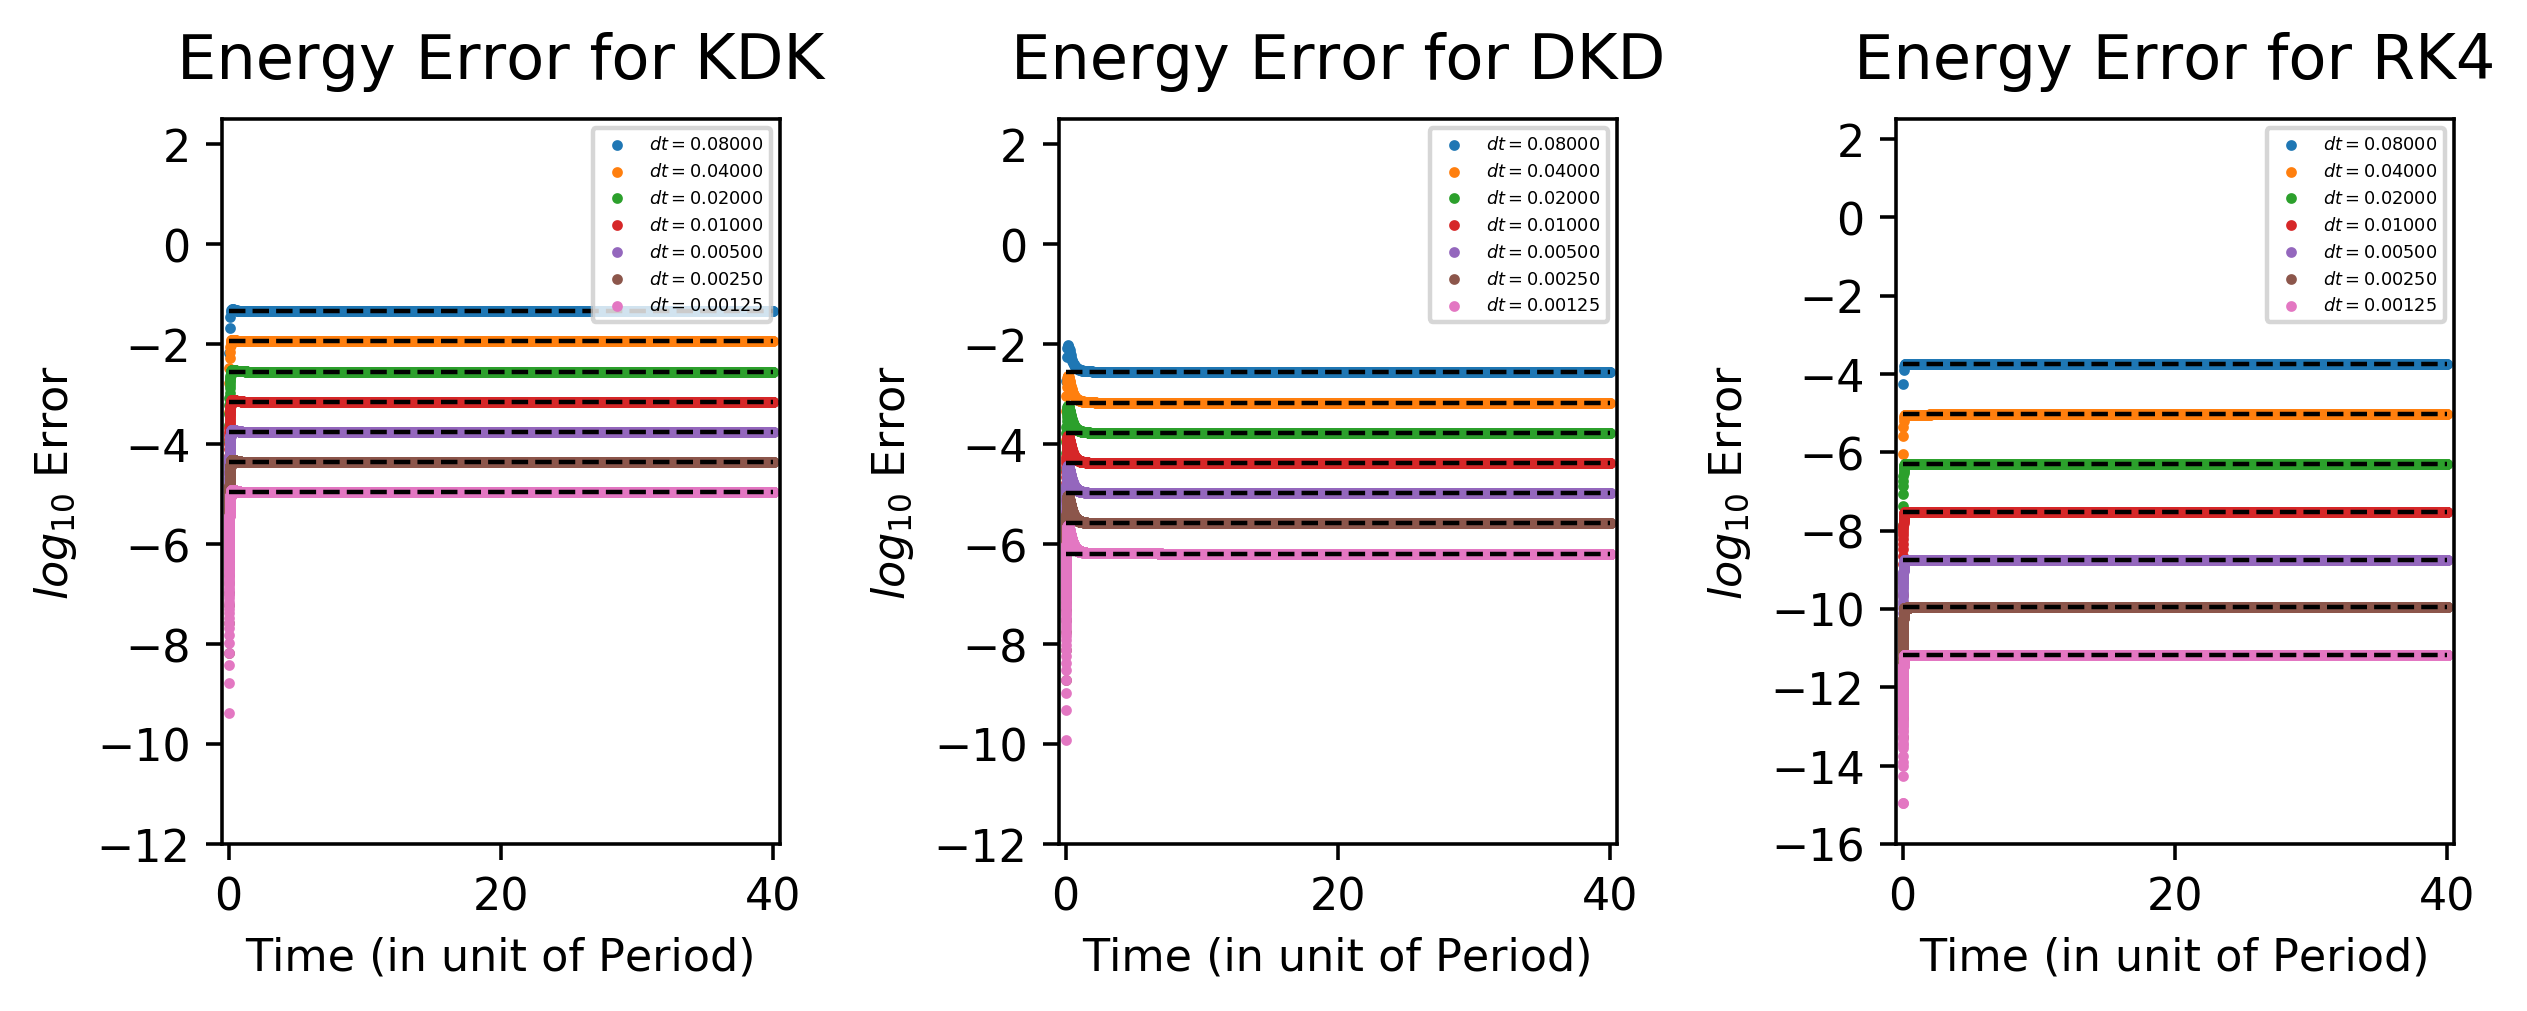

In [362]:
plt.figure(figsize=(3*3,3),dpi=320)
plt.subplots_adjust(wspace=0.5)
ax_1 = plt.subplot(131)
print("KDK Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_KDK[dt])
    t = data[:,0]
    error = data[:,1]
    criteria = abs(error)>=1e-16
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
    t = t[criteria]
    error = np.log10(abs(error[criteria]))
    ax_1.scatter(t, error, s = 2.0, label='$dt = %.5f$'%dt)
    ax_1.plot([t.min(),t.max()],[np.median(error),np.median(error)], lw = 1.0, ls="--", c='k')
ax_1.set_xlim([-0.5,40.5])
ax_1.set_ylim([-12.,2.5])
ax_1.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_1.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_1.set_title("Energy Error for KDK", fontsize=14., y=1.02)
ax_1.legend(loc='upper right', prop={'size':4.0})

ax_2 = plt.subplot(132)
print("DKD Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_DKD[dt])
    t = data[:,0]
    error = data[:,1]
    criteria = abs(error)>=1e-16
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
    t = t[criteria]
    error = np.log10(abs(error[criteria]))
    ax_2.scatter(t, error, s = 2.0, label='$dt = %.5f$'%dt)
    ax_2.plot([t.min(),t.max()],[np.median(error),np.median(error)], lw = 1.0, ls="--", c='k')
ax_2.set_xlim([-0.5,40.5])
ax_2.set_ylim([-12.,2.5])
ax_2.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_2.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_2.set_title("Energy Error for DKD", fontsize=14., y=1.02)
ax_2.legend(loc='upper right', prop={'size':4.0})

ax_3 = plt.subplot(133)
print("RK4 Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_RK4[dt])
    t = data[:,0]
    error = data[:,1]
    criteria = abs(error)>=1e-16
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
    t = t[criteria]
    error = np.log10(abs(error[criteria]))
    ax_3.scatter(t, error, s = 2.0, label='$dt = %.5f$'%dt)
    ax_3.plot([t.min(),t.max()],[error.max(),error.max()], lw = 1.0, ls="--", c='k')
ax_3.set_xlim([-0.5,40.5])
ax_3.set_ylim([-16.,2.5])
ax_3.set_yticks(np.linspace(-16,2,10))
ax_3.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_3.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_3.set_title("Energy Error for RK4", fontsize=14., y=1.02)
ax_3.legend(loc='upper right', prop={'size':4.0})
plt.savefig("/home/lab/Guan_Ming/Computational_Astrophysics/Homework/HW5/t-Energy-Error_Kepler_Orbit_A=1.2.png", bbox_inches='tight', dpi=320, pad_inches=0.05)
plt.show()

KDK Scheme:
	dt = 0.08000, error min:1.37614219e-03; error max:2.01756920e-02
	dt = 0.04000, error min:1.75638681e-04; error max:5.03130618e-03
	dt = 0.02000, error min:2.20716090e-05; error max:1.27363477e-03
	dt = 0.01000, error min:2.76262857e-06; error max:4.28156906e-04
	dt = 0.00500, error min:3.45445038e-07; error max:5.53901547e-04
	dt = 0.00250, error min:4.31869238e-08; error max:5.94877861e-04
	dt = 0.00125, error min:5.39688861e-09; error max:6.05524897e-04
DKD Scheme:
	dt = 0.08000, error min:7.00628969e-04; error max:3.08038825e-03
	dt = 0.04000, error min:8.82305259e-05; error max:1.08486834e-03
	dt = 0.02000, error min:1.10487700e-05; error max:6.91843456e-04
	dt = 0.01000, error min:1.38171729e-06; error max:6.26120310e-04
	dt = 0.00500, error min:1.72732724e-07; error max:6.13103531e-04
	dt = 0.00250, error min:2.15895022e-08; error max:6.10089266e-04
	dt = 0.00125, error min:2.70029606e-09; error max:6.09351105e-04
RK4 Scheme:
	dt = 0.08000, error min:6.10130589e-06;

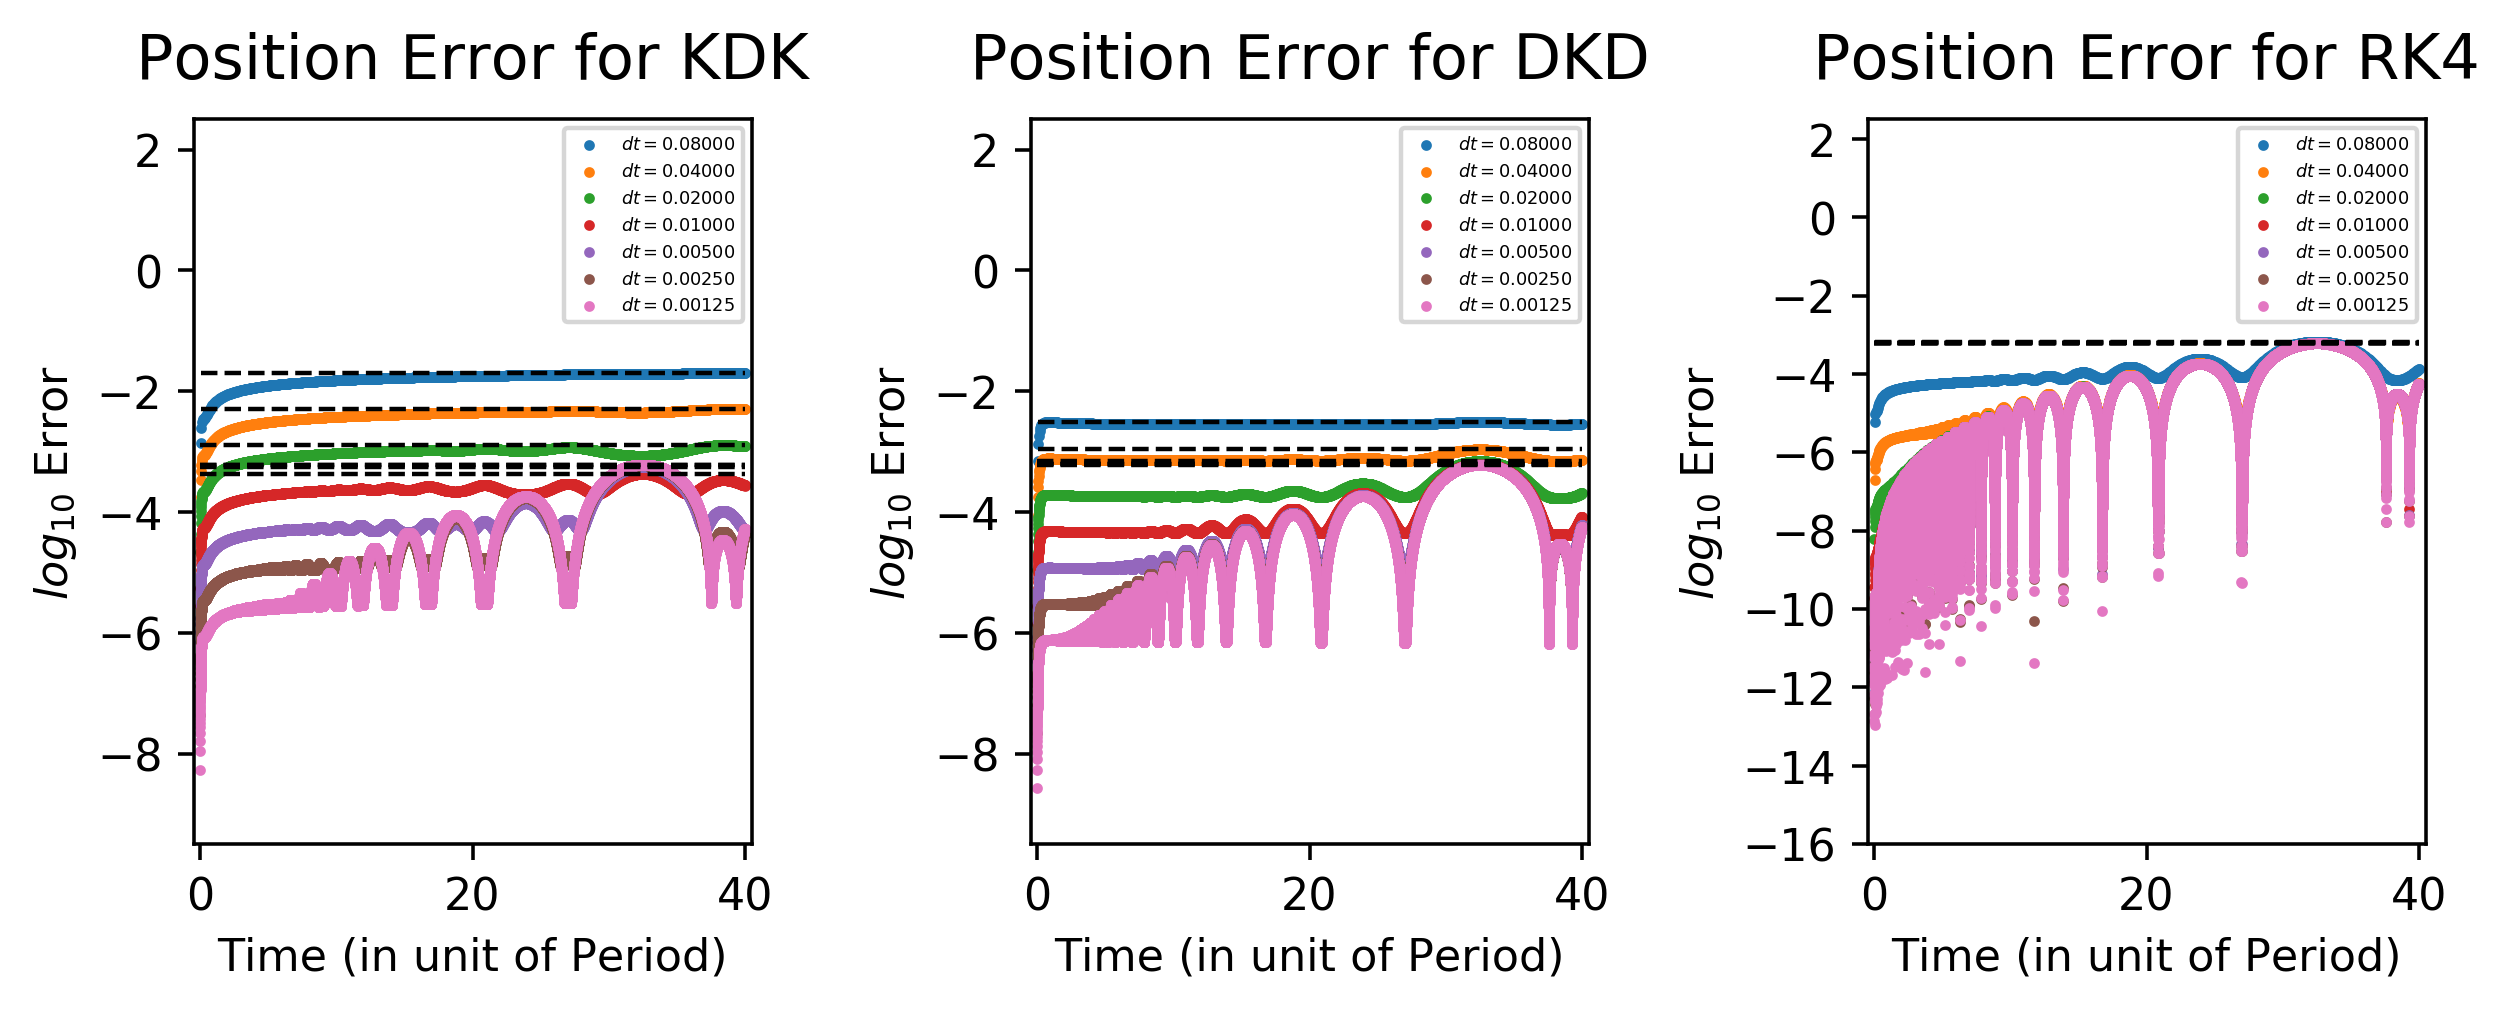

In [363]:
plt.figure(figsize=(3*3,3),dpi=320)
plt.subplots_adjust(wspace=0.5)
ax_1 = plt.subplot(131)
print("KDK Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_KDK[dt])
    t = data[:,0]
    error = data[:,2]
    criteria = abs(error)>=1e-16
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
    t = t[criteria]
    error = np.log10(abs(error[criteria]))
    ax_1.scatter(t, error, s = 2.0, label='$dt = %.5f$'%dt)
    ax_1.plot([t.min(),t.max()],[np.max(error),np.max(error)], lw = 1.0, ls="--", c='k')
ax_1.set_xlim([-0.5,40.5])
ax_1.set_ylim([-9.5,2.5])
ax_1.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_1.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_1.set_title("Position Error for KDK", fontsize=14., y=1.02)
ax_1.legend(loc='upper right', prop={'size':4.0})

ax_2 = plt.subplot(132)
print("DKD Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_DKD[dt])
    t = data[:,0]
    error = data[:,2]
    criteria = abs(error)>=1e-16
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
    t = t[criteria]
    error = np.log10(abs(error[criteria]))
    ax_2.scatter(t, error, s = 2.0, label='$dt = %.5f$'%dt)
    ax_2.plot([t.min(),t.max()],[np.max(error),np.max(error)], lw = 1.0, ls="--", c='k')
ax_2.set_xlim([-0.5,40.5])
ax_2.set_ylim([-9.5,2.5])
ax_2.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_2.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_2.set_title("Position Error for DKD", fontsize=14., y=1.02)
ax_2.legend(loc='upper right', prop={'size':4.0})

ax_3 = plt.subplot(133)
print("RK4 Scheme:")
for dt in dt_range:
    data = np.loadtxt(path+file_dict_RK4[dt])
    t = data[:,0]
    error = data[:,2]
    criteria = abs(error)>=1e-16
    print("\tdt = %.5f, error min:%.8e; error max:%.8e"%(dt,error[criteria].min(),error[criteria].max()))
    t = t[criteria]
    error = np.log10(abs(error[criteria]))
    ax_3.scatter(t, error, s = 2.0, label='$dt = %.5f$'%dt)
    ax_3.plot([t.min(),t.max()],[error.max(),error.max()], lw = 1.0, ls="--", c='k')
ax_3.set_xlim([-0.5,40.5])
ax_3.set_yticks(np.linspace(-16,4.,11))
ax_3.set_ylim([-16.,2.5])
ax_3.set_xlabel('Time (in unit of Period)', fontsize =10.)
ax_3.set_ylabel('$log_{10}$ Error', fontsize =10.)
ax_3.set_title("Position Error for RK4", fontsize=14., y=1.02)
ax_3.legend(loc='upper right', prop={'size':4.0})
plt.savefig("/home/lab/Guan_Ming/Computational_Astrophysics/Homework/HW5/t-Position-Error_Kepler_Orbit_A=1.2.png", bbox_inches='tight', dpi=320, pad_inches=0.05)
plt.show()

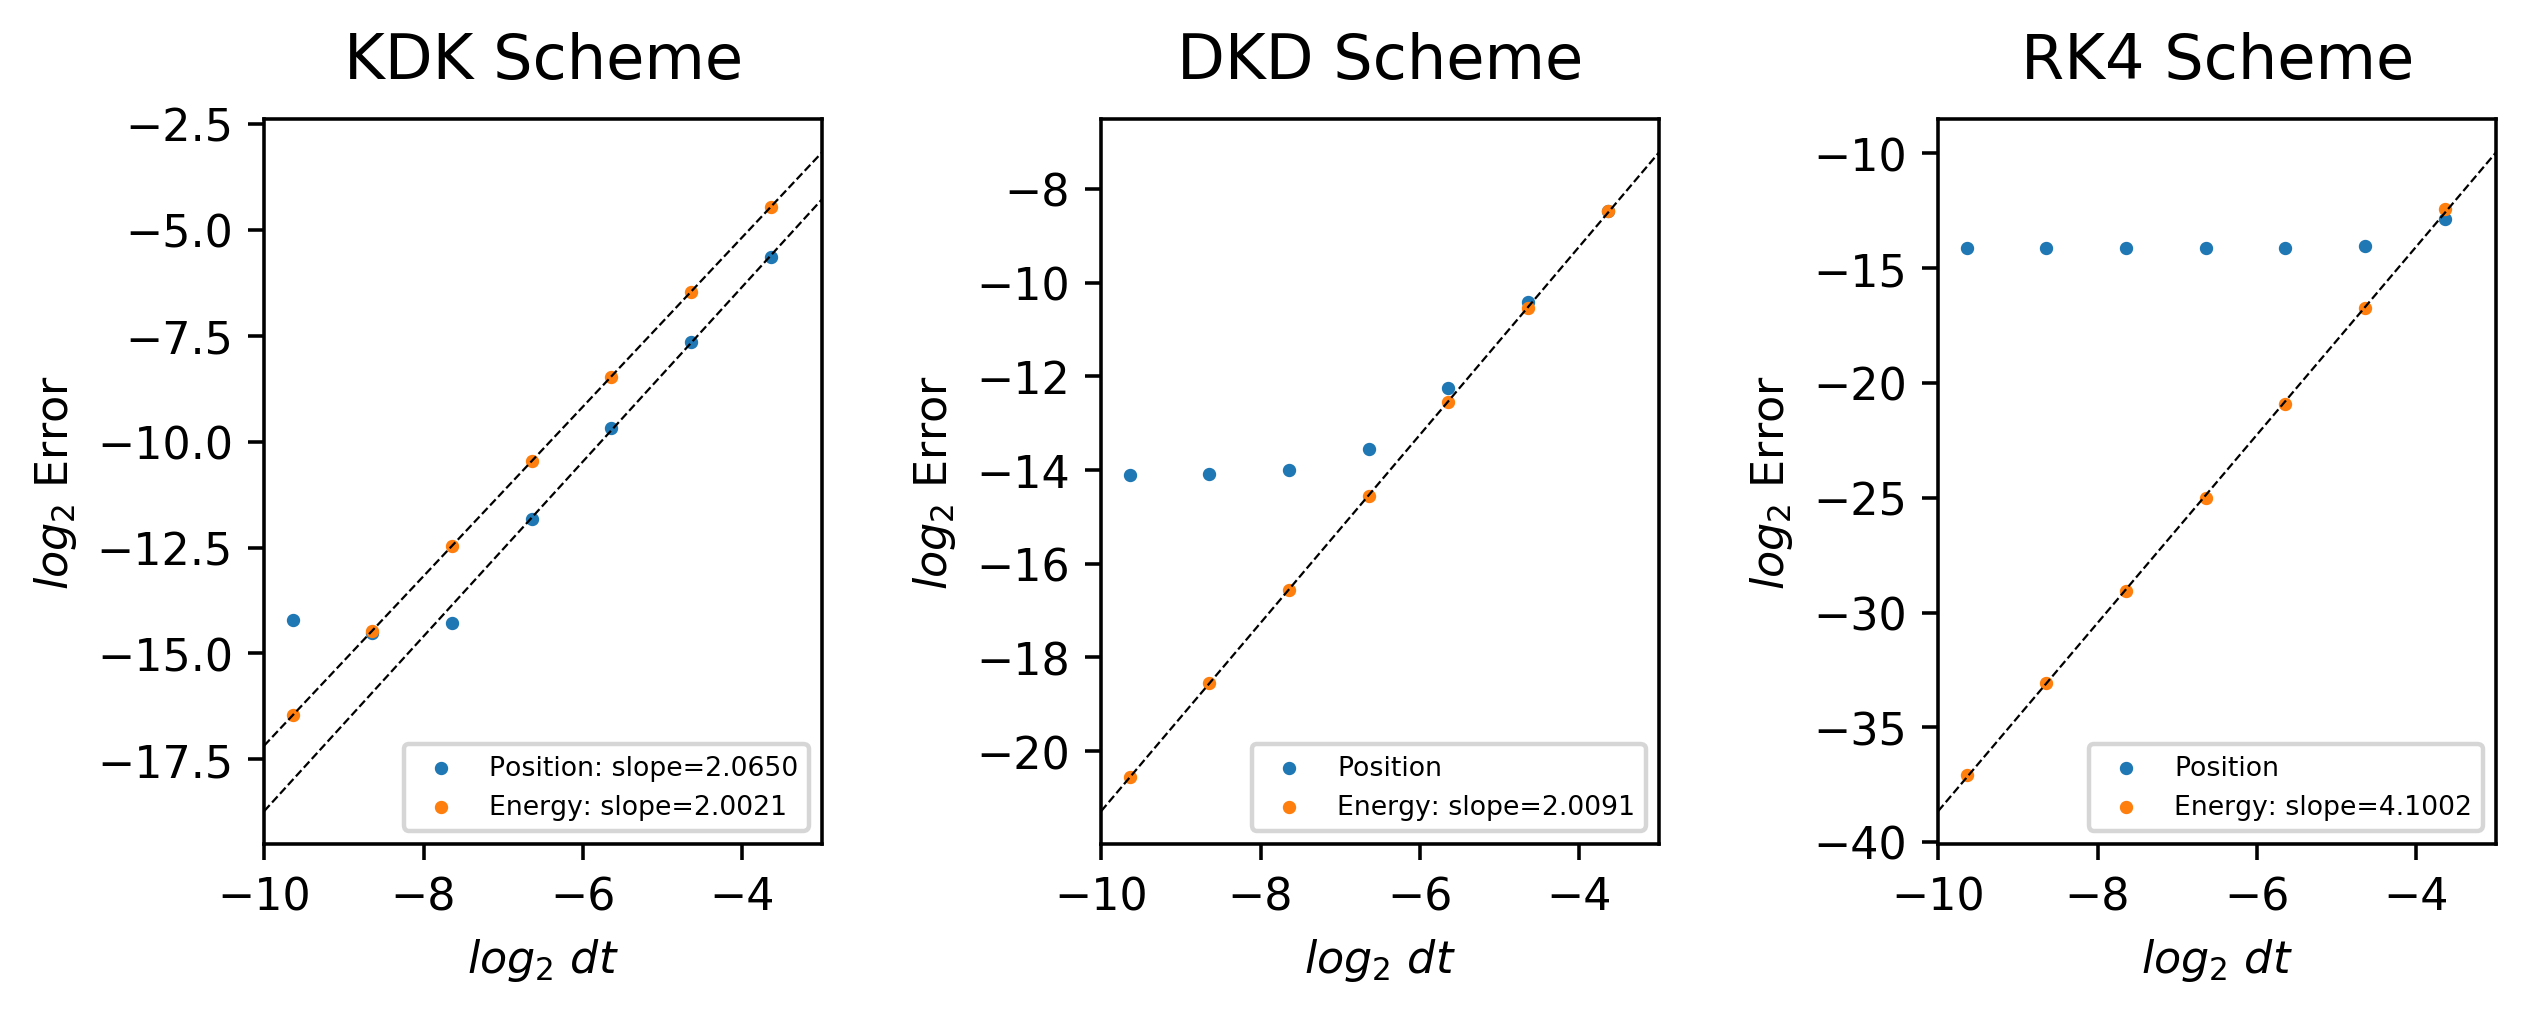

In [364]:
plt.figure(figsize=(3*3,3),dpi=320)
plt.subplots_adjust(wspace=0.5)
x = np.linspace(-10,-3,200)

path = "./Data_Saving/Kepler_Orbit/A=1.2000_end_t=40period/"
data = np.loadtxt(path+'mode=KDK_pos_error.txt')
ax_1 = plt.subplot(131)
popt, pcov = curve_fit(LINEAR_FIT, np.log2(data[:-3,0]), np.log2(abs(data[:-3,1])))
ax_1.scatter(np.log2(data[:,0]), np.log2(abs(data[:,1])),label='Position: slope=%.4f'%popt[0], s=4.0)
ax_1.plot(x, popt[0]*x+popt[1], lw=0.5, ls='--', c='k')
popt, pcov = curve_fit(LINEAR_FIT, np.log2(data[:,0]), np.log2(abs(data[:,2])))
ax_1.scatter(np.log2(data[:,0]), np.log2(abs(data[:,2])),label='Energy: slope=%.4f'%popt[0], s=4.0)
ax_1.plot(x, popt[0]*x+popt[1], lw=0.5, ls='--', c='k')
ax_1.set_xlim([-10,-3.])
# ax_1.set_ylim([-10.5,4.])
ax_1.set_xlabel('$log_{2}$ $dt$', fontsize =10.)
ax_1.set_ylabel('$log_{2}$ Error', fontsize =10.)
ax_1.set_title("KDK Scheme", fontsize=14., y=1.02)
ax_1.legend(loc='lower right', prop={'size':6.0})

data = np.loadtxt(path+'mode=DKD_pos_error.txt')
ax_2 = plt.subplot(132)
ax_2.scatter(np.log2(data[:,0]), np.log2(abs(data[:,1])),label='Position', s=4.0)
popt, pcov = curve_fit(LINEAR_FIT, np.log2(data[:,0]), np.log2(abs(data[:,2])))
ax_2.scatter(np.log2(data[:,0]), np.log2(abs(data[:,2])),label='Energy: slope=%.4f'%popt[0], s=4.0)
ax_2.plot(x, popt[0]*x+popt[1], lw=0.5, ls='--', c='k')
ax_2.set_xlim([-10,-3.])
# ax_1.set_ylim([-10.5,4.])
ax_2.set_xlabel('$log_{2}$ $dt$', fontsize =10.)
ax_2.set_ylabel('$log_{2}$ Error', fontsize =10.)
ax_2.set_title("DKD Scheme", fontsize=14., y=1.02)
ax_2.legend(loc='lower right', prop={'size':6.0})

data = np.loadtxt(path+'mode=RK4_pos_error.txt')
ax_3 = plt.subplot(133)
ax_3.scatter(np.log2(data[:,0]), np.log2(abs(data[:,1])),label='Position', s=4.0)
popt, pcov = curve_fit(LINEAR_FIT, np.log2(data[:,0]), np.log2(abs(data[:,2])))
ax_3.scatter(np.log2(data[:,0]), np.log2(abs(data[:,2])),label='Energy: slope=%.4f'%popt[0], s=4.0)
ax_3.plot(x, popt[0]*x+popt[1], lw=0.5, ls='--', c='k')
ax_3.set_xlim([-10,-3.])
ax_3.set_xlabel('$log_{2}$ $dt$', fontsize =10.)
ax_3.set_ylabel('$log_{2}$ Error', fontsize =10.)
ax_3.set_title("RK4 Scheme", fontsize=14., y=1.02)
ax_3.legend(loc='lower right', prop={'size':6.0})
plt.savefig("/home/lab/Guan_Ming/Computational_Astrophysics/Homework/HW5/dt-all_Errors_Kepler_Orbit_A=1.2_fit.png", bbox_inches='tight', dpi=320, pad_inches=0.05)
plt.show()